<center>
    <img src="img/wit-logo-big.jpg">
</center>

### Assignment Detail

<style>
th {
  style="text-align: left"
}
</style>

<table>
   <tbody>
      <tr>
         <th>
            Name
         </th>
         <td style="text-align: left">
            Warren Byron
         </td>
      </tr>
      <tr>
         <th>
            Student Number
         </th>
         <td style="text-align: left">
            W20091892
         </td>
      </tr>
      <tr>
         <th>
            Course Code
         </th>
         <td style="text-align: left">
            WD571
         </td>
      </tr>
      <tr>
         <th>
            Course
         </th>
         <td style="text-align: left">
            Masters of Science in Computing (Enterprise Software Systems)
         </td>
      </tr>
      <tr>
         <th>
            Module Code
         </th>
         <td style="text-align: left">
            A14502
         </td>
      </tr>
      <tr>
         <th>
            Module Name
         </th>
         <td style="text-align: left">
            Data Mining - 91634-[2020-2021]
         </td>
      </tr>
      <tr>
         <th>
            Document
         </th>
         <td style="text-align: left">
            Continuous Assessment Assignment #1
         </td>
      </tr>
      <tr>
         <th>
            Title
         </th>
         <td style="text-align: left">
            Data Mining : Assignment 2
         </td>
      </tr>
      <tr>
         <th>
            Date
         </th>
         <td style="text-align: left">
            12 April 2021
         </td>
      </tr>
      <tr>
         <th>
            Facilitators
         </th>
         <td style="text-align: left">
            Dr Bernard Butler and Dr Kieran Murphy
         </td>
      </tr>
   </tbody>
</table>

### Plagirism Declaration

<h4>Plagirism Declaration</h4>

<p>I declare that this coursework is entirely my own work and does not include any plagiarised material. All sources that were consulted to compile this document have been referenced appropriately.</p>

<p>
Full Name: WARREN EDWARD JAMES BYRON<br />
Date: 12 April 2021<br />
Sign:<br />
</p>

<div  style="float:left">
<img src="img/sig.png">
</div>

### Table of Contents

* List 1 
* List 2

# Introduction

### Origins

The information was gathered through a questionnaire in 1997 and is purely observational.

See https://www.openml.org/d/372 for description of the data.

The data in arff format can be downloaded from https://www.openml.org/data/download/52407/internet_usage.arff. 

With just two numeric columns, the data mainly consists of binary and categorical (multi-valued) columns, both relating to internet users in 1997.

# Inital Steps Taken

### Prepare Enviroment

Install and import all of the Python packages needed for the research. The python packages pandas, numpy, seaborn, and matplotlib are all needed. Python's package management system, Pip, allows tasks like installing dependencies, handling, and shipping Python projects far easier. You must have Python and Pip installed on your computer to run the command below.  Adapt the command for any missing packages.

```
import python -m pip install --user numpy scipy matplotlib ipython pandas statsmodels seaborn
```

### Load Modules

Our modules are loaded into our Python environment. It uses Jupyter Notebook in this case, which is running in a virtualenv environment.  Blocks of code like this load the required modules.

In [12]:
from sklearn.datasets import fetch_openml

### Initial Look At Data

In [14]:
OUTDATED_IGNORE=1

df = fetch_openml(name='internet_usage')

In [15]:
print(df.DESCR) 

**Author**: Graphics, Visualization, & Usability Center, College of Computing, Geogia Institute of Technology  
**Source**: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/) - 1999-06-30  
**Please cite**: [UCI Citation Policy](https://archive.ics.uci.edu/ml/citation_policy.html)  

### Internet Usage Data
 
#### Data Type
 
    multivariate
 
#### Abstract
 
    This data contains general demographic information on internet users
    in 1997.
 
### Data Characteristics
 
    This data comes from a survey conducted by the Graphics and
    Visualization Unit at Georgia Tech October 10 to November 16, 1997.
    The full details of the survey are available [3]here.
 
    The particular subset of the survey provided here is the "general
    demographics" of internet users. The data have been recoded as
    entirely numeric, with an index to the codes described in the "Coding"
    file.
 
    The full survey is available from the web site above, along with
    summ

In [16]:
df.details

{'id': '372',
 'name': 'internet_usage',
 'version': '1',
 'format': 'ARFF',
 'creator': ['Graphics',
  'Visualization',
  '& Usability Center',
  'College of Computing',
  'Geogia Institute of Technology'],
 'collection_date': '1997-10',
 'upload_date': '2014-09-26T11:27:34',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/52407/internet_usage.arff',
 'file_id': '52407',
 'default_target_attribute': 'Actual_Time',
 'citation': 'https://archive.ics.uci.edu/ml/citation_policy.html',
 'tag': 'uci',
 'visibility': 'public',
 'original_data_url': 'https://archive.ics.uci.edu/ml/datasets/Internet+Usage+Data',
 'status': 'active',
 'processing_date': '2020-11-20 19:21:15',
 'md5_checksum': '14bb52eaec009be8517c6cb6d0db58ea'}

# Exploratory Data Analysis


## Introduction

Examine the data and choose suitable and interesting feature sets. This process aims to comprehend and summarize the dataset so that the features fed to machine learning algorithms are optimized and the results are accurate and understandable. This is done to gain a deeper understanding of the dataset's underlying structure, extract key parameters and their relationships, investigate underlying assumptions, and identify issues that affect model performance, such as outliers and missing values. It's critical to plan ahead of time, be selective, and weigh the benefits and drawbacks of metrics and visualizations.

---

### Load Modules

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
# Core Data Science modules
import pandas as pd
import numpy as np
import pingouin as pg

# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt

# Utility
from urllib.request import urlopen
from scipy.io import arff
from io import StringIO
import random
import os 

/Users/wazby/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


### Configuration Variables

In [3]:
# where to pull the raw data from
data_URL = 'https://www.openml.org/data/download/52407/internet_usage.arff'

# where to save the data for preprocessing after the EDA
data_FOLDER = './data'

SEED = 42

---

## First Pass

On the first pass of the EDA the following steps will be conducted.

* Load dataset
* Initial clean
* Verify Variable Types
* Identify and address missing values

### Load Data

Using the urllib.request module's urlopen, load the data into a Pandas dataframe.

Instead of downloading the file and saving it locally, use a http request to get the arff file directly from [it's URL](https://www.openml.org/data/download/52407/internet).  Since most files in the Open ML database are available in the desired format, conducting analysis from online sources is simplified, and there is no need to upload a copy of the data (approximately 2.6 MB) to Moodle in the zip archive of the assignment. 

In [4]:
# Load arff file from internet URL (stored in config above at data_URL)

# Downloads the contents of file and decodes the data
file = urlopen(data_URL)
file = file.read().decode('utf-8')

# Turns the downloaded data stream into a file object that can be used
# Note: recycled file handle variable
file = StringIO(file) 

# Load the arff file object (file) into a data frame (df)
data, meta = arff.loadarff(file)
df = pd.DataFrame(data)

# Take a look at the head of the data frame to ensure it worked
df.head()

Actual_Time    Age Community_Building Community_Membership_Family  \
0       b'Consultant'  b'41'         b'Equally'                        b'0'   
1  b'College_Student'  b'28'         b'Equally'                        b'0'   
2            b'Other'  b'25'            b'More'                        b'1'   
3      b'Salesperson'  b'28'            b'More'                        b'0'   
4     b'K-12_Student'  b'17'            b'More'                        b'0'   

  Community_Membership_Hobbies Community_Membership_None  \
0                         b'0'                      b'1'   
1                         b'0'                      b'0'   
2                         b'1'                      b'0'   
3                         b'0'                      b'0'   
4                         b'0'                      b'0'   

  Community_Membership_Other Community_Membership_Political  \
0                       b'0'                           b'0'   
1                       b'0'                           b'0'   
2                       b'0'                           b'0'   
3                       b'1'                           b'0'   
4                       b'0'                           b'1'   

  Community_Membership_Professional Community_Membership_Religious  ...  \
0                              b'0'                           b'0'  ...   
1                              b'0'                           b'0'  ...   
2                              b'1'                           b'0'  ...   
3                              b'0'                           b'0'  ...   
4                              b'1'                           b'0'  ...   

  Web_Page_Creation Who_Pays_for_Access_Dont_Know Who_Pays_for_Access_Other  \
0            b'Yes'                          b'0'                      b'0'   
1             b'No'                          b'0'                      b'0'   
2            b'Yes'                          b'0'                      b'0'   
3            b'Yes'                          b'0'                      b'0'   
4            b'Yes'                          b'0'                      b'0'   

  Who_Pays_for_Access_Parents Who_Pays_for_Access_School  \
0                        b'0'                       b'0'   
1                        b'0'                       b'0'   
2                        b'0'                       b'0'   
3                        b'0'                       b'0'   
4                        b'0'                       b'0'   

  Who_Pays_for_Access_Self Who_Pays_for_Access_Work Willingness_to_Pay_Fees  \
0                     b'1'                     b'0'        b'Other_sources'   
1                     b'1'                     b'0'       b'Already_paying'   
2                     b'1'                     b'1'        b'Other_sources'   
3                     b'1'                     b'0'       b'Already_paying'   
4                     b'1'                     b'0'       b'Already_paying'   

  Years_on_Internet       who  
0         b'1-3_yr'  b'93819'  
1     b'Under_6_mo'  b'95708'  
2         b'1-3_yr'  b'97218'  
3         b'1-3_yr'  b'91627'  
4         b'1-3_yr'  b'49906'  

[5 rows x 72 columns]

---

### Initial Clean

The [Appendix A : Assignment Specification](./appendices/a-assignment-instructions.ipynb) outlines the initial data processing steps. The steps taken here are based on that process. The steps are referenced as follows in the comments:  (Butler and Murphy, 2021)

In [5]:
# (Butler and Murphy, 2021)

# convert the binary text into strings

for col in df.columns:
  df[col] = df[col].apply(lambda x: x.decode("utf-8"))
df.head()

Actual_Time Age Community_Building Community_Membership_Family  \
0       Consultant  41            Equally                           0   
1  College_Student  28            Equally                           0   
2            Other  25               More                           1   
3      Salesperson  28               More                           0   
4     K-12_Student  17               More                           0   

  Community_Membership_Hobbies Community_Membership_None  \
0                            0                         1   
1                            0                         0   
2                            1                         0   
3                            0                         0   
4                            0                         0   

  Community_Membership_Other Community_Membership_Political  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          1                              0   
4                          0                              1   

  Community_Membership_Professional Community_Membership_Religious  ...  \
0                                 0                              0  ...   
1                                 0                              0  ...   
2                                 1                              0  ...   
3                                 0                              0  ...   
4                                 1                              0  ...   

  Web_Page_Creation Who_Pays_for_Access_Dont_Know Who_Pays_for_Access_Other  \
0               Yes                             0                         0   
1                No                             0                         0   
2               Yes                             0                         0   
3               Yes                             0                         0   
4               Yes                             0                         0   

  Who_Pays_for_Access_Parents Who_Pays_for_Access_School  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

  Who_Pays_for_Access_Self Who_Pays_for_Access_Work Willingness_to_Pay_Fees  \
0                        1                        0           Other_sources   
1                        1                        0          Already_paying   
2                        1                        1           Other_sources   
3                        1                        0          Already_paying   
4                        1                        0          Already_paying   

  Years_on_Internet    who  
0            1-3_yr  93819  
1        Under_6_mo  95708  
2            1-3_yr  97218  
3            1-3_yr  91627  
4            1-3_yr  49906  

[5 rows x 72 columns]

In [6]:
# (Butler and Murphy, 2021)

# Check that each row has a unique 'who' value:

numRows = df.shape[0]
numUniq = len(df['who'].unique().tolist())
print(numRows-numUniq)

# Number rows do not have a who value  ???

0


In [7]:
# (Butler and Murphy, 2021)

# Set 'who' as the index
# It no longer appears in the list of columns
# 'who' column is no longer available as a feature
# All columns are treated as dtype 'object', which is effectively strings.

if 'who' in df.columns:
  df.set_index('who', inplace=True)

---

### Check Variable Names

Take an initial look at the name of the columns using the ```df.columns``` command. 

In [8]:
print(df.columns)

Index(['Actual_Time', 'Age', 'Community_Building',
       'Community_Membership_Family', 'Community_Membership_Hobbies',
       'Community_Membership_None', 'Community_Membership_Other',
       'Community_Membership_Political', 'Community_Membership_Professional',
       'Community_Membership_Religious', 'Community_Membership_Support',
       'Country', 'Disability_Cognitive', 'Disability_Hearing',
       'Disability_Motor', 'Disability_Not_Impaired', 'Disability_Not_Say',
       'Disability_Vision', 'Education_Attainment',
       'Falsification_of_Information', 'Gender', 'Household_Income',
       'How_You_Heard_About_Survey_Banner',
       'How_You_Heard_About_Survey_Friend',
       'How_You_Heard_About_Survey_Mailing_List',
       'How_You_Heard_About_Survey_Others',
       'How_You_Heard_About_Survey_Printed_Media',
       'How_You_Heard_About_Survey_Remebered',
       'How_You_Heard_About_Survey_Search_Engine',
       'How_You_Heard_About_Survey_Usenet_News',
       'How_You_Heard

In [9]:
# (Butler and Murphy, 2021)

# According to the data description, 
# the original internet_usage data had 2699 missing values in the 'Primary_Computing_Platform' column.

col = 'Primary_Computing_Platform'
df[col].value_counts()

# In this version of the dataset, the missing values have already been replaced with '?', 
# so no further action is needed.

Win95        4359
?            2699
Macintosh    1466
Windows       581
NT            450
Unix          212
Dont_Know      87
OS2            84
PC_Unix        76
DOS            54
Other          33
VT100           7
Name: Primary_Computing_Platform, dtype: int64

---

### Verify Variable Types

The next step is to determine what these columns actually contain in terms of values, as well as which are categorical and which are quantitative. This is a part of profiling the data.

In [10]:
df.head()

Actual_Time Age Community_Building Community_Membership_Family  \
who                                                                         
93819       Consultant  41            Equally                           0   
95708  College_Student  28            Equally                           0   
97218            Other  25               More                           1   
91627      Salesperson  28               More                           0   
49906     K-12_Student  17               More                           0   

      Community_Membership_Hobbies Community_Membership_None  \
who                                                            
93819                            0                         1   
95708                            0                         0   
97218                            1                         0   
91627                            0                         0   
49906                            0                         0   

      Community_Membership_Other Community_Membership_Political  \
who                                                               
93819                          0                              0   
95708                          0                              0   
97218                          0                              0   
91627                          1                              0   
49906                          0                              1   

      Community_Membership_Professional Community_Membership_Religious  ...  \
who                                                                     ...   
93819                                 0                              0  ...   
95708                                 0                              0  ...   
97218                                 1                              0  ...   
91627                                 0                              0  ...   
49906                                 1                              0  ...   

      Web_Ordering Web_Page_Creation Who_Pays_for_Access_Dont_Know  \
who                                                                  
93819          Yes               Yes                             0   
95708          Yes                No                             0   
97218          Yes               Yes                             0   
91627          Yes               Yes                             0   
49906          Yes               Yes                             0   

      Who_Pays_for_Access_Other Who_Pays_for_Access_Parents  \
who                                                           
93819                         0                           0   
95708                         0                           0   
97218                         0                           0   
91627                         0                           0   
49906                         0                           0   

      Who_Pays_for_Access_School Who_Pays_for_Access_Self  \
who                                                         
93819                          0                        1   
95708                          0                        1   
97218                          0                        1   
91627                          0                        1   
49906                          0                        1   

      Who_Pays_for_Access_Work Willingness_to_Pay_Fees Years_on_Internet  
who                                                                       
93819                        0           Other_sources            1-3_yr  
95708                        0          Already_paying        Under_6_mo  
97218                        1           Other_sources            1-3_yr  
91627                        0          Already_paying            1-3_yr  
49906                        0          Already_paying            1-3_yr  

[5 rows x 71 columns]

In [11]:
df.describe()

Actual_Time    Age Community_Building Community_Membership_Family  \
count        10108  10108              10108                       10108   
unique          46     77                  4                           2   
top          Other     26               More                           0   
freq          2878    325               4596                        7362   

       Community_Membership_Hobbies Community_Membership_None  \
count                         10108                     10108   
unique                            2                         2   
top                               0                         0   
freq                           5577                      7646   

       Community_Membership_Other Community_Membership_Political  \
count                       10108                          10108   
unique                          2                              2   
top                             0                              0   
freq                         8228                           9147   

       Community_Membership_Professional Community_Membership_Religious  ...  \
count                              10108                          10108  ...   
unique                                 2                              2  ...   
top                                    0                              0  ...   
freq                                6923                           9408  ...   

       Web_Ordering Web_Page_Creation Who_Pays_for_Access_Dont_Know  \
count         10108             10108                         10108   
unique            3                 3                             2   
top             Yes                No                             0   
freq           6888              5429                         10059   

       Who_Pays_for_Access_Other Who_Pays_for_Access_Parents  \
count                      10108                       10108   
unique                         2                           2   
top                            0                           0   
freq                        9776                        9525   

       Who_Pays_for_Access_School Who_Pays_for_Access_Self  \
count                       10108                    10108   
unique                          2                        2   
top                             0                        1   
freq                         8768                     7165   

       Who_Pays_for_Access_Work Willingness_to_Pay_Fees Years_on_Internet  
count                     10108                   10108             10108  
unique                        2                       8                 5  
top                           0           Other_sources            1-3_yr  
freq                       7393                    4155              3865  

[4 rows x 71 columns]

---

### Fix Data Types

In [12]:
# (Butler and Murphy, 2021)

# Classify the columns data types
    # Change the types of numeric datatype columns (numericCols)
    # Change the 'boolean' (0,1)-valued columns and binarise them (boolCols)
    # Leave the string columns (strCols)
# Ready for analysis.

numericCols = ['Age', 'Opinions_on_Censorship']
boolCols = ['Community_Membership_Family', 'Community_Membership_Hobbies',
       'Community_Membership_None', 'Community_Membership_Other',
       'Community_Membership_Political', 'Community_Membership_Professional',
       'Community_Membership_Religious', 'Community_Membership_Support',
       'Disability_Cognitive', 'Disability_Hearing',
       'Disability_Motor', 'Disability_Not_Impaired', 'Disability_Not_Say',
       'Disability_Vision', 'How_You_Heard_About_Survey_Banner',
       'How_You_Heard_About_Survey_Friend',
       'How_You_Heard_About_Survey_Mailing_List',
       'How_You_Heard_About_Survey_Others',
       'How_You_Heard_About_Survey_Printed_Media',
       'How_You_Heard_About_Survey_Remebered',
       'How_You_Heard_About_Survey_Search_Engine',
       'How_You_Heard_About_Survey_Usenet_News',
       'How_You_Heard_About_Survey_WWW_Page', 'Not_Purchasing_Bad_experience',
       'Not_Purchasing_Bad_press', 'Not_Purchasing_Cant_find',
       'Not_Purchasing_Company_policy', 'Not_Purchasing_Easier_locally',
       'Not_Purchasing_Enough_info', 'Not_Purchasing_Judge_quality',
       'Not_Purchasing_Never_tried', 'Not_Purchasing_No_credit',
       'Not_Purchasing_Not_applicable', 'Not_Purchasing_Not_option',
       'Not_Purchasing_Other', 'Not_Purchasing_Prefer_people',
       'Not_Purchasing_Privacy', 'Not_Purchasing_Receipt',
       'Not_Purchasing_Security', 'Not_Purchasing_Too_complicated',
       'Not_Purchasing_Uncomfortable', 'Not_Purchasing_Unfamiliar_vendor',
           'Who_Pays_for_Access_Dont_Know',
       'Who_Pays_for_Access_Other', 'Who_Pays_for_Access_Parents',
       'Who_Pays_for_Access_School', 'Who_Pays_for_Access_Self',
       'Who_Pays_for_Access_Work']
strCols = ['Actual_Time', 'Community_Building', 'Country', 'Education_Attainment', 'Falsification_of_Information',
           'Gender', 'Household_Income', 'Major_Geographical_Location', 'Major_Occupation', 'Marital_Status',
           'Most_Import_Issue_Facing_the_Internet', 'Primary_Computing_Platform', 'Primary_Language',
           'Primary_Place_of_WWW_Access', 'Race', 'Registered_to_Vote', 'Sexual_Preference', 'Web_Ordering',
           'Web_Page_Creation', 'Willingness_to_Pay_Fees', 'Years_on_Internet' ]


# All features in most scikit-learn clustering and classification algorithms must be numeric.

# In the code below:

# The Boolean features are encoded as numeric 0,1.
# The Numeric features are set to numeric.

# (Butler and Murphy, 2021)

# Encode Numeric fields
for col in numericCols:
  df[col] = pd.to_numeric(df[col], errors='coerce')

# Encode Boolean fields
for col in boolCols:
  df[col] = df[col].map({'0': 0, '1': 1})

# Will encode categorical fields once the EDA is complete

---
**NOTE**

### Auto EDA Tools

There are libraries that can support Data Scientists by automatically profiling data. These methods are helpful for gaining an initial understanding and interpretation of a dataset. The process of creating these tools has been completed, and the results can be found in the appendices linked below.

#### Pandas-Profiling

[Appendix B : Pandas Profiling](./appendices/b-pandas-profiling.ipynb)


#### D-Tale

[Appendix C : D-Tale](./appendices/c-d-tale.ipynb)

Although the profiling tools were consulted a manual approach is taken to EDA in this assignment.

---

### Shape

The number of entries in the dataset can be found with the shape function.

In [13]:
print(df.shape)

(10108, 71)


There are 10108 rows and 71 columns in the dataset.

### Info
This method prints a description of a DataFrame that includes details about the index, dtype, and columns, non-null values, and memory use.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10108 entries, 93819 to 92223
Data columns (total 71 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Actual_Time                               10108 non-null  object 
 1   Age                                       9799 non-null   float64
 2   Community_Building                        10108 non-null  object 
 3   Community_Membership_Family               10108 non-null  int64  
 4   Community_Membership_Hobbies              10108 non-null  int64  
 5   Community_Membership_None                 10108 non-null  int64  
 6   Community_Membership_Other                10108 non-null  int64  
 7   Community_Membership_Political            10108 non-null  int64  
 8   Community_Membership_Professional         10108 non-null  int64  
 9   Community_Membership_Religious            10108 non-null  int64  
 10  Community_Membership_Support       

---

### Analyse Data Columns

By referencing the data dictionary and ```df.info``` it was possible to determine that the data types should be as follows and may need to be transformed:
   
Column Name|Column Type|Feature Type|Feature Detail
-----|-----|-----|-----
Education\_Attainment|Target (Response Variable)|Categorical|Ordinal
Major\_Occupation|Target (Response Variable)|Categorical|Nominal (Unordered)
Actual\_Time|Single Value Column|Categorical|Nominal (Unordered)
Age|Single Value Column|Numerical|Integer
Community\_Building|Single Value Column|Categorical|Nominal (Unordered)
Country|Single Value Column|Categorical|Nominal (Unordered) 
Falisfication\_of\_Information|Single Value Column|Categorical|Nominal (Unordered)
Gender|Single Value Column|Categorical|Nominal (Unordered)
Household\_Income|Single Value Column|Categorical|Ordinal
Major\_Geographic\_Location|Single Value Column|Categorical|Nominal (Unordered) 
Marital\_Status|Single Value Column|Categorical|Nominal (Unordered)
Most\_Import\_Issue\_Facing\_the\_Internet|Single Value Column|Categorical|Nominal (Unordered)
Opinions\_on\_Censorsip|Single Value Column|Numeric|Integer
Primary\_Computing\_Platform|Single Value Column|Categorical|Nominal (Unordered)
Primary\_Language|Single Value Column|Categorical|Nominal (Unordered)
Primary\_Place\_of\_WWW\_Access|Single Value Column|Categorical|Nominal (Unordered)
Race|Single Value Column|Categorical|Nominal (Unordered)
Registered\_To\_Vote|Single Value Column|Categorical|Nominal (Unordered)
Sexual\_Preference|Single Value Column|Categorical|Nominal (Unordered)
Web\_Ordering|Single Value Column|Categorical|Nominal (Unordered)
Web\_Page\_Creation|Single Value Column|Categorical|Nominal (Unordered)
Willingness\_to\_Pay\_Fees|Single Value Column|Categorical|Nominal (Unordered)
Years\_on\_Internet|Single Value Column|Categorical|Ordinal
Community\_Membership|Multi-Value Column|Binary|Nominal
Disability|Multi-Value Column|Binary|Nominal
How\_You\_Heard\_About\_Survey|Multi-Value Column|Binary|Nominal
Not\_Purchasing|Multi-Value Column|Binary|Nominal
Who\_Pays\_For\_Access|Multi-Value Column|Binary|Nominal

---

### Nominal (Unordered) Categorical Single Value Columns

There are a number of nominal categorical columns in this table. Make categorical fields out of these. Once the feature set is determined, these fields will be encoded. Converting the columns to categories would make the visualisation easier to understand, minimize memory consumption, and speed up processing.

In [15]:
# Convert multiple fields to Unordered Categorical

unordered_categorical = ["Major_Geographical_Location","Country","Community_Building", "Falsification_of_Information", "Gender", "Marital_Status", 
                         "Most_Import_Issue_Facing_the_Internet", 
                         "Primary_Computing_Platform", "Primary_Language", 
                         "Primary_Place_of_WWW_Access", "Race", "Registered_to_Vote", "Sexual_Preference",
                         "Web_Ordering", "Web_Page_Creation", "Willingness_to_Pay_Fees"]

for i in unordered_categorical:
    df[i] = pd.Categorical(df[i])

---

### Ordinal Categorical Single Value Columns

Ordinality exists in two categorical fields (Years on Internet and Household Income). Convert these fields to categorical and give the categories some order. Following feature selection, the fields will be encoded.

In [16]:
df.Years_on_Internet.unique()

array(['1-3_yr', 'Under_6_mo', '4-6_yr', '6-12_mo', 'Over_7_yr'],
      dtype=object)

In [17]:
#Years_on_Internet
# Set Years_on_Internet as a categorical field
# Set the order of the columns

df.Years_on_Internet = pd.Categorical(df.Years_on_Internet, categories=
['Over_7_yr', '4-6_yr', '1-3_yr', '6-12_mo', 'Under_6_mo'], ordered=True)

In [18]:
df.Household_Income.unique()

array(['Over_$100', 'Under_$10', '$50-74', '$75-99', 'Not_Say', '$30-39',
       '$20-29', '$10-19', '$40-49'], dtype=object)

In [19]:
#Household_Income
# Set Household_Income as a categorical field
# Set the order of the columns

df.Household_Income = pd.Categorical(df.Household_Income, categories=
['Over_$100', '$75-99', '$50-74', '$40-49', '$30-39', '$20-29', '$10-19', 'Under_$10', 'Not_Say'], ordered=True)

In [20]:
# For use later save these column names to a list
ordered_categorical = ["Household_Income", "Years_on_Internet"]

---

### Multi-Value Columns (Binary Columns)

I was trying to figure out whether any of the binary multi-value columns could be categorical. None of those multi-value columns could be viewed categorically, it turned out.

In [21]:
# To analyse the complex multi value binary fields to see if any of the column groups could be treated like
# a categorical feature
# Wrote this function to test:
# For the column group to be categorical would mean that there is only one value in all the "sub" columns of 
# that feature group


complex_cols = ["Who_Pays_For_Access", "Community_Membership", "Disability", "How_You_Heard_About_Survey", 
                "Not_Purchasing", "Who_Pays_For_Access"]

for i in complex_cols:

    ## Get all the related column names
    cols = df.iloc[:, lambda df: df.columns.str.contains(i, case=False)].columns

    ## Sum all the rows with the column names
    df[cols].sum(axis=1)

    ## Count the number of rows in the dataset
    row_count = len(df.index)
    
    # Do a value count on series
    counted = df[cols].sum(axis=1).value_counts()

    ## Check if any of the values add up to the number of rows in the df then we know that it could be like a category
    if counted.loc[lambda x : x==row_count].empty == True:
        print (i + " is not categorical")
    else:
        print (i + " is categorical <<<----")
        
    print (counted)

Who_Pays_For_Access is not categorical
1    8242
2    1683
3     162
4      18
6       3
dtype: int64
Community_Membership is not categorical
1    5917
2    1905
3    1331
4     598
5     242
6      76
7      37
8       2
dtype: int64
Disability is not categorical
1    10009
2       87
3        6
4        4
6        1
5        1
dtype: int64
How_You_Heard_About_Survey is not categorical
1    9396
2     610
3      80
4      12
6       3
5       3
9       3
7       1
dtype: int64
Not_Purchasing is not categorical
1     4348
3     1290
4     1099
2     1022
5      911
6      570
7      374
8      208
9      138
10      71
11      37
12      21
13       8
14       6
17       2
18       1
19       1
15       1
dtype: int64
Who_Pays_For_Access is not categorical
1    8242
2    1683
3     162
4      18
6       3
dtype: int64


---

## Identify and Address Missing Values

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10108 entries, 93819 to 92223
Data columns (total 71 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   Actual_Time                               10108 non-null  object  
 1   Age                                       9799 non-null   float64 
 2   Community_Building                        10108 non-null  category
 3   Community_Membership_Family               10108 non-null  int64   
 4   Community_Membership_Hobbies              10108 non-null  int64   
 5   Community_Membership_None                 10108 non-null  int64   
 6   Community_Membership_Other                10108 non-null  int64   
 7   Community_Membership_Political            10108 non-null  int64   
 8   Community_Membership_Professional         10108 non-null  int64   
 9   Community_Membership_Religious            10108 non-null  int64   
 10  Community_Membership_Su

### Missing Values in Numeric Field

According to ```df.info```, the Age column has shifted from 10108 to 9799 values after the last operation, and it appears that this is the only column with missing values. Looking at the original data source, we can see that there was a non-numeric option called 'Not-say' in the data. When the column was converted to numeric, the previous operation removed the string.

No other columns tend to have missing values when the following code is run.

In [23]:
# Features that are missing values in the dataset
df.columns[df.isnull().any()]

Index(['Age'], dtype='object')

In [24]:
# Number of missing values in the dataset
# 10108 - 9799 = 309
df.isnull().sum().sum()

309

Answer the following questions:

1. Presence of Null is important? No, the respondents on the survey just elected not to provide an age
2. Can delete affected rows? No, too many rows (309)
3. Is there a clear majority level? Yes - median and mean indicate most ages around 35-36

Use the imputation feature engineering technique to fill the empty cells in the Age column with the median age.

Using a value of 0 would cause the feature to be distorted. The median is the middle number in an ascending or descending list of numbers, and it is more reflective of the data set than the mean. Where the series contains outliers that could skew the mean of the values, the median is often used instead.

In [25]:
# What is the median age
print("The median Age is " + str(df["Age"].median()))

# What is the mean age
print("The mean Age is " + str(df["Age"].mean()))

# Fill in all the empty cells in the Age column with the median
df["Age"].fillna(df["Age"].median(), inplace = True)

# Check that a empty series is returned when we look for columns with null values
print (df.columns[df.isnull().any()])

The median Age is 34.0
The mean Age is 35.70517399734667
Index([], dtype='object')


### Missing Values in Categorical Fields

In [26]:
# function to work out which categories that have Not Say values so can be inspected
# Not Say could be considered a missing value and may need addressing now

Not_Say = []
categorical = unordered_categorical + ordered_categorical

for i in categorical:
    if (df[i].str.contains('Not_say', case=False).any()):
        Not_Say.append(i)
print(Not_Say)

# This is an iterative step put here after some other work on the columns

# Falsification_of_Information - treated below
# Maritial_Status - treated below
# Primary Language - dropped
# Race - dropped
# Registered to Vote - dropped
# Sexual Preference - dropped
# Household Income - Treated below

# Fairly comfortable I have dealt with all missing values
# these were categories where people did not stipulate

['Falsification_of_Information', 'Marital_Status', 'Primary_Language', 'Race', 'Registered_to_Vote', 'Sexual_Preference', 'Household_Income']


---

## Second Pass

The information to determine in this pass are:

* Targets
    * Categorical or Numerical

* Features
    * Categorical or Numerical
    * Is it Usable?
    * Identify and fix issues

* Target and Features
    * Relationship to target
    * Is it Useful

---

### Categorical Targets

There are two targets:

* Major_Occupation (Categorical, Nominal)
* Education_Attainment (Categorical, Ordinal)


##### Major Occupation

In [27]:
# Analyse Major_Occupation

# Value Counts
df.Major_Occupation.value_counts()

Education       2339
Other           2339
Professional    2163
Computer        2085
Management      1182
Name: Major_Occupation, dtype: int64

In [28]:
df.Major_Occupation.describe()

count         10108
unique            5
top       Education
freq           2339
Name: Major_Occupation, dtype: object

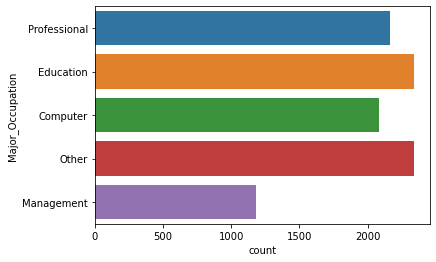

In [29]:
# Count Plot
sns.countplot(y="Major_Occupation", data=df);

In [30]:
df.Major_Occupation = pd.Categorical(df.Major_Occupation)

Major Occupation is categorical and looks fairly well balanced.

##### Actual Time

To make "Actual Time" a useful function, the categories will need to be grouped into broader categories. If you do this, the "Actual Time" feature would look very similar to the target feature "Major Occupation." As a result, I decided to remove the "Actual Time" field. I worked on estimating the wider groupings of the Actual Time field and realized that it would end up being very similar to "Major Occupation".

In [31]:
# drop the field

df = df.drop(["Actual_Time"], axis=1)

---

##### Education Attainment

In [32]:
# Analyse Education_Attainment

# Value Counts
df.Education_Attainment.value_counts()

Some_College    3291
College         2817
Masters         1404
High_School     1246
Special          460
Professional     271
Doctoral         255
Grammar          201
Other            163
Name: Education_Attainment, dtype: int64

In [33]:
df.Education_Attainment.describe()

count            10108
unique               9
top       Some_College
freq              3291
Name: Education_Attainment, dtype: object

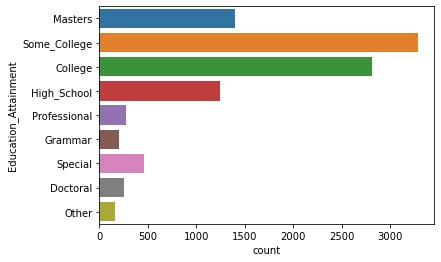

In [34]:
# Count Plot
sns.countplot(y="Education_Attainment", data=df);

By merging some of the smaller categories into larger categories, the balance in this target variable can be improved.

If this is not changed the majority of models will be trained towards "Some College" the majority class.

Assemble the groups in the following order:

* "High School", "Grammar", "Other" and "Special" all refer to a category of school before college - combine them into one category called "School"

* "Doctoral", "Masters" and "Professional" (eg. chartered accountant) are all indications of a speciality - combine them into a category called "Speciality"

These steps should lead to more balance of the categories in this target variable.

In [35]:
# SCHOOL
df['Education_Attainment'] = df['Education_Attainment'].replace([
    "High_School",
    "Grammar",
    "Other",
    "Special"], "School")

# SPECIALITY
df['Education_Attainment'] = df['Education_Attainment'].replace([
    "Doctoral",
    "Masters",
    "Professional"], "Speciality")

The categories have ordinality, so I'll include that now.

In [36]:
df.Education_Attainment.unique()

array(['Speciality', 'Some_College', 'College', 'School'], dtype=object)

In [37]:
# Education_Attainment
# Set Education_Attainment as a categorical field
# Set the order of the columns

df.Education_Attainment = pd.Categorical(df.Education_Attainment, categories=
['Speciality', 'College', 'Some_College', 'School'], ordered=True)

print(df.Education_Attainment.unique())

['Speciality', 'Some_College', 'College', 'School']
Categories (4, object): ['Speciality' < 'College' < 'Some_College' < 'School']


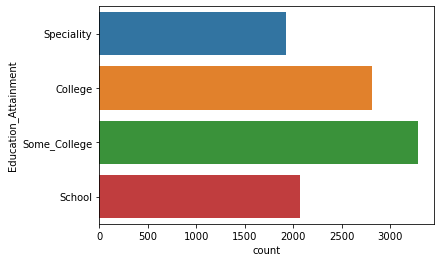

In [38]:
# Redraw Count Plot of Education Attainment to see order of categories reflected
sns.countplot(y="Education_Attainment", data=df);

In the target categorical variable, our groups are now more evenly distributed.

---

## Numerical Features

We have two numerical features:

* Age
* Opinions on Censorship

##### Age

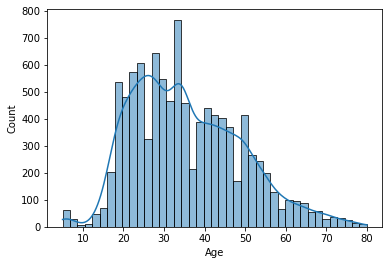

In [39]:
# Analyse Age feature

# Draw histogram
# Histograms are useful for depicting location, shape and spread
sns.histplot(x="Age", data=df, kde=True);

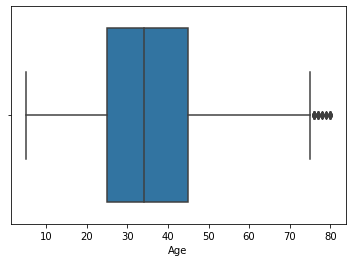

In [40]:
# Draw boxplot
# Depicts location, spead and shape
# It also shows the median, the spread in the quartiles and outliers
sns.boxplot(x="Age", data=df);

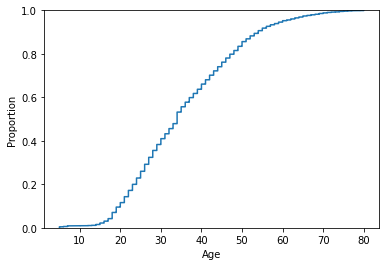

In [41]:
# Draw cumulative plot
# Represents the proportion of observations less than or equal to given value
sns.ecdfplot(data=df, x="Age");

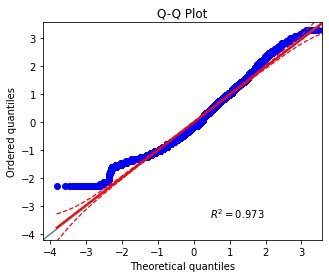

In [42]:
# QQ-plot
# Plot of observed quantiles against theoretical qualities
pg.qqplot(df.Age);

In [43]:
df.Age.describe()

count    10108.000000
mean        35.653047
std         13.471899
min          5.000000
25%         25.000000
50%         34.000000
75%         45.000000
max         80.000000
Name: Age, dtype: float64

**Observations**

* The histogram shows that the data is bell curve shaped
* Data is more skewed to the right
* The histogram shows there are outliers to the right (>75)
* The cumulative plot does show a sudden jump in the observations at the median point this because the median was impugned for 309 missing values
* QQ-plot indicates that the data is not normal but fairly close at 0.973, but we should transform it to be closer to normal

The following could be said in terms of the internet users ages based on this survey in 1997.  The youngest user was 5 while the oldest user was 80.  50% of the internet users were below the age of 34 and 75% of the users were below the age of 45.  The average age of an internet user was 35.65 at this time.

---

##### Opinions on Censorship

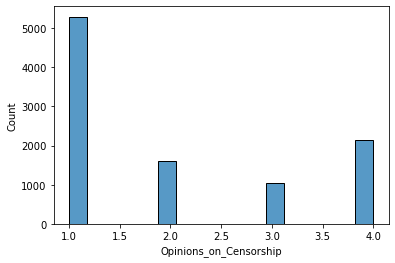

In [44]:
# Analyse Opinions_on_Censorship feature

# Draw histogram
# Histogram is useful for depicting location, shape and spread
sns.histplot(x="Opinions_on_Censorship", data=df);

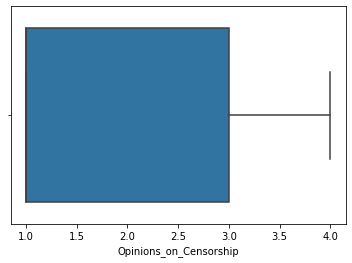

In [45]:
# Draw boxplot
# Depicts location, spread and shape
# It also shows the median, the spread in the quartiles and outliers
sns.boxplot(x="Opinions_on_Censorship", data=df);

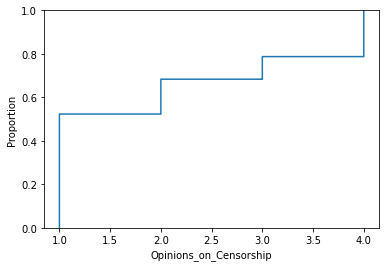

In [46]:
# Draw cumulative plot
# Represents the proportion of observations less than or equal to given value
sns.ecdfplot(data=df, x="Opinions_on_Censorship");

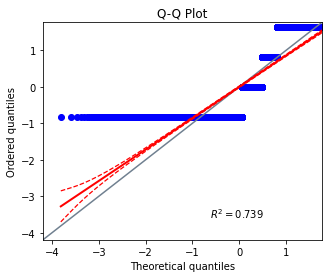

In [47]:
# QQ-plot
# Plot of observed quantiles against theoritical qualities
pg.qqplot(df.Opinions_on_Censorship);

The analysis reveals that the "Opinions on Censorship" column is not a numerical column, but rather a group in which the numbers are translated to string values.

In [48]:
# Convert to categorical
df.Opinions_on_Censorship = pd.Categorical(df.Opinions_on_Censorship)

# Convert to string
df.Opinions_on_Censorship = df.Opinions_on_Censorship.astype(str)

# Add the feature to the Unordered Categorical list
unordered_categorical.append("Opinions_on_Censorship")

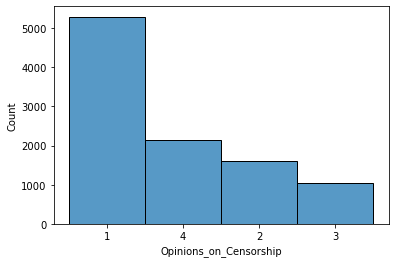

In [49]:
# Analyse "Opinions_on_Censorship" feature

# Draw histogram
sns.histplot(x="Opinions_on_Censorship", data=df);

This histogram is far more representative of the feature - Opinions on Censorship.

**Note** "Not_Say" is not a concern in this field.

---

## Categorical Features

There are many categorical features in the dataset. To see if all of these features are **usable**, you must first evaluate their balance.

### Nominal (Unordered) Categorical Single Value Columns

In [50]:
# The list of Unordered Categorical features
unordered_categorical

['Major_Geographical_Location',
 'Country',
 'Community_Building',
 'Falsification_of_Information',
 'Gender',
 'Marital_Status',
 'Most_Import_Issue_Facing_the_Internet',
 'Primary_Computing_Platform',
 'Primary_Language',
 'Primary_Place_of_WWW_Access',
 'Race',
 'Registered_to_Vote',
 'Sexual_Preference',
 'Web_Ordering',
 'Web_Page_Creation',
 'Willingness_to_Pay_Fees',
 'Opinions_on_Censorship']

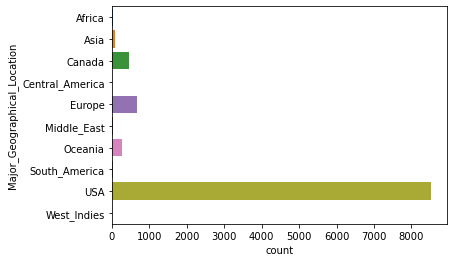

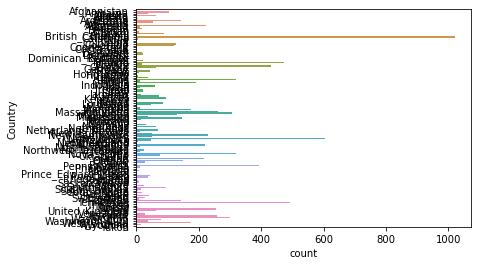

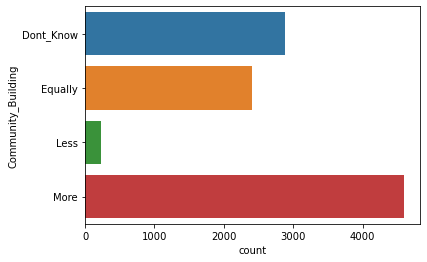

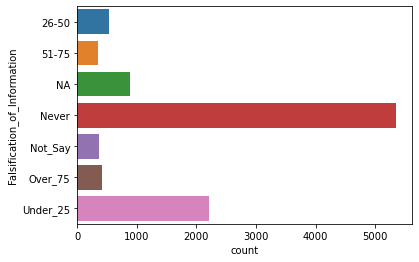

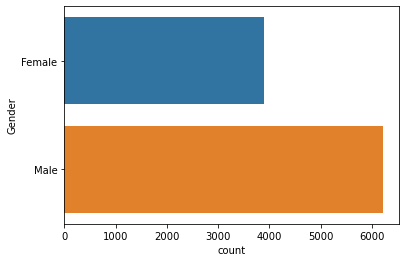

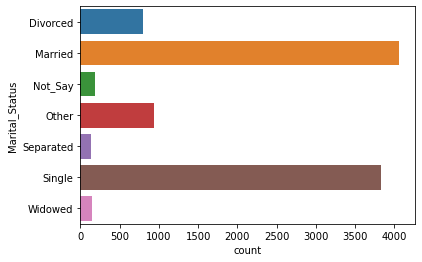

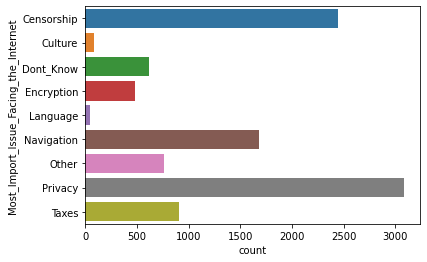

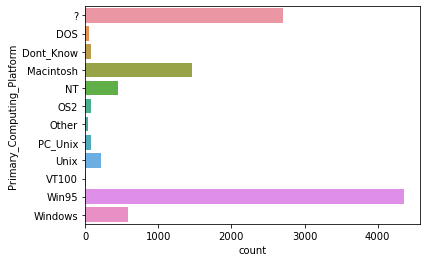

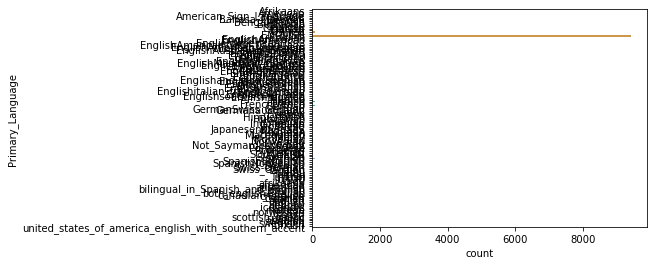

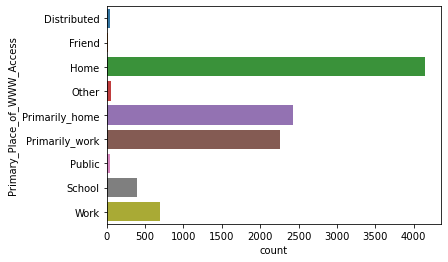

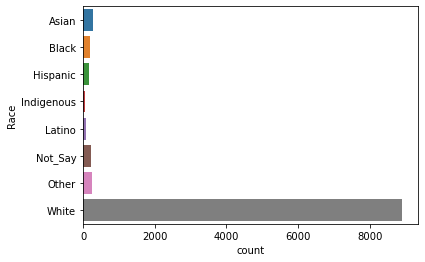

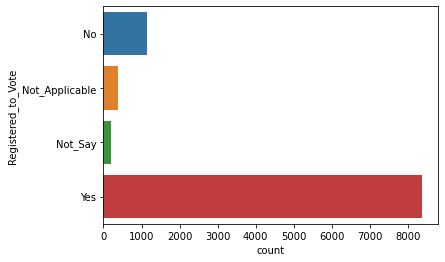

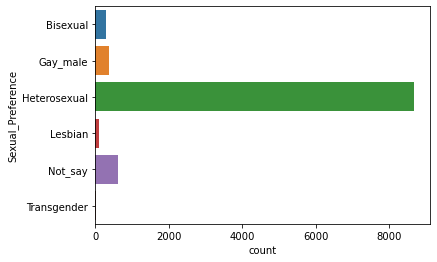

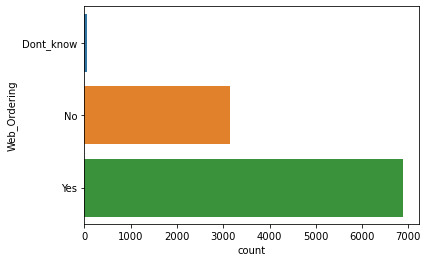

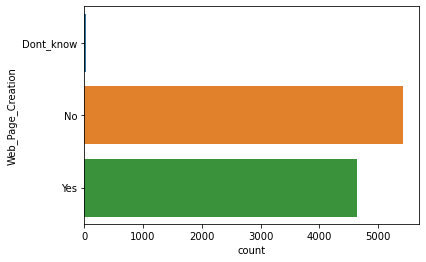

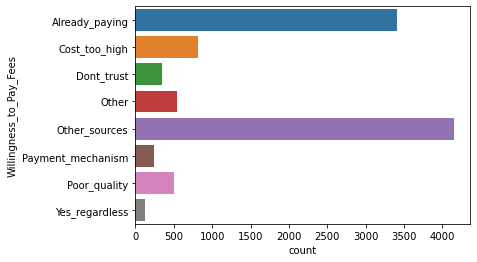

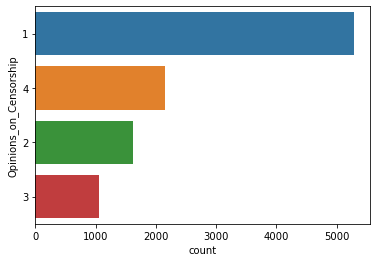

In [51]:
## Take a look at these Nominal Categorical Single Value Columns 

for i in unordered_categorical:
    plt.figure(i)
    sns.countplot(y=i, data=df);

#### USABLE

Determine which feature can be used with some feature engineering based on the above review.

##### Falsification of Information
* Place instances of "Under_25", "Over_75", "51-75", "26-50", "NA", "Not_Say" into a new boolean column called "hasFalsified" with a value True (2217 + 535 + 414 + 344 + 891 + 359)
* "Never" into the column "hasFalsified" with a value of False (5348)

It is assumed that those who refuse to say or give a response have falsified details but refuse to accept it.

In [52]:
df.Falsification_of_Information.value_counts()

Never       5348
Under_25    2217
NA           891
26-50        535
Over_75      414
Not_Say      359
51-75        344
Name: Falsification_of_Information, dtype: int64

In [53]:
#hasFalsified = True:
2217 + 535 + 414 + 344 + 891 + 359

4760

In [54]:
4760 / 5348  

# two categories are 10% different making them well balanced.

0.8900523560209425

In [55]:
# copy the existing column
df['hasFalsified'] = df['Falsification_of_Information']

# hasFalsified = 1 (True)
df['hasFalsified'] = df['hasFalsified'].replace([
    "Under_25",
    "Over_75",
    "51-75",
    "26-50",
    "NA",
    "Not_Say"], "1")
# hasFalsified = 0 (False)
df['hasFalsified'] = df['hasFalsified'].replace([
    "Never"], "0")

# Check that new changes have taken
print(df.hasFalsified.unique())

['0', '1']
Categories (2, object): ['0', '1']


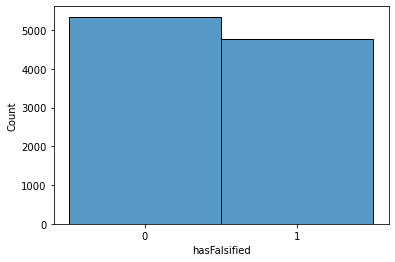

In [56]:
# Visualise the outcome
sns.histplot(x="hasFalsified", data=df);

In [57]:
# Encode the column to boolean
df["hasFalsified"] = df["hasFalsified"].map({'0': 0, '1': 1})

# Store columns for keeping
Keeping = []
Keeping.append("hasFalsified");

# drop out old column
df = df.drop(['Falsification_of_Information'], axis=1)

---

##### Opinions on Censorship

* Combining categories 2, 3, and 4 into a single category of 0 (False) would be more usable.
* Combining categories 1 and 2 into a single category (True) would be more usable.

Rename the column to "Opinion_1_Pro"

who
93819    1
95708    1
97218    0
91627    1
49906    1
        ..
97004    1
96381    0
94762    1
97062    1
92223    0
Name: Opinion_1_Pro, Length: 10108, dtype: object

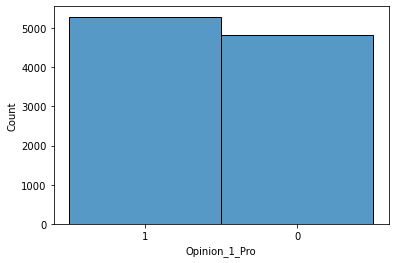

In [58]:
df.rename(columns = {'Opinions_on_Censorship' : 'Opinion_1_Pro'}, inplace = True)

df["Opinion_1_Pro"] = df["Opinion_1_Pro"].map({'1': '1', '2': '0', '3': '0', '4': '0'})

sns.histplot(x="Opinion_1_Pro", data=df);

df.Opinion_1_Pro

In [59]:
# Looks much more balanced

# Encode the column to boolean
df["Opinion_1_Pro"] = df["Opinion_1_Pro"].map({'0': 0, '1': 1})

---

##### Marital Status

* Place instances of "Divorced", "Separated" and "Widowed" into a new column called "isSingle" and set value to **True** (3832 + 798 + 151 +139)
* Place instances of "Married", "Other", "Not_Say" into "isSingle" and set to **False** (4063 + 940 + 185)


It is assumed that those in the Other group are in a relationship (e.g., boyfriend/girlfriend, possibly engaged, possibly Same-sex marriage as in 1994 not legal).

It is assumed that those in the "Not Say" group are in some kind of perplexing relationship situation but are not single.

Assumption is made that "Never" means never married (Not never again)

In [60]:
df.Marital_Status.value_counts()

Married      4063
Single       3832
Other         940
Divorced      798
Not_Say       185
Widowed       151
Separated     139
Name: Marital_Status, dtype: int64

In [61]:
# IsSingle = True
3832 + 798 + 151 +139

4920

In [62]:
# IsSingle = False
4063 + 940 + 185

5188

In [63]:
4920/5188
# two categories are less than 10% different making them well balanced.

0.9483423284502699

In [64]:
# copy the existing column
df['isSingle'] = df['Marital_Status']
# isSingle = 1 (True)
df['isSingle'] = df['isSingle'].replace([
    "Divorced",
    "Separated",
    "Widowed",
    "Single"], "1")
# isSingle = 0 (False)
df['isSingle'] = df['isSingle'].replace([
    "Other",
    "Not_Say",
    "Married"], "0")

# Check that new changes have taken
print(df.hasFalsified.unique())

[0, 1]
Categories (2, int64): [0, 1]


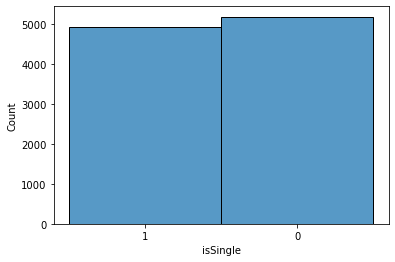

In [65]:
# Visualise the outcome
sns.histplot(x="isSingle", data=df);

In [66]:
# Encode the column to boolean
df["isSingle"] = df["isSingle"].map({'0': 0, '1': 1})

# Store columns for keeping
Keeping.append("isSingle");

# drop out old column
del df['Marital_Status']

---

##### Most Important Issue Facing the Internet

Combine columns to form broad categories called "Concerns" as such:

* Usability = Language + Culture + Dont_Know + Other + Navigation (48 + 84 + 620 + 760 + 1683 = 3195)
* Privacy = Privacy + Encryption (3082 + 484 = 3566)
* Regulation = Censorship + Taxes (2444 + 903 = 3347)

These categories would be very well balanced.

The rational regarding the re-grouping:

* In 1997, many of the technicalities of browsers and server infrastructure were still being ironed out, causing questions about language, culture, and navigation. Due to a lack of understanding, users were also unsure of the difficulties and responded with "Dont Know" or "Other."

* On the Internet, privacy is still a problem, and encryption now goes hand-in-hand with it, so they are basically the same concern.

* Censorship and taxes are examples of government overregulation, which is also a problem for modern and evolving technology such as the internet.

In [67]:
df.Most_Import_Issue_Facing_the_Internet.value_counts()

Privacy       3082
Censorship    2444
Navigation    1683
Taxes          903
Other          760
Dont_Know      620
Encryption     484
Culture         84
Language        48
Name: Most_Import_Issue_Facing_the_Internet, dtype: int64

In [68]:
# copy the existing column
df['Concerns'] = df['Most_Import_Issue_Facing_the_Internet']
# Usability
df['Concerns'] = df['Concerns'].replace([
    "Language",
    "Culture",
    "Dont_Know",
    "Navigation",
    "Other"], "Usability")
# Privacy
df['Concerns'] = df['Concerns'].replace([
    "Privacy",
    "Encryption"], "Privacy")
# Regulation
df['Concerns'] = df['Concerns'].replace([
    "Censorship",
    "Taxes"], "Regulation")

# Check that new changes have taken
print(df.Concerns.unique())

['Regulation', 'Usability', 'Privacy']
Categories (3, object): ['Regulation', 'Usability', 'Privacy']


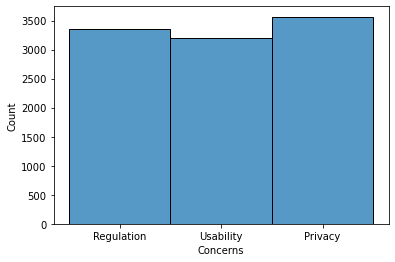

In [69]:
# Visualise the outcome
sns.histplot(x="Concerns", data=df);

In [70]:
# drop out old column
del df['Most_Import_Issue_Facing_the_Internet']

---

##### Web Page Creation

In [71]:
# Get value counts
df.Web_Page_Creation.value_counts()

No           5429
Yes          4650
Dont_know      29
Name: Web_Page_Creation, dtype: int64

It is assumed that people who say they don't know the answer to this question don't even know what Web Page Creation is, so they can't possibly do it.

In [72]:
5429/(4650+29)

1.160290660397521

This is an extremely well-balanced split. I'm going to say that in 1994, being able to create a web page required a high level of technological knowledge. This could be a useful predictor feature. The following is what I want to do:

* Rename the column to "isTechnical"
* Group 'Dont_Know' into 'No'
* Change Yes to 1
* Change No to 0

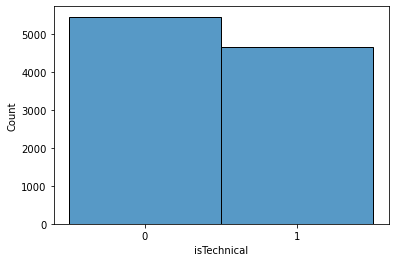

In [73]:
df['isTechnical'] = df['Web_Page_Creation']

df['isTechnical'] = df['isTechnical'].replace([
    "Dont_know"], "0")
df['isTechnical'] = df['isTechnical'].replace([
    "No"], "0")
df['isTechnical'] = df['isTechnical'].replace([
    "Yes"], "1")

# Check ocolumn
#df.isTechnical.value_counts()

# Visualise the outcome
sns.histplot(x="isTechnical", data=df);

# That is fairly well balanced

# Clean up drop out the original column
df = df.drop(['Web_Page_Creation'], axis=1)

# Encode the column to boolean
df["isTechnical"] = df["isTechnical"].map({'0': 0, '1': 1})

---

##### Primary Computing Platform

Perhaps I should classify this in terms of Microsoft and non-Microsoft users.

In [74]:
df.Primary_Computing_Platform.value_counts()

Win95        4359
?            2699
Macintosh    1466
Windows       581
NT            450
Unix          212
Dont_Know      87
OS2            84
PC_Unix        76
DOS            54
Other          33
VT100           7
Name: Primary_Computing_Platform, dtype: int64

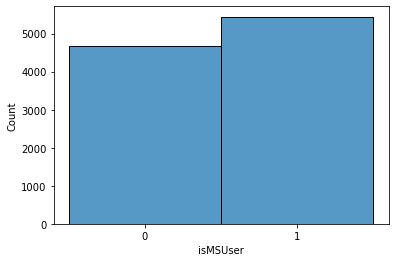

In [75]:
# copy the existing column
df['isMSUser'] = df['Primary_Computing_Platform']
# MS User = 1 (True)
df['isMSUser'] = df['isMSUser'].replace([
    "Win95",
    "Windows",
    "NT",
    "DOS"], "1")
# MS User = 0 (False)
df['isMSUser'] = df['isMSUser'].replace([
    "Macintosh",
    "Unix",
    "PC_Unix",
    "Other",
    "?",
    "Dont_Know",
    "OS2",
    "VT100",
    "OS2"], "0")

#df.isMSUser.value_counts()

# Visualise the outcome
sns.histplot(x="isMSUser", data=df);

# That is fairly well balanced

# Clean up drop out the original column
df = df.drop(['Primary_Computing_Platform'], axis=1)

# Encode the column to boolean
df["isMSUser"] = df["isMSUser"].map({'0': 0, '1': 1})

----

#### UNUSABLE

* The following features appear to be unusable.
* Consider discarding these features from the analysis.

##### Feature to Drop

* Country (Too many categories, contains US states and international countries, Heavily weighted to the US, a lower level of Major_Geographical_Location)
* Major_Geographical_Location
* Community Building (Nonsensical, survey specific)
* Race (Too weighted toward White category)
* Willingness_to_Pay_Fees (Nonsensical, survey specific)
* Web_Ordering (Imbalanced)
* Sexual_Preference (Too wieghted towards Heterosexual)
* Registered_to_Vote (Too weighted towards Yes category)
* Primary_Language (Too many categories 119)
* Gender (Too much weighting towards male (61%); expect normal distribution)

I'll just look at one or two columns before discarding them.


---

##### Country


In [76]:
# Get value counts
df.Country.value_counts()

California     1021
New_York        603
Texas           494
Florida         474
Georgia         431
               ... 
Kenya             1
Indonesia         1
Egypt             1
Ecuador           1
Afghanistan       1
Name: Country, Length: 129, dtype: int64

In [77]:
# number of unique countries
df.Country.unique()

# 129
# Lots aren't countries but states in the US
# This feature is a subset of Major Geographical Location

['Texas', 'Florida', 'Illinois', 'Ontario', 'Washington', ..., 'Armenia', 'Algeria', 'Tunisia', 'Nicaragua', 'Burundi']
Length: 129
Categories (129, object): ['Texas', 'Florida', 'Illinois', 'Ontario', ..., 'Algeria', 'Tunisia', 'Nicaragua', 'Burundi']

---

##### Major Geographical Location

In [78]:
# Get value counts
df.Major_Geographical_Location.value_counts()

USA                8510
Europe              674
Canada              468
Oceania             274
Asia                 84
Africa               33
South_America        25
Middle_East          25
Central_America       9
West_Indies           6
Name: Major_Geographical_Location, dtype: int64

In [79]:
print(674 + 468 + 274 + 84 + 33 + 25 + 25 + 9 + 6)
print(1598/8510)

# 1598
# The vast majority of the respondents are in the USA
# This not a usable feature
# Drop Major_Geographical_Location

1598
0.18777908343125735


---

##### Primary Language

I'm curious if I can extract the word English to create a new column and then see if it's usable.

In [80]:
# number of unique categories for primary languages
df.Primary_Language.unique()

['English', 'Spanish', 'Italian', 'Dutch', 'american', ..., 'Bengalidanish', 'EnglishTurkish', 'Thai', 'EnglishEbonics', 'hebrew']
Length: 119
Categories (119, object): ['English', 'Spanish', 'Italian', 'Dutch', ..., 'EnglishTurkish', 'Thai', 'EnglishEbonics', 'hebrew']

In [81]:
df['Language'] = df['Primary_Language'].astype(str)

# Number of English related speakers = 9461
print(df['Language'].str.contains('English', case=False).sum())

# Total number of Language speakers = 10108
print(df['Language'].count())

print(df['Language'].str.contains('English', case=False).sum()/df['Language'].count())

# 9461/10108 = 93%
# This is a very unbalanced categorical feature!
# 93% of the people speak some form of English
# the column is unusable


9461
10108
0.9359912940245351


---

##### Primary_Place_of_WWW_Access

Is it possible for me to make anything usable out of these categories?

In [82]:
# Get value counts
df.Primary_Place_of_WWW_Access.value_counts()

Home              4154
Primarily_home    2433
Primarily_work    2262
Work               697
School             391
Other               63
Public              44
Distributed         41
Friend              23
Name: Primary_Place_of_WWW_Access, dtype: int64

In [83]:
# Home
print(4154 + 2433)

# Not Home
print(2262 + 697 + 391 + 63 + 44 + 41 + 23)

# I can see the best I could get is 
3521/6587

# Drop this feature
# Should be close to 1

6587
3521


0.5345377258235919

---

##### Gender

In [84]:
# Male / Female split in Gender
df.Gender.value_counts(normalize=True)

# The split is too weighted toward men to be usable and we would expect a 50/50 split

Male      0.615057
Female    0.384943
Name: Gender, dtype: float64

----

In [85]:
df = df.drop(["Country", "Major_Geographical_Location", "Community_Building", "Race", "Willingness_to_Pay_Fees", "Web_Ordering", "Sexual_Preference", 
              "Registered_to_Vote", "Gender", "Primary_Language", "Language", "Primary_Place_of_WWW_Access"], axis=1)

---

### Ordinal Categorical Single Value Columns

In [86]:
# The list of Unordered Categorical features
ordered_categorical

['Household_Income', 'Years_on_Internet']

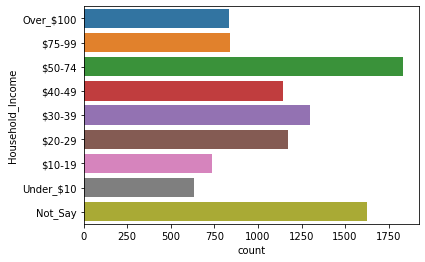

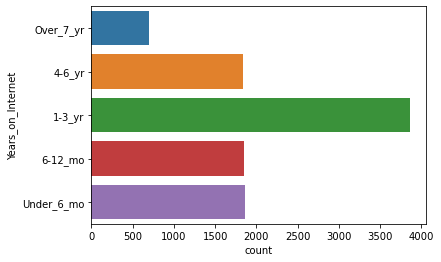

In [87]:
## Take a look at these Nominal Categorical Single Value Columns 

for i in ordered_categorical:
    plt.figure(i)
    sns.countplot(y=i, data=df);

#### USABLE

Determine which feature can be used with some feature engineering based on the above review.

##### Household Income

In [88]:
df.Household_Income.value_counts()

$50-74       1830
Not_Say      1627
$30-39       1296
$20-29       1174
$40-49       1142
$75-99        838
Over_$100     836
$10-19        735
Under_$10     630
Name: Household_Income, dtype: int64

After several attempts at balancing these Household Incomes into a balanced categorical configuration, it was determined that this would not succeed. My best answer was:
```
< 0:  630 +1627
< 10: 735 + 1174
< 30: 1296 + 1142
< 50: 1830
< 75: 838 + 836
```

The split does not sit well with me. I experimented with several variations (manually). It's not even possible. However, this is important information....

I made the decision to conduct an experiment:

Household_Income   Start     End  Guess_Salary
who                                                 
93819        Over_$100  100000  120000        103648
95708        Under_$10       0    9999           409
97218        Over_$100  100000  120000        109012
91627           $50-74   50000   74999         58024
49906        Under_$10       0    9999          3657
...                ...     ...     ...           ...
97004        Over_$100  100000  120000        106524
96381           $20-29   20000   29999         23241
94762           $20-29   20000   29999         24654
97062           $75-99   75000   99999         80706
92223           $30-39   30000   39999         33587

[10108 rows x 4 columns]

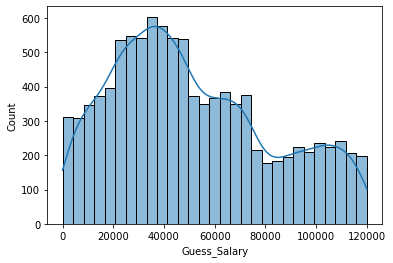

In [89]:
# Copy the Household_Income column into a new df called Experiment
Experiment = df[['Household_Income']].copy()

# Seed the random function with config settings
random.seed(SEED)

# Use mapping to start creating a new start and end of range column
# Start of range
Experiment["Start"] = Experiment["Household_Income"].map({"$50-74" : 50000,
                                        "Not_Say" : 0,
                                        "$30-39" : 30000,
                                        "$20-29" : 20000,
                                        "$40-49" : 40000,
                                        "$75-99" : 75000,
                                        "Over_$100" : 100000,
                                        "$10-19" : 10000,
                                        "Under_$10" : 0})

# End of range
Experiment["End"] = Experiment["Household_Income"].map({"$50-74" : 74999,
                                        "Not_Say" : 120000,#Max
                                        "$30-39" : 39999,
                                        "$20-29" : 29999,
                                        "$40-49" : 49999,
                                        "$75-99" : 99999,
                                        "Over_$100" : 120000,#Max
                                        "$10-19" : 19999,
                                        "Under_$10" : 9999})

# Define a random function that returns an integer value between start and end
# Not going to work with floats and precision with this

# guess_salary function will pick a whole number between the start and end within in there Household_Income category
# Should be pretty good at guessing the salaries

def guess_salary(start, end):
    return random.randint(start,end)

# Apply the Guessing Function across all the rows in the Experiment df
Experiment["Guess_Salary"] = Experiment.apply( lambda row: guess_salary(row['Start'],row['End']),axis=1)

sns.histplot(x="Guess_Salary", data=Experiment, kde=True);

Experiment

It creates an interesting bell-curve that is very similar to natural.

I'd like to see how changing the SEED of the random function affects the visual shape and QQ-Plot values.

I might have figured out how to transform this categorical field into a continuous numeric field that is useful and usable.

670488
30337
542289
518858
898281
705142
63226
593611
611772
817785


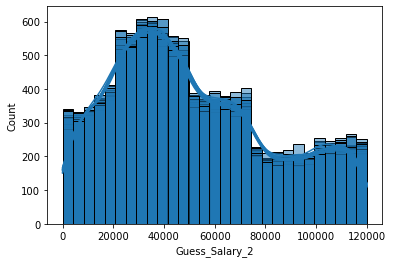

In [90]:
# Check 10 iterations
random.seed(SEED)

for x in range(0, 10):
    
    # Seed was set above so you will get the same numbers
    # This code below will generate random number between 1 and 1Million
    # This will be used to rerun the Guess Salary functions and see 
    # if there are any major changes

    randomSEED = random.randint(1, 1000000)
    
    # Reseed random
    random.seed(randomSEED)

    # Apply the Guessing Function across all the rows in the X df
    Experiment["Guess_Salary_2"] = Experiment.apply( lambda row: guess_salary(row['Start'],row['End']),axis=1)
    
    print(randomSEED)
    
    # Make it part of the loop to print histplot
    sns.histplot(x="Guess_Salary_2", data=Experiment, kde=True);
    
    ## Plots print on top of one another - which is useful to compare shape - very close to identical every time
    

670488
30337
542289
518858
898281
705142
63226
593611
611772
817785


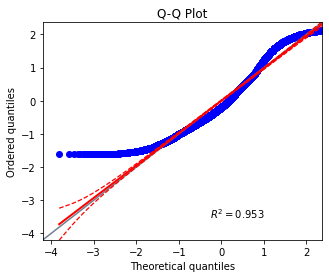

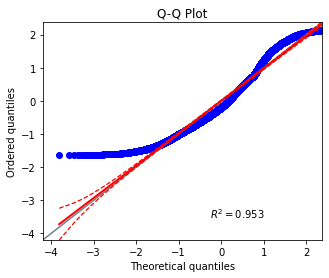

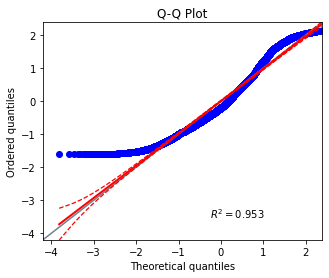

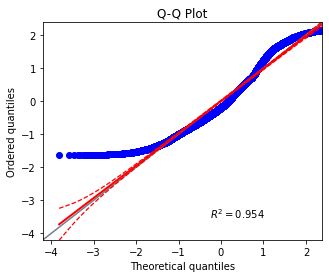

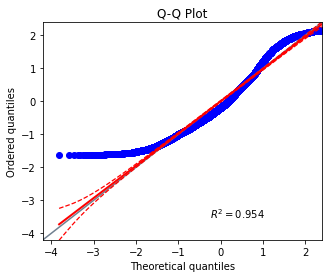

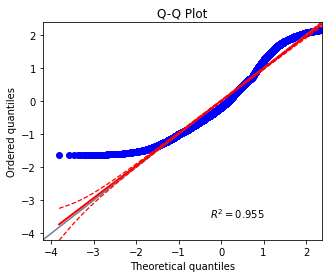

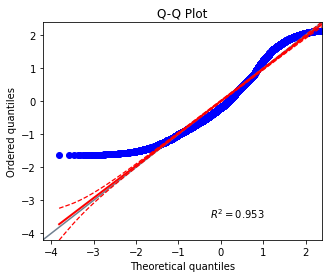

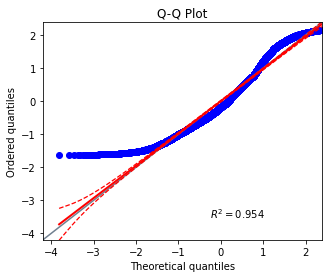

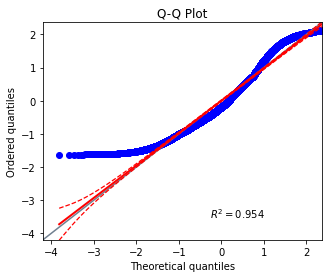

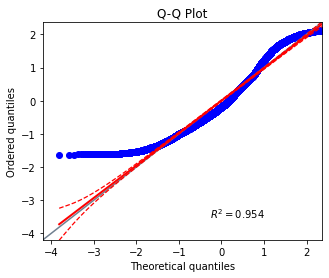

In [91]:
# Check 10 iterations
random.seed(SEED)

for x in range(0, 10):
    
    # Seed was set above so you will get the same numbers
    # But this will generate random number between 1 and 1M
    # This will be used to rerun the Guess Salary functions and see 
    # if there are any major changes

    randomSEED = random.randint(1, 1000000)
    
    # Reseed random
    random.seed(randomSEED)

    # Apply the Guessing Function across all the rows in the X df
    Experiment["Guess_Salary_2"] = Experiment.apply( lambda row: guess_salary(row['Start'],row['End']),axis=1)
    
    print(randomSEED)
    
    # Make it part of the loop to print qqplot
    pg.qqplot(Experiment.Guess_Salary_2);
    
    ## Here I keep my eye on the shape of the QQ plot and the R value
    # They stay pretty much very constant
    
    

This will work well because there is little variation even when using a wide variety of seed values.  The numerical form of Household Income will be used.  It's possible that this is more useful than a categorical variable.

In [92]:
# drop out old column
del df['Household_Income']

# Copy my new columns from the Experiment dataframe across
df['Household_Income'] = Experiment['Guess_Salary']

# Delete the Experiment dataframe
del Experiment

# convert from int to float
df["Household_Income"] = df.Household_Income.astype(float)

In [93]:
df.Household_Income

who
93819    103648.0
95708       409.0
97218    109012.0
91627     58024.0
49906      3657.0
           ...   
97004    106524.0
96381     23241.0
94762     24654.0
97062     80706.0
92223     33587.0
Name: Household_Income, Length: 10108, dtype: float64

---

##### Years_on_Internet

On the Internet, the column Years is a Categorical Ordinal column.  This area has the potential to yield two pieces of useful information, in my opinion.

##### Months_on_Internet

The categories are arranged in an unusual way.  As an experiment, I apply the random guessing algorithm used in Household Income to this area.

Years_on_Internet Start End  Guess_Months
who                                            
93819            1-3_yr    13  47            20
95708        Under_6_mo     1   6             1
97218            1-3_yr    13  47            30
91627            1-3_yr    13  47            28
49906            1-3_yr    13  47            27
...                 ...   ...  ..           ...
97004            1-3_yr    13  47            36
96381            4-6_yr    48  83            69
94762            1-3_yr    13  47            33
97062            4-6_yr    48  83            63
92223         Over_7_yr    84  90            86

[10108 rows x 4 columns]

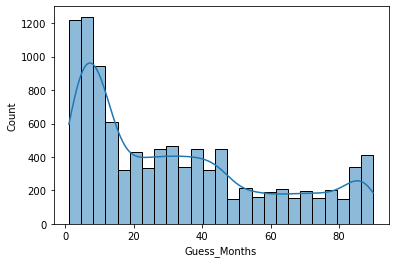

In [94]:
# Copy the Years on the Internet column into a new df called Experiment2
Experiment = df[['Years_on_Internet']].copy()

# Seed the random function with config settings
random.seed(SEED)

# Use mapping to start creating a new start and end of range column
# Start of range
Experiment["Start"] = Experiment["Years_on_Internet"].map({
                                        "Under_6_mo" : 1,   #1-6 months
                                        "6-12_mo" : 7,      #7-12 months
                                        "1-3_yr" : 13,      #13-47 (3x12)+11
                                        "4-6_yr" : 48,      #48-83   (6x12)+11
                                        "Over_7_yr" : 84    #84-90 (choose a max)
                                        })

# End of range
Experiment["End"] = Experiment["Years_on_Internet"].map({
                                        "Under_6_mo" : 6,
                                        "6-12_mo" : 12,
                                        "1-3_yr" : 47,
                                        "4-6_yr" : 83,
                                        "Over_7_yr" : 90 # Max
                                        })

# The categories use months and years in their range
# Break it down to months

# Apply a formula to guess the number of months on the internet

def guess_months(start, end):
    return random.randint(start,end)

# Apply the Guessing Function across all the rows in the Experiment 2 df
Experiment["Guess_Months"] = Experiment.apply( lambda row: guess_months(row['Start'],row['End']),axis=1)

sns.histplot(x="Guess_Months", data=Experiment, kde=True);

Experiment

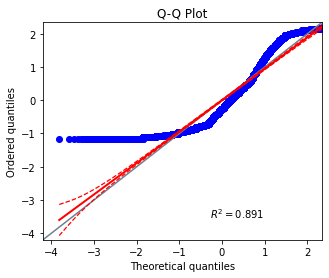

In [95]:
pg.qqplot(Experiment.Guess_Months);

This will also provide me with an additional numeric feature to work with. This may be useful in determining a function of Adoption.

In [96]:
# Copy the values generated by the guessing the months into main dataframe
df["Months_on_Internet"] = Experiment["Guess_Months"]

# Delete the Experiment dataframe
del Experiment

# Change dtype to float from int 
df["Months_on_Internet"] = df.Months_on_Internet.astype(float)

When necessary, I'll use scalar and normalization algorithms on these two numeric fields.

---

##### Adoption

From the "Year on Internet" field, I believe I can build a new categorical column:

* Place instances of "6-12_mo" and "Under_6_mo" under a category called "Early_Majority" in a column called "Adoption" (1845 + 1857 = 3702)
* Place instances of "1-3yr" under a category called "Early_Adopters" in the column called "Adoption" (1837)
* Place instances of "4-6_yr", "Over_7_yr" under a category called "Innovators" in the column called "Adoption" (703 + 1838 = 2541)

The rationale for this re-grouping is focused on the technology adoption cycle, with 1994 marking the beginning of widespread adoption and the start of the dot-com bubble.  Both phenomenon are depicted below. It can be deduced from the details in the diagrams that those who adopted the Internet around 1993-1994 were in the Early Majority, and those who adopted the Internet prior to that were the Early Adopters and Innovators on the tail at more than 4 years before.

<img src="img/adoption.png">
* Adoption Cycle (source: https://miro.medium.com/)

<img src="img/dot-bubble.png" width=50%>
* Dot-com Bubble (source: https://en.wikipedia.org/)

The categories will balance well.

In [97]:
df.Years_on_Internet.value_counts()

1-3_yr        3865
Under_6_mo    1857
6-12_mo       1845
4-6_yr        1838
Over_7_yr      703
Name: Years_on_Internet, dtype: int64

In [98]:
# copy the existing column
df['Adoption'] = df['Years_on_Internet']
# Early Innovator
df['Adoption'] = df['Adoption'].replace([
    "4-6_yr",
    "Over_7_yr"], "Early_Innovator")
# Early Adopter
df['Adoption'] = df['Adoption'].replace(["1-3_yr"], "Early_Adopter")
# Early Majority
df['Adoption'] = df['Adoption'].replace([
    "Under_6_mo",
    "6-12_mo"], "Early_Majority")

# Check that new changes have taken
print(df.Adoption.unique())

## The ordinality seems correct as early adopter comes before early majority
# Don't change

['Early_Adopter', 'Early_Majority', 'Early_Innovator']
Categories (3, object): ['Early_Innovator' < 'Early_Adopter' < 'Early_Majority']


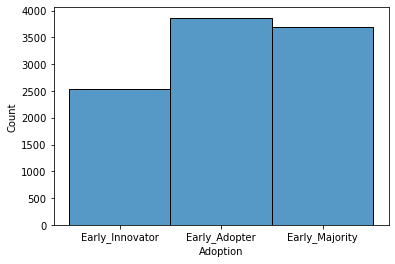

In [99]:
# Visualise the outcome
sns.histplot(x="Adoption", data=df);

Although the categories aren't perfectly balanced, they may be a strong predictor and have connections to other variables. The balance of these categories in 1994, when the Internet was accepted, is reflected in the categories balance.

In [100]:
# Drop the Years_on_Internet field
df = df.drop(["Years_on_Internet"], axis=1)

---

### Multi Value Columns

List of multi value columns:

In [101]:
# stored in list complex_cols
complex_cols

['Who_Pays_For_Access',
 'Community_Membership',
 'Disability',
 'How_You_Heard_About_Survey',
 'Not_Purchasing',
 'Who_Pays_For_Access']

In [102]:
# Print out column headers essentially "tags" and use intuition and judgement to determine 
# if they would have any predictive value

for i in complex_cols:
    ## Get all the related column names
    cols = df.iloc[:, lambda df: df.columns.str.contains(i, case=False)]
    print(*cols, sep = '\n')  # Print into a list so easier to analyse
    print("\n")

Who_Pays_for_Access_Dont_Know
Who_Pays_for_Access_Other
Who_Pays_for_Access_Parents
Who_Pays_for_Access_School
Who_Pays_for_Access_Self
Who_Pays_for_Access_Work


Community_Membership_Family
Community_Membership_Hobbies
Community_Membership_None
Community_Membership_Other
Community_Membership_Political
Community_Membership_Professional
Community_Membership_Religious
Community_Membership_Support


Disability_Cognitive
Disability_Hearing
Disability_Motor
Disability_Not_Impaired
Disability_Not_Say
Disability_Vision


How_You_Heard_About_Survey_Banner
How_You_Heard_About_Survey_Friend
How_You_Heard_About_Survey_Mailing_List
How_You_Heard_About_Survey_Others
How_You_Heard_About_Survey_Printed_Media
How_You_Heard_About_Survey_Remebered
How_You_Heard_About_Survey_Search_Engine
How_You_Heard_About_Survey_Usenet_News
How_You_Heard_About_Survey_WWW_Page


Not_Purchasing_Bad_experience
Not_Purchasing_Bad_press
Not_Purchasing_Cant_find
Not_Purchasing_Company_policy
Not_Purchasing_Easier_locally
No

These fields seem to be about topics specifically related to the survey's host website and have no predictive value. They can be dropped.

* How_You_Heard_About_Survey
* Not_Purchasing

The following may be an indicator of occupation and training level, and it's worth looking into further.

* Who_Pays_for_Access
* Disability
* Community_Membership 

---

In [103]:
# drop columns discussed

df = df[df.columns.drop(list(df.filter(regex='How_You_Heard_About_Survey')))]
df = df[df.columns.drop(list(df.filter(regex='Not_Purchasing')))]

---

There are two response variables:

* Education_Attainment
* Major_Occupation

There are fifteen good features:

* Age
* Community_Membership   
* Disability
* Opinion_1_Pro  
* Who_Pays_for_Access 
* hasFalsified
* isSingle
* Concerns
* isTechnical
* isMSUser
* Household_Income
* Months_on_Internet
* Adoption

When I consider the features and goals, I believe I should group them as wider dimensions that could be used to identify users.

This could come in handy later when looking for patterns.

**Demographics Dimensions**
* Age
* Disability
* Education_Attainment
* isSingle
* Household_Income
* Major_Occupation *

**Social Dimensions**
* Community
* Community_Membership
* Who_Pays_for_Access

**Ethical Dimensions**
* Opinion_1_Pro
* hasFalsified
* Concerns

**Intellectual Demographics**
* isTechnical
* isMSUser
* Months_on_Internet
* Adoption
* Education_Attainment *

###  Correlation Analysis (bivariate analysis)

##### Numerical Features

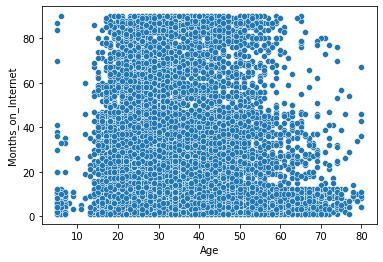

In [104]:
sns.scatterplot(x=df['Age'], y=df['Months_on_Internet']);

---

There is no apparent relationship between "Age" and "Month on Internet".  I suppose at that time the Internet had just come out so the length of experience on the Internet would not necessarily have been related to your age.

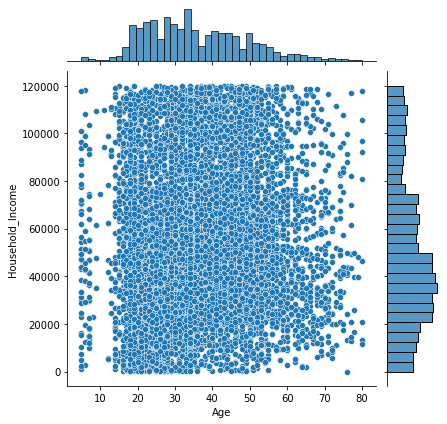

In [105]:
sns.jointplot(x=df['Age'], y=df['Household_Income']);

No clear relationship between Household Income and Age.

<AxesSubplot:xlabel='Age', ylabel='Household_Income'>

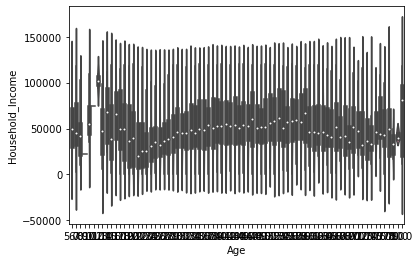

In [106]:
sns.violinplot(x='Age', y='Household_Income', data=df, size=8)

A violin plot of the Age vs Household Income also doesn't show too much.

---

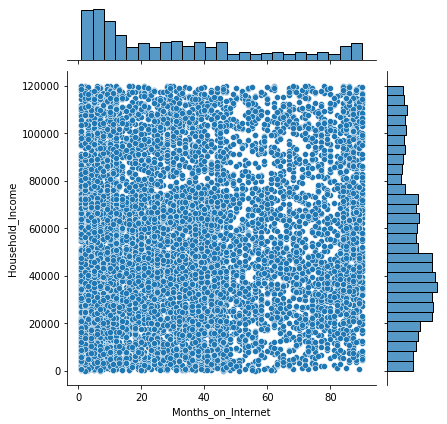

In [107]:
sns.jointplot(x=df['Months_on_Internet'], y=df['Household_Income']);

No clear relationship evident.

### Multivariate Analysis

#### Pairplot

Maybe a pairplot will reveal some useful relationships....

In [ ]:
# Note this takes quite awhile to generate (15 minutes)
sns.pairplot(df)

It is a high resolution image so I can zoom in.  This pair plot has also not shown anything useful.

---

## Third Pass

Relationships Between Features (and Target)

### Pearson’s Correlation Coefficient

Categorical variables are not included.  Targets are categorical.

In [ ]:
floats = ['Age', 'Months_on_Internet', 'Household_Income']
corr = df[floats].corr()

In [ ]:
corr

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmax=1, vmin=-1, cmap=cmap)

No correlation seems to exist between 'Age', 'Months_on_Internet', 'Household_Income'.

### Spearman’s Rank Correlation Coefficient

In [ ]:
corr = df[floats].corr(method='spearman')
corr

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmax=1, vmin=-1, cmap=cmap)

Still no sign of any correlations between the numeric variables.

### Phik Correlation Coefficient

Both numeric and categorical attributes can be handled by the Phik Correlation. But I'm going to use the whole dataset to see what kind of correlations I can find. Since many of the columns are multi-value fields, there might be a lot of irrelevant information. Let's take a look at what we've got...

In [ ]:
import phik
corr = df.phik_matrix()
corr

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmax=1, vmin=-1, cmap=cmap)

**Notable Observations**

* There seems to be a strong correlation between:
    * 'Age' and 'Major Occupation'
    * 'Age' and 'Who Pays' (School or Parents)

These similarities make sense because a person's primary occupation and whether a school or parent pays for internet are both influenced by their age.




* The following groups are somewhat correlated in terms of community memberships.
    * Hobbies vs None
    * Professional vs None

As you do one or the other, I think it makes sense.

* The relationship between "Months on the Internet" and "isTechnical" is particularly intriguing.  At this point in the internet's history, it seems that technological people were the longest users.

* Adoption and months on the Internet have a clear correlation, which is to be expected given that adoption was extracted from the "Months on Internet" feature.


### Examine Age to Targets

Let's use box plots to look at the relationship between Age and the two targets because there seems to be a clear connection.

Notice that the algorithms seem to have left Education Attainment out of their Phik calculations.

In [ ]:
sns.boxplot(x="Major_Occupation", y="Age", data=df);

In [ ]:
sns.boxplot(x="Education_Attainment", y="Age", data=df);

Looking at the box plots, it appears that age will certainly assist in identifying trends in the results.

They allow for a variety of observations, for example.
* It appears that those employed in education quit by the age of 30. Although many outliers are in the upper age groups.
* Professionals are typically between the ages of 30 and 50.
* A person would specialise between 30 and 50.

Going forward, age would undoubtedly be a valuable feature of the review.

I've looked at the data for long enough. The Clustering and Classification tasks will be completed next.

## Save The Dataframe

### Save the Data Frame to Binary File

In [ ]:
# Create a directory called "ready-for-preprocessing"
# Path is set in the Configuration Variables as data_FOLDER
    
# Create the directory 
try: 
    os.mkdir(data_FOLDER) 
except OSError as error: 
    print(error)
    
# https://www.geeksforgeeks.org/create-a-directory-in-python/#:~:text=Using%20os.&text=mkdir()-,os.,to%20be%20created%20already%20exists.

In [ ]:
# Save the panda dataframe to a pickle file

df.to_pickle(data_FOLDER+'/data.pickle')

# note that this will overwrite any existing file
# in the ./ready-for-preprocessing directory called 'data.pickle'

# https://ianlondon.github.io/blog/pickling-basics/

In [ ]:
# Delete the Data Frame from Memory

del df

# Pre-Processing

This step prepares the data for the clustering and classification tasks that follow.

**Note:** The notebooks were created independently of one another and then combined into one final notebook. As a result, certain import code and configurations can appear to be duplicated in the final notebook.

### Initial

In [1]:
data_FOLDER = './data'

In [2]:
import pandas as pd
import numpy as np

## Orginise imports, configs and 
import pickle

# the encoders
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [3]:
df = pickle.load( open( data_FOLDER+"/data.pickle", "rb" ) )

In [4]:
df.head()

Age  Community_Membership_Family  Community_Membership_Hobbies  \
who                                                                      
93819  41.0                            0                             0   
95708  28.0                            0                             0   
97218  25.0                            1                             1   
91627  28.0                            0                             0   
49906  17.0                            0                             0   

       Community_Membership_None  Community_Membership_Other  \
who                                                            
93819                          1                           0   
95708                          0                           0   
97218                          0                           0   
91627                          0                           1   
49906                          0                           0   

       Community_Membership_Political  Community_Membership_Professional  \
who                                                                        
93819                               0                                  0   
95708                               0                                  0   
97218                               0                                  1   
91627                               0                                  0   
49906                               1                                  1   

       Community_Membership_Religious  Community_Membership_Support  \
who                                                                   
93819                               0                             0   
95708                               0                             1   
97218                               0                             0   
91627                               0                             0   
49906                               0                             1   

       Disability_Cognitive  ...  Who_Pays_for_Access_Self  \
who                          ...                             
93819                     0  ...                         1   
95708                     0  ...                         1   
97218                     0  ...                         1   
91627                     0  ...                         1   
49906                     0  ...                         1   

       Who_Pays_for_Access_Work  hasFalsified  isSingle    Concerns  \
who                                                                   
93819                         0             0         0  Regulation   
95708                         0             1         1   Usability   
97218                         1             1         0   Usability   
91627                         0             1         0  Regulation   
49906                         0             1         1   Usability   

      isTechnical isMSUser  Household_Income  Months_on_Internet  \
who                                                                
93819           1        0          103648.0                20.0   
95708           0        1             409.0                 1.0   
97218           1        1          109012.0                30.0   
91627           1        1           58024.0                28.0   
49906           1        1            3657.0                27.0   

             Adoption  
who                    
93819   Early_Adopter  
95708  Early_Majority  
97218   Early_Adopter  
91627   Early_Adopter  
49906   Early_Adopter  

[5 rows x 32 columns]

---

### Column Types

Determine which columns contain which types of information. This is accomplished using a script that creates a series of arrays. After that, the column types can be pre-processed in the right way.

In [5]:
for j in ['hasFalsified', 'isSingle', 'isTechnical', 'isMSUser']:
    df[j] = df[j].astype('int64')


# Routinne to make lists data types

Numeric = []
Categorical = []
Boolean = []
Ordinal = []
Nominal = []
Targets = ["Education_Attainment", "Major_Occupation"]
TargetsF = []

columns = list(df)
  
for i in columns:
    type = df[i].dtype
    
    if (type == "float64"):
        Numeric.append(i)
    
    # Categorical is not a numpy array
    # https://pandas.pydata.org/pandas-docs/version/0.17.0/categorical.html
    
    elif (hasattr(df[i], 'cat')):
        
        #Categorical.append(i)
        # Build this up later
        
        if (df[i].cat.ordered):
            
            Ordinal.append(i)
        
        else:
            
            Nominal.append(i)
        
    elif (type == "int64"):
        Boolean.append(i)
        
        
        
# Take a look
print("Numeric:" + str(Numeric) +"\n")
print("Boolean:" + str(Boolean) +"\n")
print("Categorical:" + str(Categorical) +"\n")
print("Categorical Ordinal:" + str(Ordinal) +"\n")
print("Categorical Nominal:" + str(Nominal) +"\n")


Numeric:['Age', 'Household_Income', 'Months_on_Internet']

Boolean:['Community_Membership_Family', 'Community_Membership_Hobbies', 'Community_Membership_None', 'Community_Membership_Other', 'Community_Membership_Political', 'Community_Membership_Professional', 'Community_Membership_Religious', 'Community_Membership_Support', 'Disability_Cognitive', 'Disability_Hearing', 'Disability_Motor', 'Disability_Not_Impaired', 'Disability_Not_Say', 'Disability_Vision', 'Opinion_1_Pro', 'Who_Pays_for_Access_Dont_Know', 'Who_Pays_for_Access_Other', 'Who_Pays_for_Access_Parents', 'Who_Pays_for_Access_School', 'Who_Pays_for_Access_Self', 'Who_Pays_for_Access_Work', 'hasFalsified', 'isSingle', 'isTechnical', 'isMSUser']

Categorical:[]

Categorical Ordinal:['Education_Attainment', 'Adoption']

Categorical Nominal:['Major_Occupation', 'Concerns']



---

### Encode Categorical Features

Another crucial step in data preprocessing is munging categorical data. Categorical features must be converted to a numerical representation for models in the machine learning library.  We call this encoding.

You can choose a suitable transformation method once you know what kind of categorical data you're dealing with. For ordinal data, there will be an OrdinalEncoder, and for nominal data, there will be a OneHotEncoder in sklearn.

---

### Ordinal Categorical Features

OrdinalEncoder is used to encode the ordinal categorical features.

In [6]:
for i in Ordinal:

    # get a list categories (comes in an object so need to extract the list)
    cats = df[i].cat.categories

    ordered_cats = list()

    for cat in cats:
        ordered_cats.append(cat)

    # instiate an encoder that will maintain the order while encoding
    encoder = OrdinalEncoder(categories=[ordered_cats])

    #encode with Ordinal encoder (fit then transform)
    encoder.fit(df[[i]])
    df[i] = encoder.transform(df[[i]])
    
    if (i not in Targets):
        Categorical.append(i)
    elif (i in Targets):
        TargetsF.append(i)

---

### Nominal Categorical Features

One Hot Encoder is used to encode the Nominal Categorical features.

In [7]:
for col in Nominal:
    
    # Since the one-hot encoder only accepts numerical 
    # categorical values, any string type value should 
    # be label encoded before being one-hot encoded.
    
        if (df[col].cat.categories.dtype == 'object'):
            # Deal with the string categories

            le = LabelEncoder()

            df[col] = le.fit_transform(df[col])
            
        # Create an empty dataframe
        dfSub = pd.DataFrame()
        
        ohe = dict()
        
        # instiate a new hot encode
        ohe[col] = OneHotEncoder(sparse=False)

        # hot encode to array
        Iamhotencoded = ohe[col].fit_transform(df[col].values.reshape(-1,1))
        
        dfOneHot = pd.DataFrame(Iamhotencoded, columns = [col+'-'+str(int(i)) for i in range(Iamhotencoded.shape[1])])
        
        dfSub = pd.concat([dfSub, dfOneHot], axis=1)
        
        if col not in Targets:
            Categorical = Categorical + list(dfSub.columns)
        elif (col in Targets):
            TargetsF = TargetsF + list(dfSub.columns)
        
        # Assign the index so that it matches that of the original df
        dfSub.set_axis(df.index, axis='index', inplace=True)
        
        # concat the array with main df on key values
        df = pd.concat([df, dfSub], axis =1)
        
        # delete the orginal column
        del df[col]

---

### Boolean

For the time being, keep the boolean as an int64 as it will be easier to use with the classifiers. Later, if necessary, introduce modifications.

---

## Rearrange the Dataframe

Rearrange the columns in the dataframe such that the targets are in columns 1 and 2 which will help make them easier to find.

In [8]:
cols = TargetsF + Numeric + Boolean + Categorical
df = df[cols]

In [9]:
columns = list(df)
  
for i in columns:
    if (i not in Numeric):
        type = df[i].dtype
    
        if (type == 'float64'):
            df[i] = df[i].astype('int64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10108 entries, 93819 to 92223
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Education_Attainment               10108 non-null  int64  
 1   Major_Occupation-0                 10108 non-null  int64  
 2   Major_Occupation-1                 10108 non-null  int64  
 3   Major_Occupation-2                 10108 non-null  int64  
 4   Major_Occupation-3                 10108 non-null  int64  
 5   Major_Occupation-4                 10108 non-null  int64  
 6   Age                                10108 non-null  float64
 7   Household_Income                   10108 non-null  float64
 8   Months_on_Internet                 10108 non-null  float64
 9   Community_Membership_Family        10108 non-null  int64  
 10  Community_Membership_Hobbies       10108 non-null  int64  
 11  Community_Membership_None          10108 non-null  int6

In [11]:
df.head()

Education_Attainment  Major_Occupation-0  Major_Occupation-1  \
who                                                                   
93819                     0                   0                   0   
95708                     2                   0                   1   
97218                     1                   1                   0   
91627                     1                   0                   0   
49906                     3                   0                   1   

       Major_Occupation-2  Major_Occupation-3  Major_Occupation-4   Age  \
who                                                                       
93819                   0                   0                   1  41.0   
95708                   0                   0                   0  28.0   
97218                   0                   0                   0  25.0   
91627                   0                   0                   1  28.0   
49906                   0                   0                   0  17.0   

       Household_Income  Months_on_Internet  Community_Membership_Family  ...  \
who                                                                       ...   
93819          103648.0                20.0                            0  ...   
95708             409.0                 1.0                            0  ...   
97218          109012.0                30.0                            1  ...   
91627           58024.0                28.0                            0  ...   
49906            3657.0                27.0                            0  ...   

       Who_Pays_for_Access_Self  Who_Pays_for_Access_Work  hasFalsified  \
who                                                                       
93819                         1                         0             0   
95708                         1                         0             1   
97218                         1                         1             1   
91627                         1                         0             1   
49906                         1                         0             1   

       isSingle  isTechnical  isMSUser  Adoption  Concerns-0  Concerns-1  \
who                                                                        
93819         0            1         0         1           0           1   
95708         1            0         1         2           0           0   
97218         0            1         1         1           0           0   
91627         0            1         1         1           0           1   
49906         1            1         1         1           0           0   

       Concerns-2  
who                
93819           0  
95708           1  
97218           1  
91627           0  
49906           1  

[5 rows x 38 columns]

---

### Save the Data Frame to Binary File

To avoid overwriting the *data.pickle* file, save the file under a different name called *pre-processed.pickle*.

In [12]:
# Save the panda dataframe to a pickle file

df.to_pickle(data_FOLDER+'/pre-processed.pickle')

# note that this will overwrite any existing file
# in the ./ready-for-preprocessing directory called 'pre-processed.pickle'

# https://ianlondon.github.io/blog/pickling-basics/

# Clustering

In unstructured learning there are no goal target variables. Its purpose is to generate interpretations from the data that can be used for decision-making, predicting future inputs, and transferring the data to another machine learning algorithm. It does so by looking for trends in the data that are beyond what would be considered noise.

Clustering is a common unstructured learning technique. Objects will be divided into segments by clustering. Although the clusters were not specified before the analysis, the clustering algorithm would distinguish data points with similar characteristics into clusters.

---

### Initial

In [1]:
data_FOLDER = './data'

In [2]:
# Load the python libraries

# Core
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

# Sklearn
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

# Utilities
import time
import pickle
import sys
import warnings
import os
import glob

In [3]:
df = pickle.load( open( data_FOLDER+"/pre-processed.pickle", "rb" ) )

In [4]:
# Look at the loaded data

df.head()

Education_Attainment  Major_Occupation-0  Major_Occupation-1  \
who                                                                   
93819                     0                   0                   0   
95708                     2                   0                   1   
97218                     1                   1                   0   
91627                     1                   0                   0   
49906                     3                   0                   1   

       Major_Occupation-2  Major_Occupation-3  Major_Occupation-4   Age  \
who                                                                       
93819                   0                   0                   1  41.0   
95708                   0                   0                   0  28.0   
97218                   0                   0                   0  25.0   
91627                   0                   0                   1  28.0   
49906                   0                   0                   0  17.0   

       Household_Income  Months_on_Internet  Community_Membership_Family  ...  \
who                                                                       ...   
93819          103648.0                20.0                            0  ...   
95708             409.0                 1.0                            0  ...   
97218          109012.0                30.0                            1  ...   
91627           58024.0                28.0                            0  ...   
49906            3657.0                27.0                            0  ...   

       Who_Pays_for_Access_Self  Who_Pays_for_Access_Work  hasFalsified  \
who                                                                       
93819                         1                         0             0   
95708                         1                         0             1   
97218                         1                         1             1   
91627                         1                         0             1   
49906                         1                         0             1   

       isSingle  isTechnical  isMSUser  Adoption  Concerns-0  Concerns-1  \
who                                                                        
93819         0            1         0         1           0           1   
95708         1            0         1         2           0           0   
97218         0            1         1         1           0           0   
91627         0            1         1         1           0           1   
49906         1            1         1         1           0           0   

       Concerns-2  
who                
93819           0  
95708           1  
97218           1  
91627           0  
49906           1  

[5 rows x 38 columns]

---

## Feature Subsets

During the EDA process when looking at the features, it was noticed that the features could be grouped into wider feature subsets that can be used to define user characteristics. This may be helpful in detecting clusters.

---

**Demographics Features**
* Age
* Disability
* isSingle
* Household_Income
* Major_Occupation

Might theoretically provide valuable information about the demographic (population segment) in which the user lives.

---

**Social Features**
* Community
* Community_Membership
* Who_Pays_for_Access

Might possibly provide some insight into the user's social position on work or community activities.

---

**Ethical Features**
* Opinion_1_Pro
* hasFalsified
* Concerns

Might provide some insight into a user's moral and ethical compass.

---

**Technical Aptitude Features**
* isTechnical
* isMSUser
* Months_on_Internet
* Adoption
* Education_Attainment

Could offer some insight into the user's technological aptitude with regards to internet technology.

---

### Create Features and Subsets

In [5]:
# Group the features into subsets for analysis

subset_demographic = ['Age', 'Disability_Cognitive', 'Disability_Hearing', 'Disability_Motor', 
                      'Disability_Not_Impaired', 'Disability_Not_Say', 'Disability_Vision', 
                      'isSingle', 'Household_Income', 'Major_Occupation-0', 'Major_Occupation-1', 'Major_Occupation-2', 
                      'Major_Occupation-3', 'Major_Occupation-4']

subset_social = ['Community_Membership_Family', 'Community_Membership_Hobbies', 'Community_Membership_None',
                 'Community_Membership_Other', 'Community_Membership_Political',  'Community_Membership_Professional', 
                 'Community_Membership_Religious', 'Community_Membership_Support', 'Who_Pays_for_Access_Dont_Know',
                 'Who_Pays_for_Access_Other', 'Who_Pays_for_Access_Parents', 'Who_Pays_for_Access_School', 
                 'Who_Pays_for_Access_Self', 'Who_Pays_for_Access_Work']

subset_ethical = ['Opinion_1_Pro', 'hasFalsified', 'Concerns-0', 'Concerns-1', 'Concerns-2']

subset_technical = ['isTechnical', 'isMSUser', 'Months_on_Internet', 'Adoption', 'Education_Attainment']

subsets = [subset_demographic, subset_social, subset_ethical, subset_technical]

titles = ['Demographic', 'Social', 'Ethical', 'Technical', 'All']

In [6]:
# Create a Features list

Features = []

for subset in subsets:
    for i in subset:
        Features.append(i)
        
subsets.append(Features)

In [7]:
X = df[Features]

## Hierarchical Clustering Using AGNES

---

### Investigate Feature Reduction For Entire Dataset

#### Apply Standard Scalar

In [8]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

#### PCA
The unsupervised method of principal component analysis (PCA) is used to reduce data dimensionality. The dataset contains 38 feature columns initially. It would be useful to reduce the dimensions to an optimum in order to speed up the clustering algorithms.

In [9]:
X.shape

# There are 38 feature columns to start with

(10108, 38)

In [10]:
outputDir = "output/pca"

# create an out put directory if it doesn't exist

if not os.path.exists(outputDir):
    os.makedirs(outputDir)

In [11]:
# clear out the files in the directory

files = glob.glob(outputDir + '/*')
for f in files:
    os.remove(f)

In [12]:
# keepRatio = 0.90 - 0.99
keepRatio_candidates = [0.90, 0.95, 0.99]

##### Testing n_components PCA with different explained_variance_ratio_

At a keepRatio of 0.9 PCA has chosen 27 components (n_components).


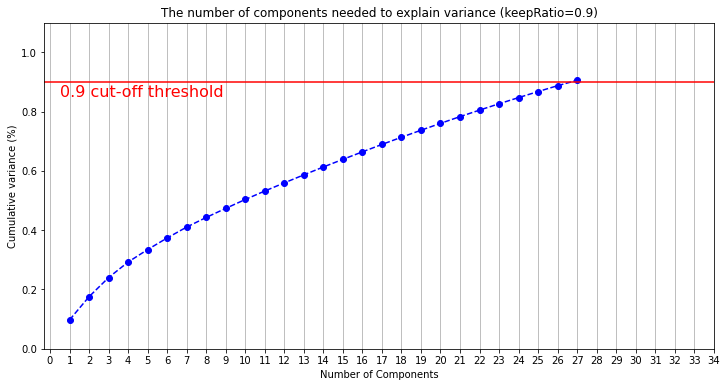

At a keepRatio of 0.95 PCA has chosen 30 components (n_components).


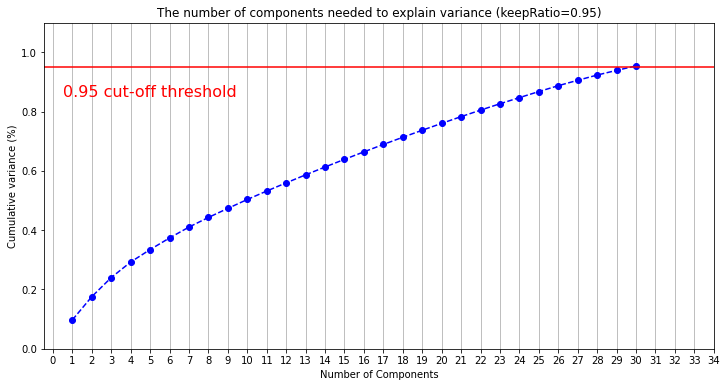

At a keepRatio of 0.99 PCA has chosen 34 components (n_components).


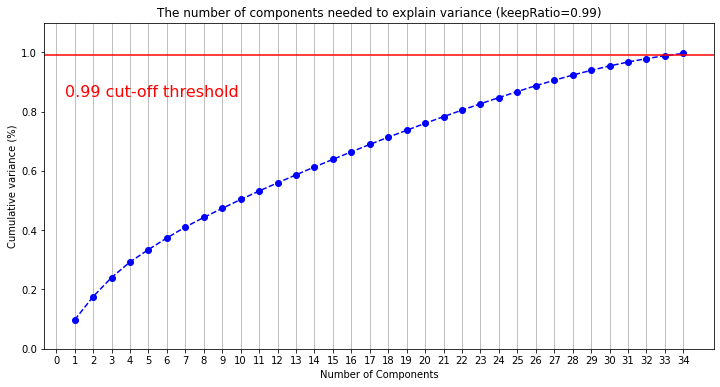

In [13]:
# Let's examine the difference between a 90%, 95% and 99% keepRatio for PCA

for keepRatio in keepRatio_candidates:

    # Make an instance of the Model
    pca = PCA(keepRatio)

    # Apply PCA to the data
    pca.fit(X)

    # Print out the number of components
    print("At a keepRatio of " + str(keepRatio) + " PCA has chosen " + str(pca.n_components_) + " components (n_components).")
    
    # https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/

    plt.rcParams["figure.figsize"] = (12,6)

    fig, ax = plt.subplots()
    xi = np.arange(1, pca.n_components_+1, step=1)
    y = np.cumsum(pca.explained_variance_ratio_)

    plt.ylim(0.0,1.1)
    plt.plot(xi, y, marker='o', linestyle='--', color='b')

    plt.xlabel('Number of Components')
    plt.xticks(np.arange(0, 35, step=1)) #change from 0-based array index to 1-based human-readable label
    plt.ylabel('Cumulative variance (%)')
    plt.title('The number of components needed to explain variance (keepRatio=' + str(keepRatio) +')')

    plt.axhline(y=keepRatio, color='r', linestyle='-')
    plt.text(0.5, 0.85, str(keepRatio) + ' cut-off threshold', color = 'red', fontsize=16)
    ax.grid(axis='x')
    plt.savefig((outputDir + '/PCA' + str(format(keepRatio, '.2f')).replace(".", "_") +'.pdf').lower())
    plt.show()

According to the results of the above analysis, the PCA algorithm will reduce the number of components to 27 while maintaining a 90% cumulative variance. This means that just over 90% of the variation is accounted for by 27 components. That would lead us to believe that by combining these 27 elements, we would be able to recover the majority of the data's critical characteristics.  For this study, a keepRatio of 90% would be sufficient and would speed up our clustering algorithms.

In [14]:
keepRatio = .9

<u>Note:</u> Each subset of features is treated with PCA because if the feature reduction was at the full dataset level some features may become unavailable in the subsets defined above. So the same PCA procedure as mentioned previously will be applied on each dataset from this point on, and the keepRatio identified here remains constant.

---

### Dendrograms

For defining groups in a data set, hierarchical clustering is an alternative to partitional clustering. Unlike with the partitional k-means method, hierarchical clustering creates a hierarchy of clusters and does not require one to define the number of clusters ahead of time. The hierarchical method is deterministic but this is affected by the choice of linkage method. The results of hierarchical clustering can be conveniently visualized using an elegant tree-based representation called a dendrogram, which has an advantage over k-means clustering.

In the form of a tree, the dendrogram depicts clusters and subclusters. All elements are contained in the root cluster, and each element is a single element. Clusters are merged according to how close they are. The distance between the clusters that are combined determines the vertical separation between levels. Distance between numerical and categorical data types can be calculated in a number of ways.

Agglomerative clustering, also known as AGNES (AGglomerative NESting), is a bottom-up approach to hierarchical clustering. Initially, each observation is viewed as a single-element cluster (leaf). The two clusters that are the most similar are merged into a new larger cluster at each stage of the algorithm (nodes). This process is repeated until each point belongs to just one root cluster. Divisive top down clustering (DIANA) is also available but does not scale well and is not attempted here due to the size of data set.

Changes to the linkage formula are possible in AGNES. The most balanced and useful clusters are generated by Ward and Complete minimum variance linkage. The different linkage approaches are iterated over in the script below. The linkage feature chosen has a significant impact on cluster membership.

#### For Each Feature Subset, Apply the Scaler, PCA, and Plot a Dendrograms.

In [15]:
outputDir = "output/dendrograms"

# create an out put directory if it doesn't exist

if not os.path.exists(outputDir):
    os.makedirs(outputDir)

In [16]:
# clear out the files in the directory

files = glob.glob(outputDir + '/*')
for f in files:
    os.remove(f)


---- Demographic ----


Demographic subset initial shape: (10108, 14)

PCA has chosen 10 components (n_components) for this subset: Demographic

algorithm=agglomerativeclustering : subset=demographic : link=ward : 5.161282062530518 seconds to determine (z) linkages


<Figure size 864x432 with 0 Axes>

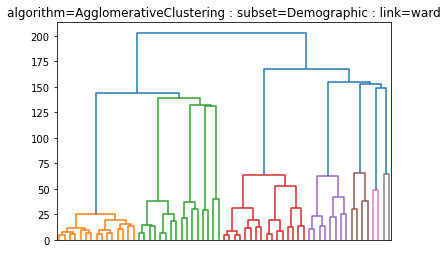

algorithm=agglomerativeclustering : subset=demographic : link=complete : 5.749994993209839 seconds to determine (z) linkages


<Figure size 864x432 with 0 Axes>

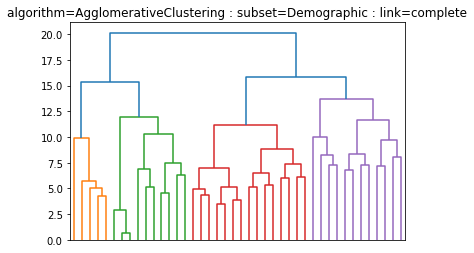

algorithm=agglomerativeclustering : subset=demographic : link=single : 2.4517760276794434 seconds to determine (z) linkages


<Figure size 864x432 with 0 Axes>

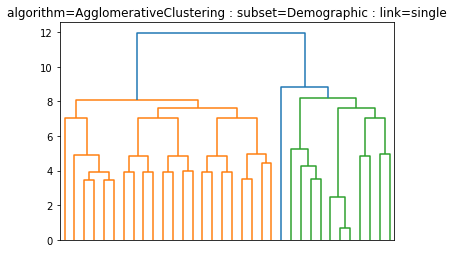

algorithm=agglomerativeclustering : subset=demographic : link=average : 5.26206111907959 seconds to determine (z) linkages


<Figure size 864x432 with 0 Axes>

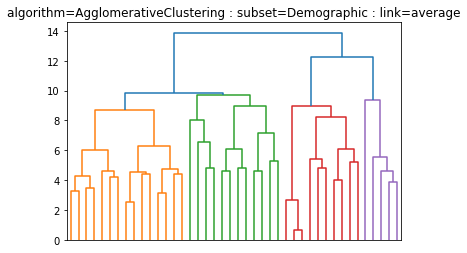


---- Social ----


Social subset initial shape: (10108, 14)

PCA has chosen 11 components (n_components) for this subset: Social

algorithm=agglomerativeclustering : subset=social : link=ward : 5.815503835678101 seconds to determine (z) linkages


<Figure size 864x432 with 0 Axes>

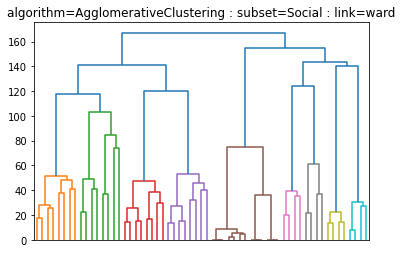

algorithm=agglomerativeclustering : subset=social : link=complete : 4.625241041183472 seconds to determine (z) linkages


<Figure size 864x432 with 0 Axes>

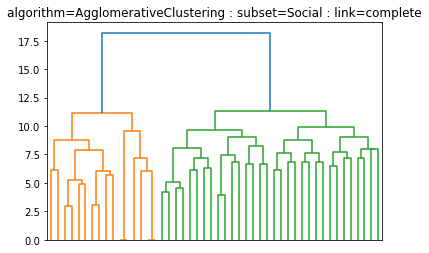

algorithm=agglomerativeclustering : subset=social : link=single : 3.1754839420318604 seconds to determine (z) linkages


<Figure size 864x432 with 0 Axes>

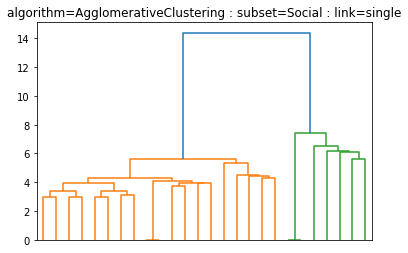

algorithm=agglomerativeclustering : subset=social : link=average : 6.449296951293945 seconds to determine (z) linkages


<Figure size 864x432 with 0 Axes>

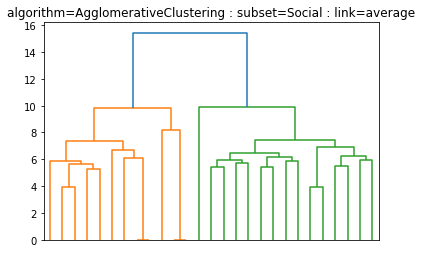


---- Ethical ----


Ethical subset initial shape: (10108, 5)

PCA has chosen 4 components (n_components) for this subset: Ethical

algorithm=agglomerativeclustering : subset=ethical : link=ward : 3.6140689849853516 seconds to determine (z) linkages


<Figure size 864x432 with 0 Axes>

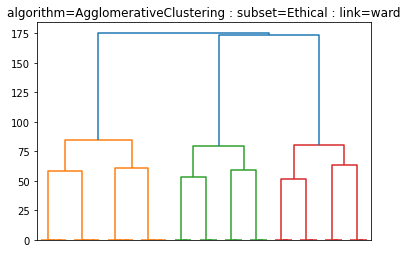

algorithm=agglomerativeclustering : subset=ethical : link=complete : 1.8119361400604248 seconds to determine (z) linkages


<Figure size 864x432 with 0 Axes>

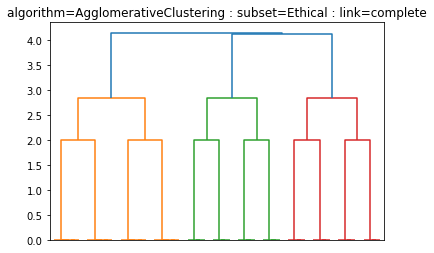

algorithm=agglomerativeclustering : subset=ethical : link=single : 1.8362979888916016 seconds to determine (z) linkages


<Figure size 864x432 with 0 Axes>

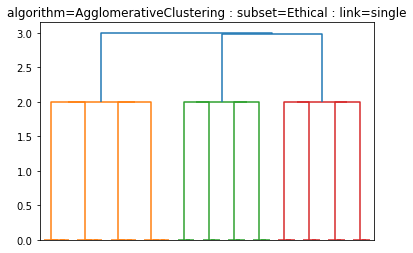

algorithm=agglomerativeclustering : subset=ethical : link=average : 2.9886531829833984 seconds to determine (z) linkages


<Figure size 864x432 with 0 Axes>

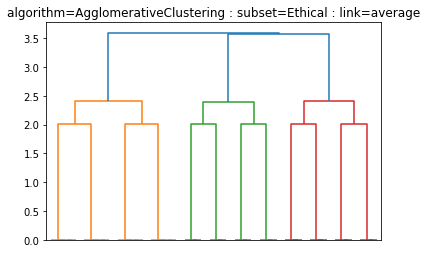


---- Technical ----


Technical subset initial shape: (10108, 5)

PCA has chosen 4 components (n_components) for this subset: Technical

algorithm=agglomerativeclustering : subset=technical : link=ward : 2.8504722118377686 seconds to determine (z) linkages


<Figure size 864x432 with 0 Axes>

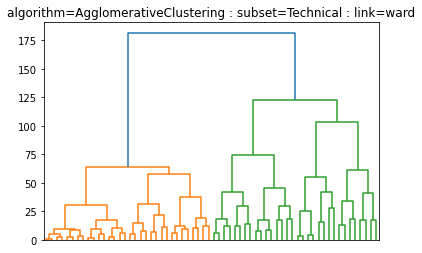

algorithm=agglomerativeclustering : subset=technical : link=complete : 2.261367082595825 seconds to determine (z) linkages


<Figure size 864x432 with 0 Axes>

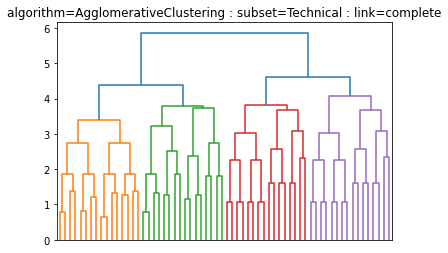

algorithm=agglomerativeclustering : subset=technical : link=single : 1.5270469188690186 seconds to determine (z) linkages


<Figure size 864x432 with 0 Axes>

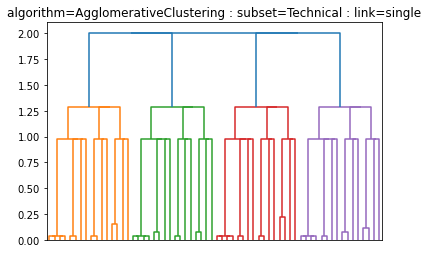

algorithm=agglomerativeclustering : subset=technical : link=average : 3.2794408798217773 seconds to determine (z) linkages


<Figure size 864x432 with 0 Axes>

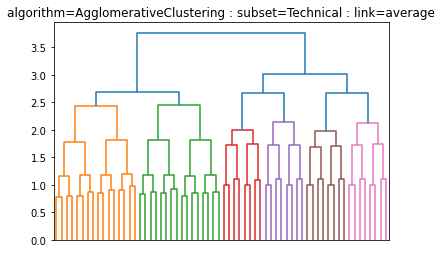


---- All ----


All subset initial shape: (10108, 38)

PCA has chosen 27 components (n_components) for this subset: All

algorithm=agglomerativeclustering : subset=all : link=ward : 7.453253746032715 seconds to determine (z) linkages


<Figure size 864x432 with 0 Axes>

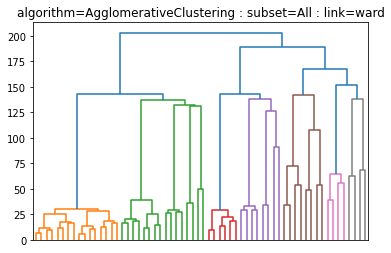

algorithm=agglomerativeclustering : subset=all : link=complete : 7.8488380908966064 seconds to determine (z) linkages


<Figure size 864x432 with 0 Axes>

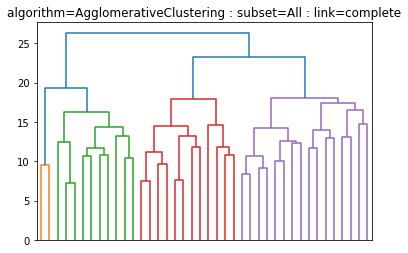

algorithm=agglomerativeclustering : subset=all : link=single : 3.686814785003662 seconds to determine (z) linkages


<Figure size 864x432 with 0 Axes>

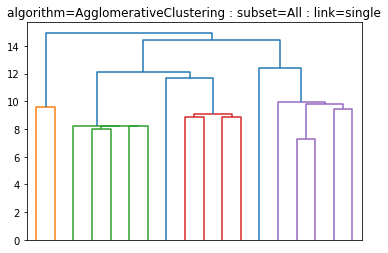

algorithm=agglomerativeclustering : subset=all : link=average : 9.289797067642212 seconds to determine (z) linkages


<Figure size 864x432 with 0 Axes>

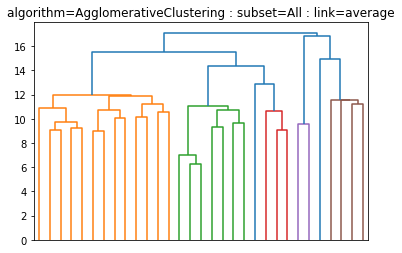

In [17]:
# Run a sequence of steps to generate dendrogram for each feature subset
for i, subset in enumerate(subsets):
    
    subset_title = titles[i]
    features = df[subset]
    
    print("\n---- " + subset_title + " ----\n\n")
    print(str(titles[i]) + " subset initial shape: " + str(features.shape) + "\n")
    
    # Apply Standard Scaler
    
    scaler = StandardScaler()
    
    data = scaler.fit_transform(features)
    labels = df.index
    
    # Apply PCA
    
    pca = PCA(keepRatio)
    
    pca.fit_transform(data)
    
    # Print out the number of components
    print("PCA has chosen "+ str(pca.n_components_) +" components (n_components) for this subset: "+ titles[i] +"\n")
    
    algName = "AgglomerativeClustering"

    for link in ['ward', 'complete', 'single', 'average']:
        plt.figure()
        start_time = time.time()
        Z = linkage(data, method=link)
        end_time = time.time()
        plt.figure(figsize=(6, 4))
        plt.title("algorithm=" + algName + " : subset=" + subset_title + " : link=" + link )
        
        # hide x-axis labels ~ confusing too the the chart
        ax = plt.gca()
        ax.axes.xaxis.set_visible(False)
        
        # Limited the p level to 5 because the dendrograms were taking a very long time to generate
        
        R = dendrogram(Z, labels=labels, truncate_mode='level', p=5)
        plt.savefig((outputDir + '/AGNES_'+ subset_title +'_'+link+'.pdf').lower())
        elapsed_time = end_time-start_time
        print(("algorithm=" + algName + " : subset=" + subset_title + " : link=" + link + " : " 
               + str(elapsed_time) +" seconds to determine (Z) linkages").lower())
        plt.show()
    

**Interpretation of Dendrograms:**

Hierarchical clustering generates a dendrogram that depicts the relationships between clusters in the data. Each leaf in the dendrogram corresponds to one observation in the study above. When one progresses up the tree, similar observations are grouped together into branches, which are then fused at a higher level.

The dendrogram is a summary of the distance matrix, but like other summaries, it loses information. Only when the ultrametric tree inequality holds, which is unusual, can the number of clusters be interpreted. Dendrograms should not be used to determine the number of clusters in data; instead, they should be used to indicate a number of clusters where there is no real evidence to support them.

Hierarchical clustering helps to look at data at various scales and therefore see hierarchy in the data set. Other techniques that concentrate on finding a single cluster mapping cannot provide insights like this. Dendrograms provide a broad range of objective functions, most of which are linked to linkage.  It is used to estimate parameters for other focused methods, such as the k parameter of the k-means clustering process, in this case.

The method uses a lot of computing and memory resources, and generating the plot can take a long time.  The ```truncate mode='level', p=5 parameter``` was introduced because it was taking hours to produce the dendrograms for visual interpretation. The documentaions says with regard to the setting: <i>No more than p levels of the dendrogram tree are displayed. A “level” includes all nodes with p merges from the last merge.</i>  This had an immediate effect of speeding up the image generation without affecting the results dramatically.

---

## Partitional Clustering

### Clustering Using K-means

We use partitional clustering when we want to give one or more labels to the observations by assigning them a membership in a cluster. It only gives the final clustering stage, unlike hierarchical clustering. Partitional clustering is not deterministic since it needs a starting value, such as the number of clusters to find.  This raises the likelihood of seeking a local rather than a global optimum. It has the advantage of having more parameters to play with and the outcomes are reasonably quick to understand.

K-means clustering is one of the most widely used clustering algorithms for partitioning observations into a series of k clusters using partitional clustering, where k is a number that the analyst identifies. In 1957, Bell Labs' Stuart P. Lloyd proposed the algorithm that defines a hard partitioning of data without proposing a membership probability with the clustering result.

K-means attempts to group observations into mutually exclusive groups (or clusters) such that observations within the same cluster are as similar as possible (high intra-class similarity), while observations from different clusters are as dissimilar as possible (high inter-cluster dissimilarity). It iterates through the data using E and M steps (Expectation and Maximisation).

---

### Finding the k

When using k-means and GMM for clustering, the first step is to specify how many clusters (k) will be formed in the final solution. It is not practical to test every possible cluster combination unless our data set is very small, since there are nearly infinite ways to partition n observations into k clusters.

Two methods for finding k are tried below, Elbow and Silhouette.

#### Elbow Method

The elbow method is a heuristic for figuring out how many clusters there are in a data set. Plotting the explained variation as a function of the number of clusters and selecting the elbow of the curve as the number of clusters to use is the process.

The elbow method is a heuristic for estimating the number of clusters in a data set.  To plot within-cluster sum of squared distance, the method generates a graph (similar to what was used in PCA). The value of k is critical since K-means decreases the number of squared distances inside a cluster (inertia). The inertia is plotted against k, and the best k is read at the "elbow" of the line.

In [18]:
outputDir = "output/elbow"

# create an out put directory if it doesn't exist

if not os.path.exists(outputDir):
    os.makedirs(outputDir)

In [19]:
# clear out the files in the directory

files = glob.glob(outputDir + '/*')
for f in files:
    os.remove(f)

In [20]:
# This suppresses warnings which were being encountered (not critical can be ignored)
if not sys.warnoptions:
    warnings.simplefilter("ignore")

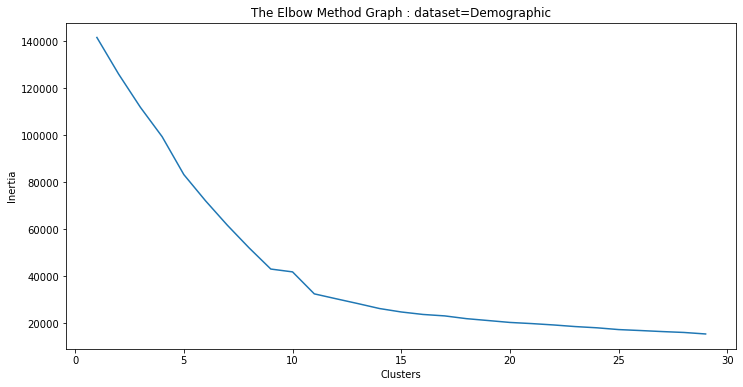

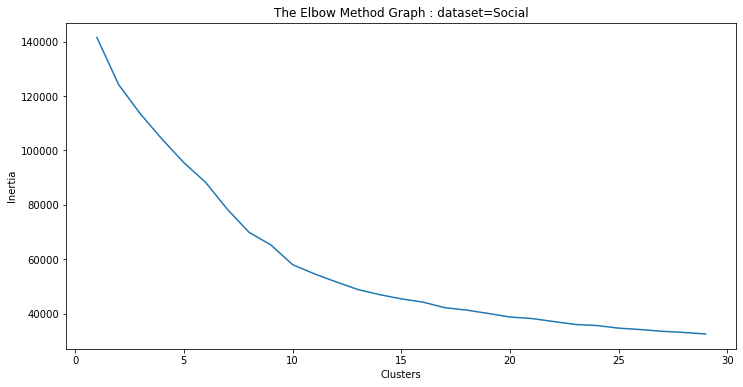

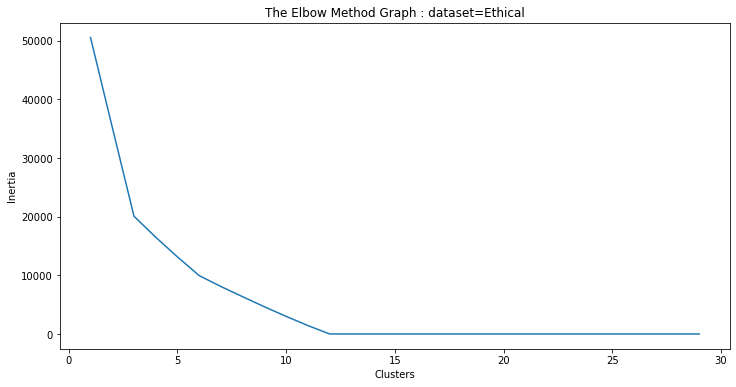

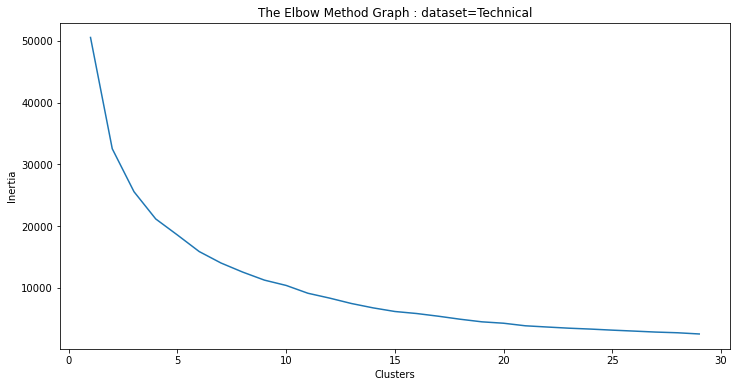

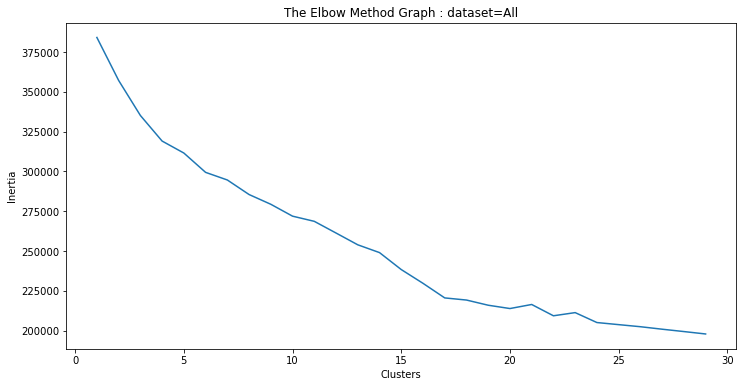

In [21]:
# The elbow method is used to determine the optimum number of clusters. 

# For each subset:
# The k-means algorithm will be fitted to our data in this loop.
# Second, we'll compute the number of squares within each cluster.
# These are appended to the wcss list.
# Finally we plot the elbow graph

for j, subset in enumerate(subsets):
    wcss=[]
    
    data = df[subset]
    
    # Apply Standard Scaler
    
    scaler = StandardScaler()
    
    data = scaler.fit_transform(data)
    
    # Apply PCA
    
    pca = PCA(keepRatio)
    
    pca.fit_transform(data)

    # Apply k-mean algorithm    

    for i in range(1,30):

        kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )

        kmeans.fit(data)
        
        #kmeans.inertia_ attribute is:  Sum of squared distances of samples to their closest cluster center.

        wcss.append(kmeans.inertia_)


    #Plot the elbow graph
    plt.plot(range(1,30),wcss)
    plt.title('The Elbow Method Graph : dataset='+ titles[j])
    plt.xlabel('Clusters')
    plt.ylabel('Inertia')
    plt.savefig((outputDir + '/ELBOW_'+titles[j]+'.pdf').lower())
    plt.show()
    


For each subset, the following number of clusters are chosen based on the Elbow Method analysis:
    
* Demographic: 9
* Social: 8
* Ethical: 4
* Technical: 4
* All: 4

In [22]:
# put the findings into an array for access in a loop
settings_kmeans_elbow = [9, 8, 4, 4, 4]

# These are lists of potential values for k for each subset as found by 
# the elbow method and
# also by looking at the potential cluster numbers in the Dendrograms

cluster_options_demographic = [3, 4, 7, 9]
cluster_options_social = [2, 8, 9]
cluster_options_ethical = [3, 4]
cluster_options_technical = [2, 4, 6]
cluster_options_all = [4, 5, 6, 7]

cluster_options = [cluster_options_demographic, cluster_options_social, 
                   cluster_options_ethical, cluster_options_technical, 
                   cluster_options_all]


---

#### Silhouette Analysis

Silhouette analysis can be used to investigate the separation distance between the resulting clusters. It's a tool for finding out the right k-value for the k-means algorithm. It calculates how far any data point in a cluster is closer to points in the nearest of the other clusters than it is to points in the other clusters.

In [23]:
# This function and the code that follows for the silhouette analysis is adapted from Butler (WIT) lab on 
# called : Selecting the number of clusters with silhouette analysis on KMeans clustering

# Also see https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html """

def plotSilhouetteClusters(n_clusters, cluster_labels, X, sample_silhouette_values, silhouette_avg, ax, title, clusterer, k):

    yStep = round(float(len(X))/(20*n_clusters),0)
    #print("yStep = {}".format(yStep))
    minS = min(-0.2, min(sample_silhouette_values))
    y_lower = yStep

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([minS, 1])
    # The (n_clusters+1)*yStep is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(X) + (n_clusters + 1) * yStep])

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + yStep  # yStep for the 0 samples

    ax.set_title("The silhouette plot for the clusters of the " + title + " subset. " + clusterer + ". k=" + str(k))
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([minS, 0, 0.2, 0.4, 0.6, 0.8, 1])

    return ax

In [24]:
outputDir = "output/silhouette"

# create an out put directory if it doesn't exist

if not os.path.exists(outputDir):
    os.makedirs(outputDir)

In [25]:
# clear out the files in the directory

files = glob.glob(outputDir + '/*')
for f in files:
    os.remove(f)

#### Silhouette Coefficient

Silhouette Coefficient = $\frac{(x-y)}{max(x,y)}$

where, 
* y is the mean intra cluster distance: mean distance to the other instances in the same cluster. 
* x depicts mean nearest cluster distance i.e. mean distance to the instances of the next closest cluster.

The coefficient ranges from -1 to 1. A value near 1 means that the instance is near its cluster and is a member of the correct cluster. A value similar to -1, on the other hand, indicates that the value has been assigned to the incorrect cluster.

In the case of k-means we would only have a value between 0 and 1 because the algorithm guarantees that we are placing the observation in the cluster that has the closest centroid.

The suggested k-values (number of clusters) for the feature subsets identified in the Dendrograms and Elbow Methods above are evaluated using the average silhouette coefficient in the script below.

In [26]:
for i, subset in enumerate(subsets):   
    
    range_n_clusters = cluster_options[i]
    inertiaList = []
    silhouetteList = []
    title = titles[i]
    data = df[subset]
    silhouette_avg = []
    
    print("--- " + title + " Subset ---\n")

    for n_clusters in range_n_clusters:
        
            # Initialize the clusterer with n_clusters value and a random generator
            # seed of 10 for reproducibility.

                clusterer = KMeans(n_clusters=n_clusters, random_state=10)
                cluster_labels = clusterer.fit_predict(data)

                # Append inertia attribute

                inertiaList.append(clusterer.inertia_)

                # Append silhouette score

                silhouetteList.append(silhouette_avg)

                # Compute the silhouette scores for each sample

                sample_silhouette_values = silhouette_samples(data, cluster_labels)


                # The silhouette_score gives the value for all the samples.
                # This gives a view of the density and separation of the formed
                # clusters

                silhouette_avg = silhouette_score(data, cluster_labels)
                print("For n_clusters =", n_clusters,
                      "The average silhouette_score is :", silhouette_avg,"\n")

--- Demographic Subset ---

For n_clusters = 3 The average silhouette_score is : 0.5729990568232526 

For n_clusters = 4 The average silhouette_score is : 0.574866288833308 

For n_clusters = 7 The average silhouette_score is : 0.5497537833710868 

For n_clusters = 9 The average silhouette_score is : 0.5455159170190796 

--- Social Subset ---

For n_clusters = 2 The average silhouette_score is : 0.1939416486628416 

For n_clusters = 8 The average silhouette_score is : 0.28720514126964897 

For n_clusters = 9 The average silhouette_score is : 0.29489961509444385 

--- Ethical Subset ---

For n_clusters = 3 The average silhouette_score is : 0.5037798658408604 

For n_clusters = 4 The average silhouette_score is : 0.5072840133056457 

--- Technical Subset ---

For n_clusters = 2 The average silhouette_score is : 0.6463271600076477 

For n_clusters = 4 The average silhouette_score is : 0.6118300218498713 

For n_clusters = 6 The average silhouette_score is : 0.5256664988121512 

--- All Su

For the array of suggested k-values, the following number of clusters have the best Silhouette coefficients for each subset.

* Demographic: 4
* Social: 9
* Ethical: 4
* Technical: 2
* All: 4

**An observation** about the values found in the Elbow Method and stored in a list (printed below). More than half of the values in this list do not agree with the Silhouette coefficient's findings.

This suggests the elbow method may be ineffective for determining the k-value.  The elbow method was also slow to generate the plots.  If the k-value was not the right match using the elbow method, it may be due to inexperience or a misinterpretation of the elbow graphs. When determining the right k-value, it is preferable to obtain a metric such as the average silhouette coefficients.

In [27]:
print(settings_kmeans_elbow)

[9, 8, 4, 4, 4]


In [28]:
# Clear out the previous cluster options list and repopulate with the new values

cluster_options = []
cluster_options = [4, 9, 4, 2, 4]

In [29]:
print(cluster_options)

[4, 9, 4, 2, 4]


---

#### Silhouette Plot

In the analysis below the silhouette plot shows how similar each point in one cluster is to points in neighboring clusters, and thus allows one to visually determine parameters like cluster count.

A scatter plot of the k-means clusters reduced by PCA to two features is shown alongside the Silhouette Plot. The clusters are difficult to visualize since the subsets have more than two dimensions. In order to visualize the clusters, these scatter plots look at the distance between points in two reduced dimensions.

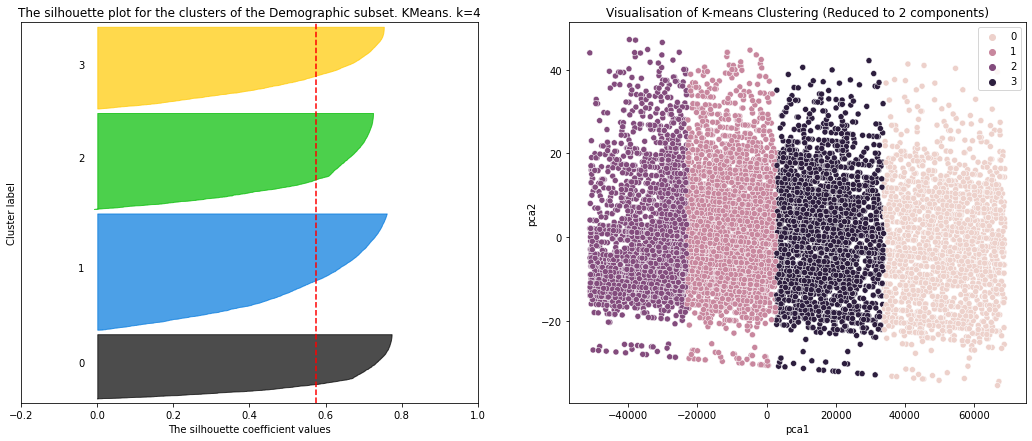

<Figure size 864x432 with 0 Axes>

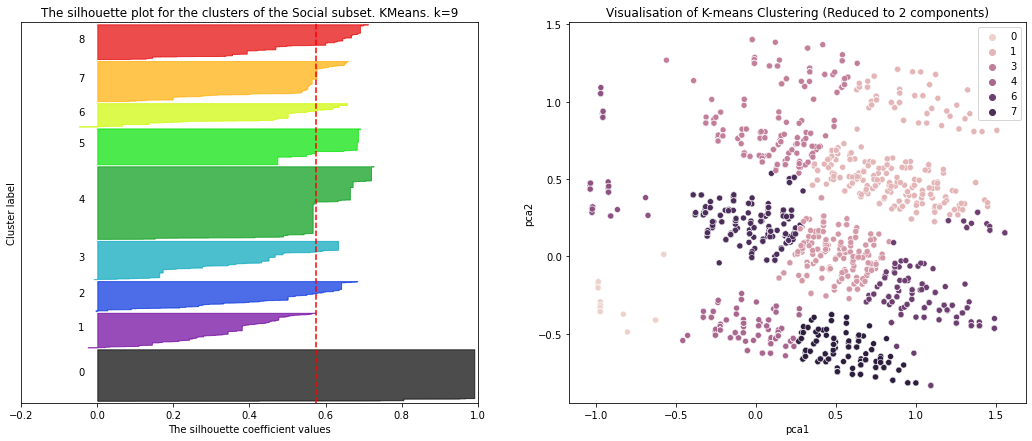

<Figure size 864x432 with 0 Axes>

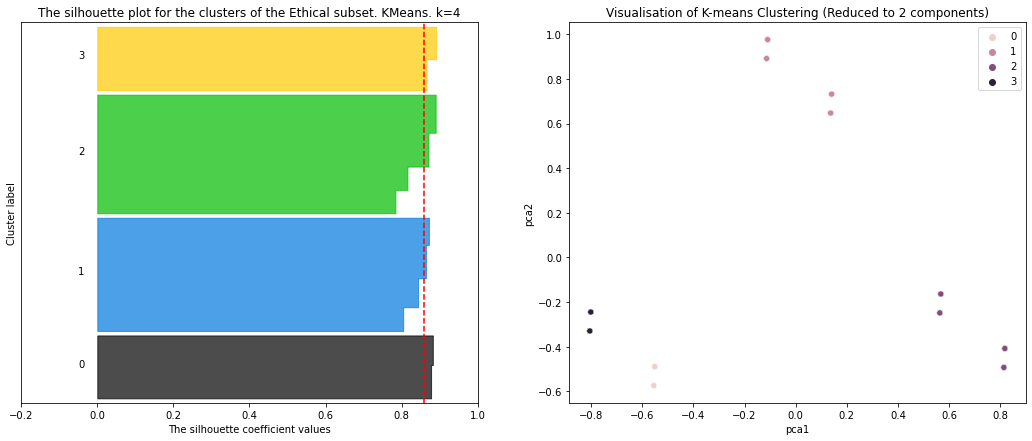

<Figure size 864x432 with 0 Axes>

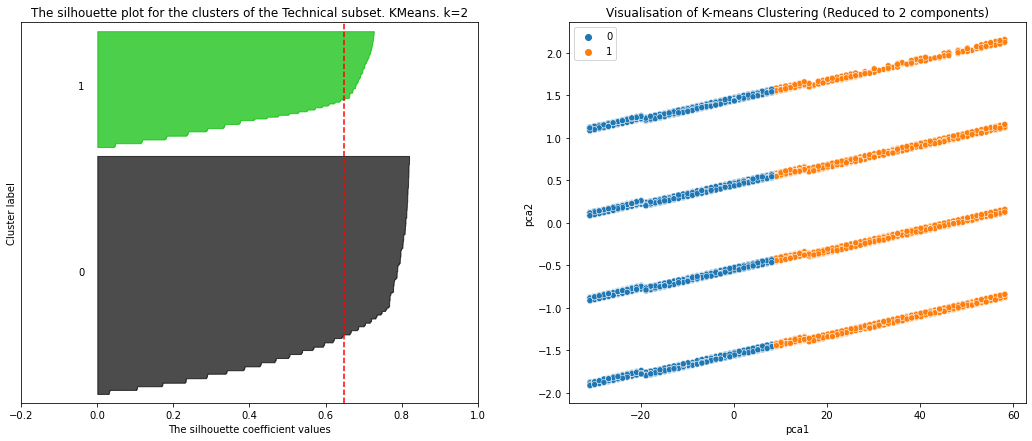

<Figure size 864x432 with 0 Axes>

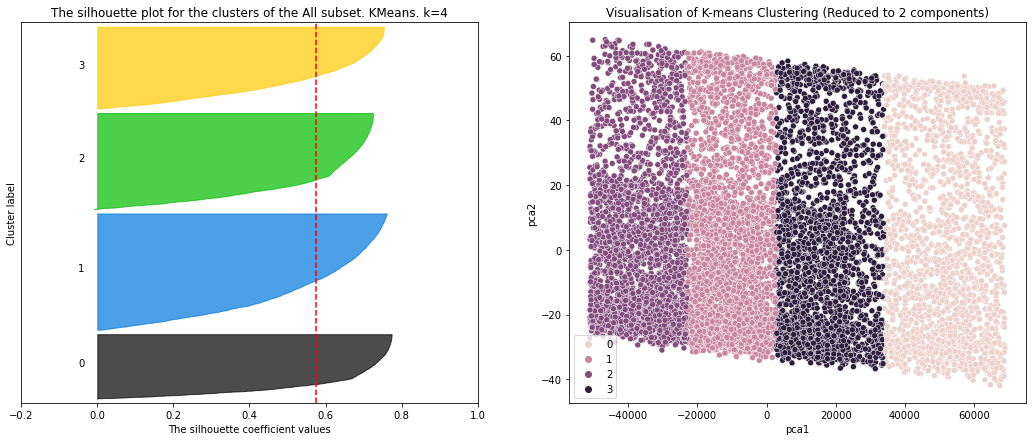

<Figure size 864x432 with 0 Axes>

In [30]:
for i, subset in enumerate(subsets):
    
    clustererName = "KMeans"
    inertiaList = []
    silhouetteList = []
    title = titles[i]

    # reduce data to 2 features before analysis
    data = df[subset]
    data = PCA(n_components=2).fit_transform(data)
        
    n_clusters = cluster_options[i]

    # Create a subplot with 1 row and 2 columns

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)

    # Append inertia attribute

    inertiaList.append(clusterer.inertia_)

    # The silhouette_score gives the average value for all the samples.
    # This gives a view of the density and separation of the formed
    # clusters

    silhouette_avg = silhouette_score(data, cluster_labels)

    # Append silhouette score

    silhouetteList.append(silhouette_avg)

    # Compute the silhouette scores for each sample

    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    ax1 = plotSilhouetteClusters(n_clusters, cluster_labels, data, sample_silhouette_values, silhouette_avg, ax1, title, clustererName, n_clusters)
    
    # Second plot showing the actual clusters formed

    # Have multiple dimensions therefore use PCA to reduce the dimensions to 2 
    # and look at the distance between points
    # Run PCA on the data and reduce the dimensions in pca_num_components dimensions

    reduced_data = PCA(n_components=2).fit_transform(data)
    results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

    sns.scatterplot(x="pca1", y="pca2", hue=cluster_labels, data=results)
    plt.title('Visualisation of K-means Clustering (Reduced to 2 components)')
    plt.savefig((outputDir + '/SILHOUETTE_' + str(title) + '_' + clustererName + '_' + str(n_clusters) + '.pdf').lower())
    plt.show()

    plt.suptitle(("Silhouette analysis for " + clustererName + " clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')


---

### Clustering Using GMM

K-means clustering is a method of hard clustering in which each data point is allocated to a single cluster. As a result, it's useful for clusters that are well-separated. In the case of clusters that overlap or are very close together, this is particularly evident. Fuzzy clustering is a method of assigning points to several clusters and assigning a membership score of 0 to 1 to each cluster.  The GMM approach is a probabilistic clustering technique. It extends k-means by assigning a likelihood weight to each point during the M-step using a fuzzy c-means algorithm. The probability is proportional to the Euclidean distance between the center and the observation. If the form of the cluster is non-directional(spherical) around the centroid, GMM can still be used as it can be directional (ellipsoidal) or non-directional.

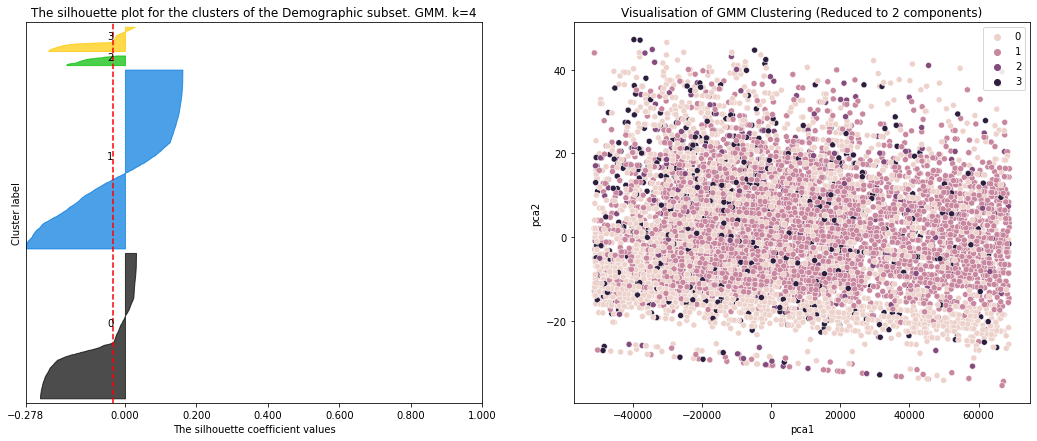

<Figure size 864x432 with 0 Axes>

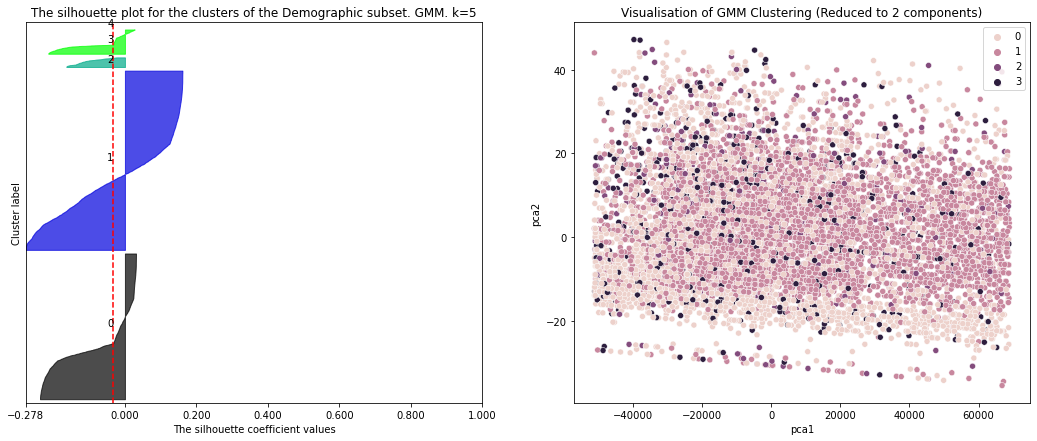

<Figure size 864x432 with 0 Axes>

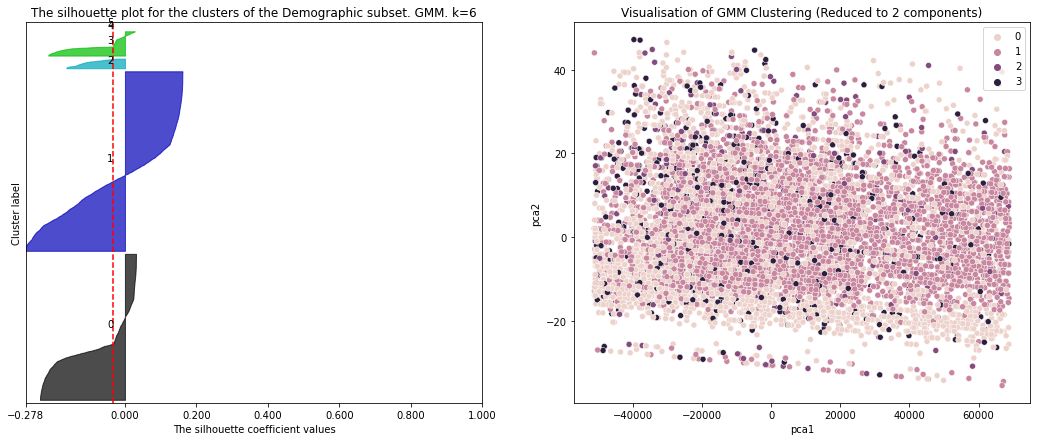

<Figure size 864x432 with 0 Axes>

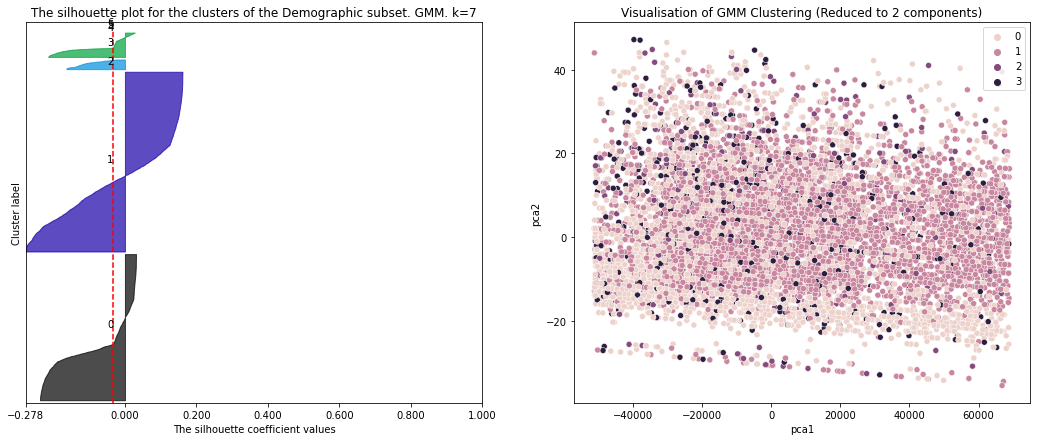

<Figure size 864x432 with 0 Axes>

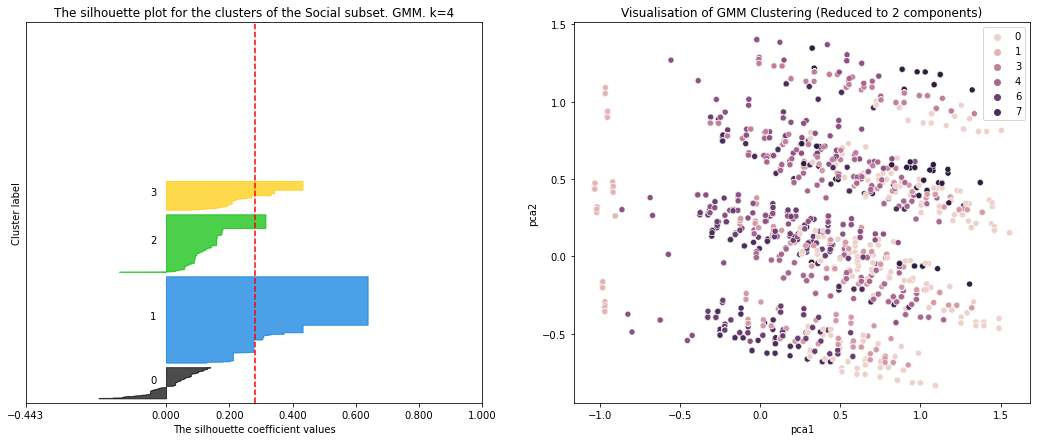

<Figure size 864x432 with 0 Axes>

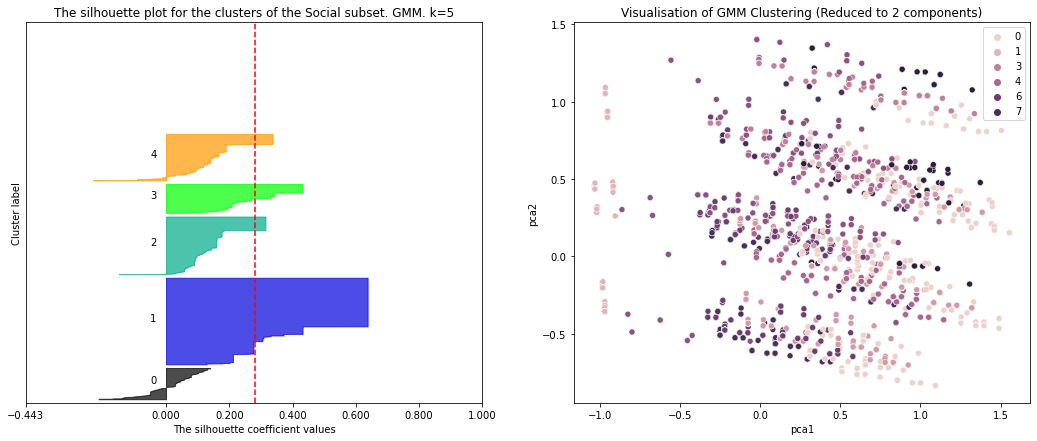

<Figure size 864x432 with 0 Axes>

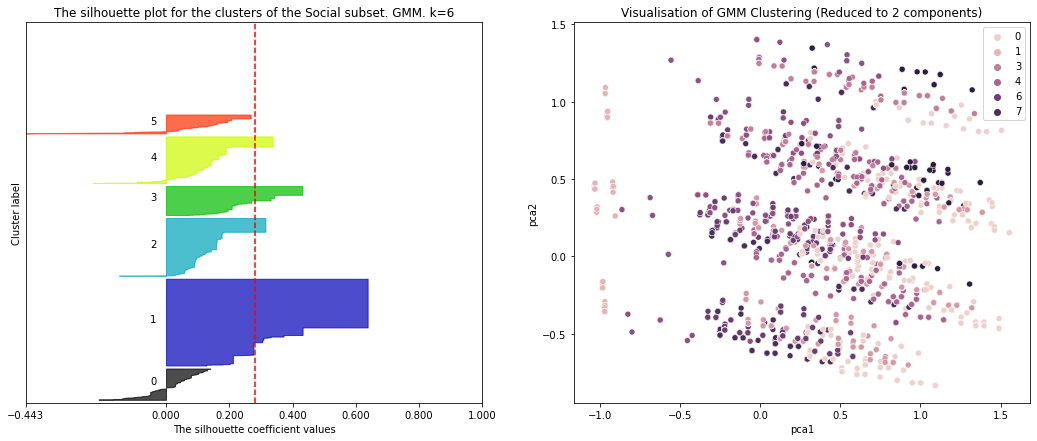

<Figure size 864x432 with 0 Axes>

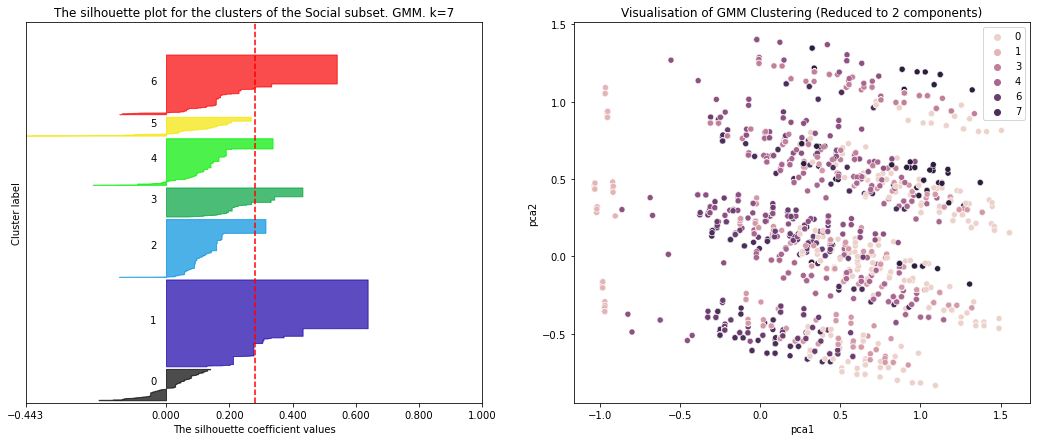

<Figure size 864x432 with 0 Axes>

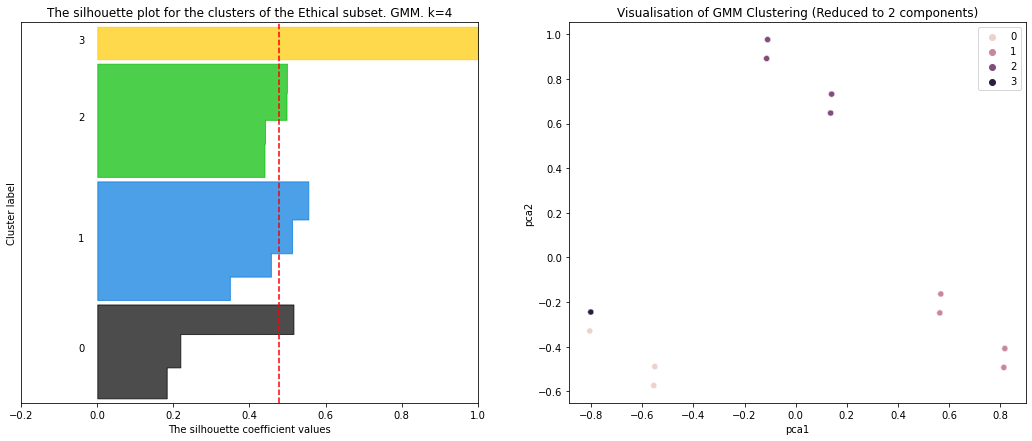

<Figure size 864x432 with 0 Axes>

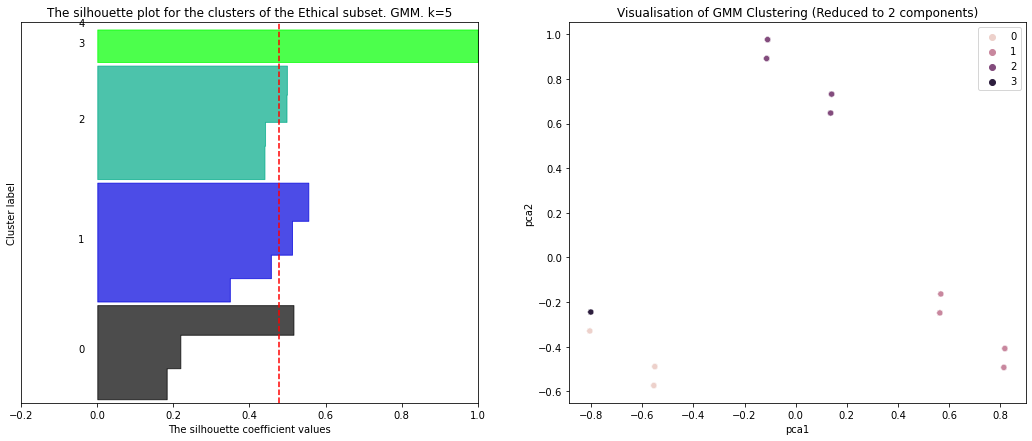

<Figure size 864x432 with 0 Axes>

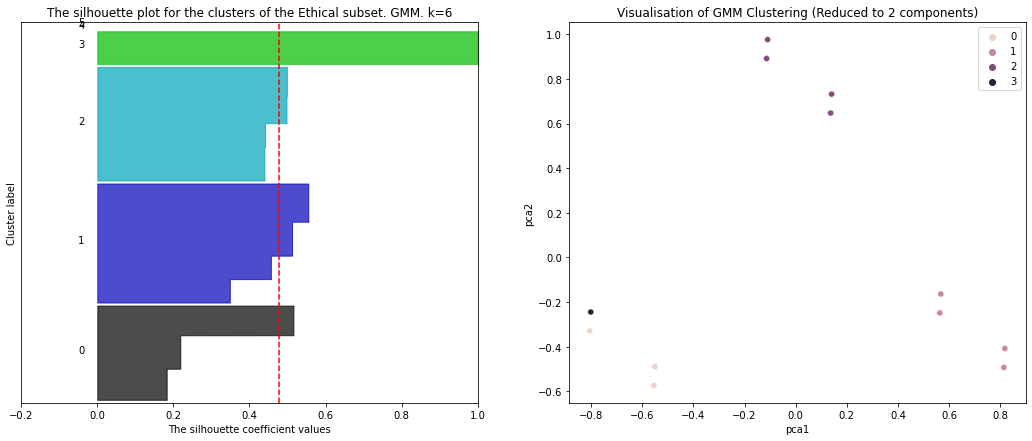

<Figure size 864x432 with 0 Axes>

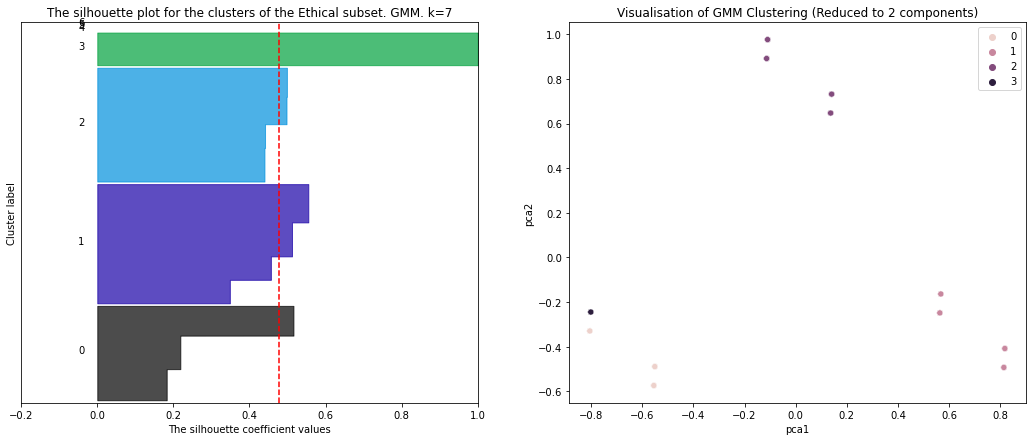

<Figure size 864x432 with 0 Axes>

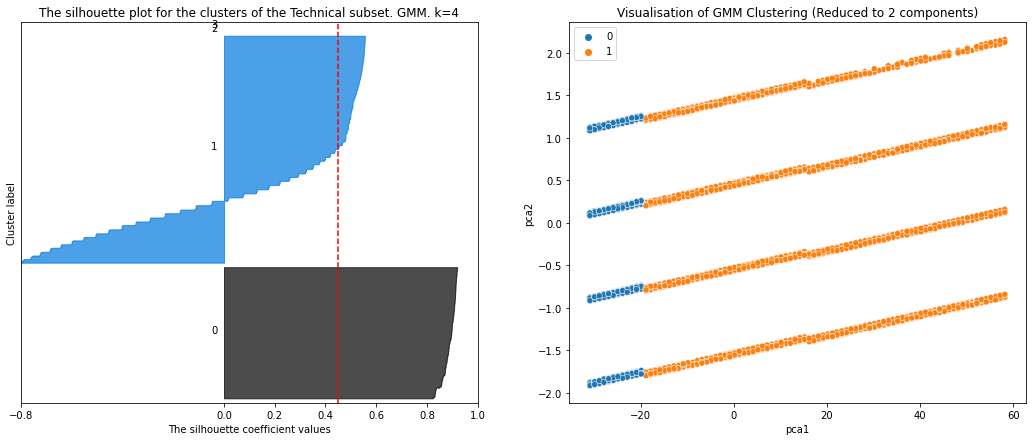

<Figure size 864x432 with 0 Axes>

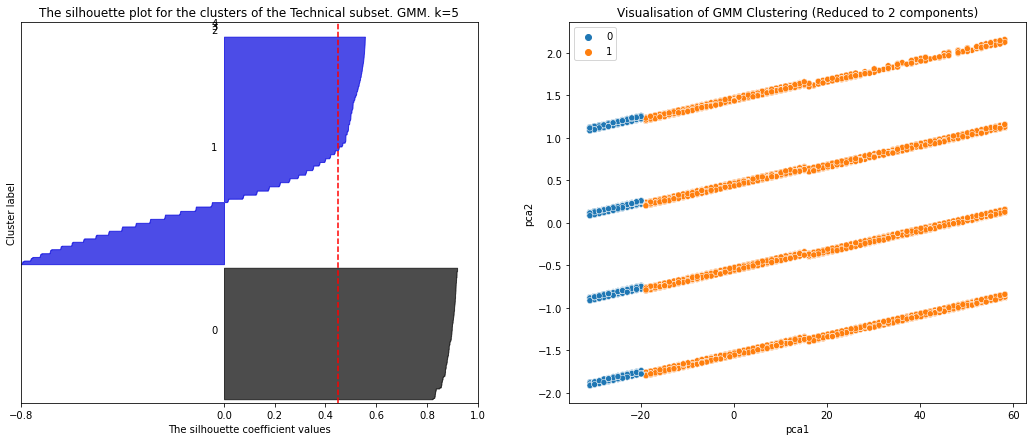

<Figure size 864x432 with 0 Axes>

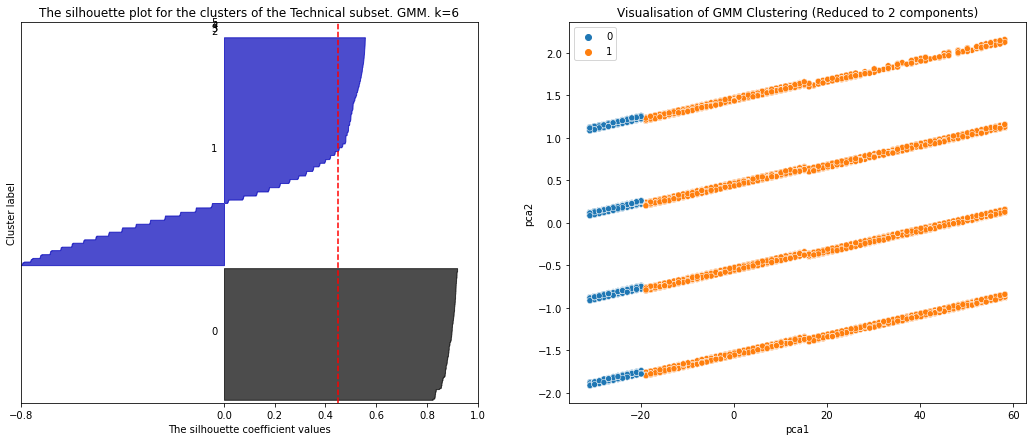

<Figure size 864x432 with 0 Axes>

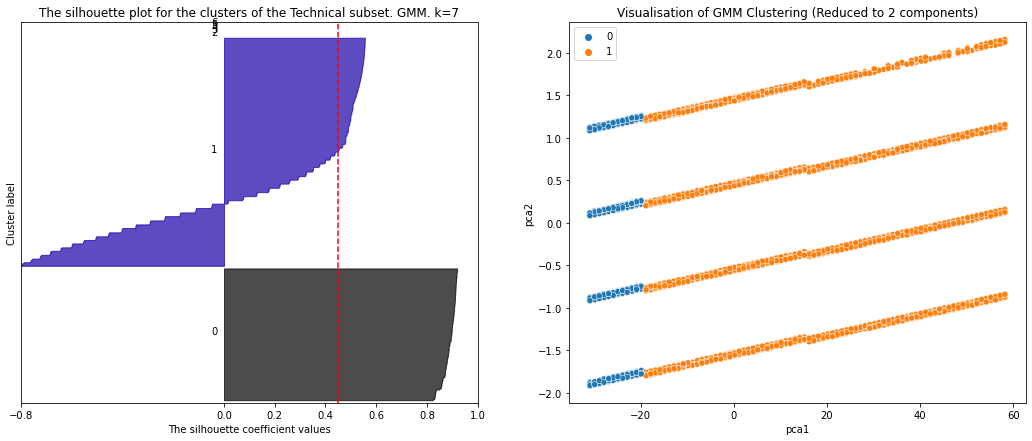

<Figure size 864x432 with 0 Axes>

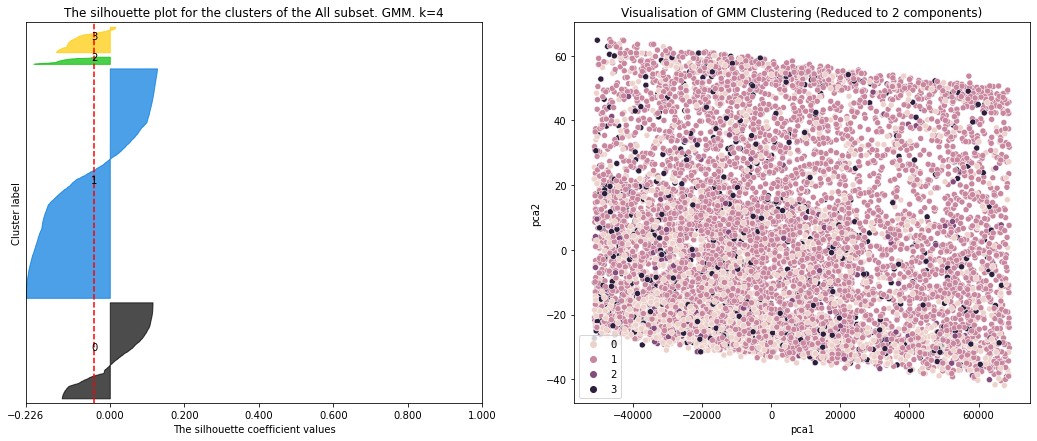

<Figure size 864x432 with 0 Axes>

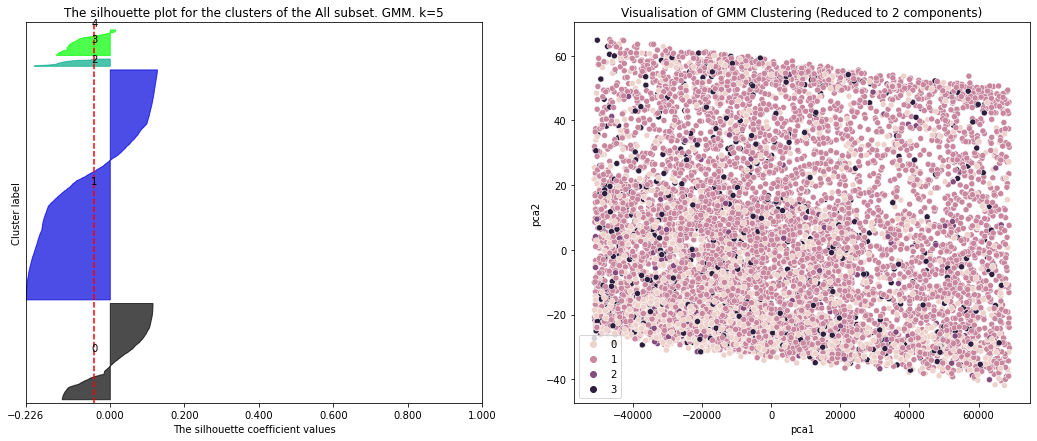

<Figure size 864x432 with 0 Axes>

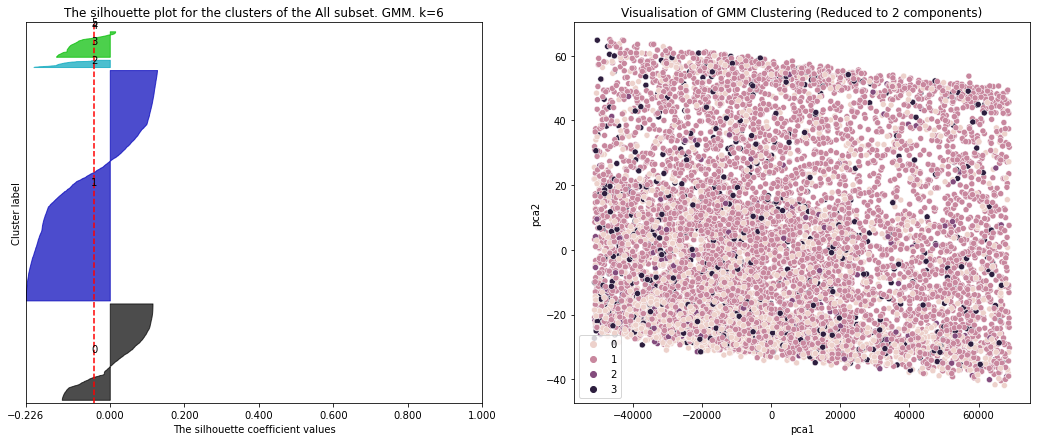

<Figure size 864x432 with 0 Axes>

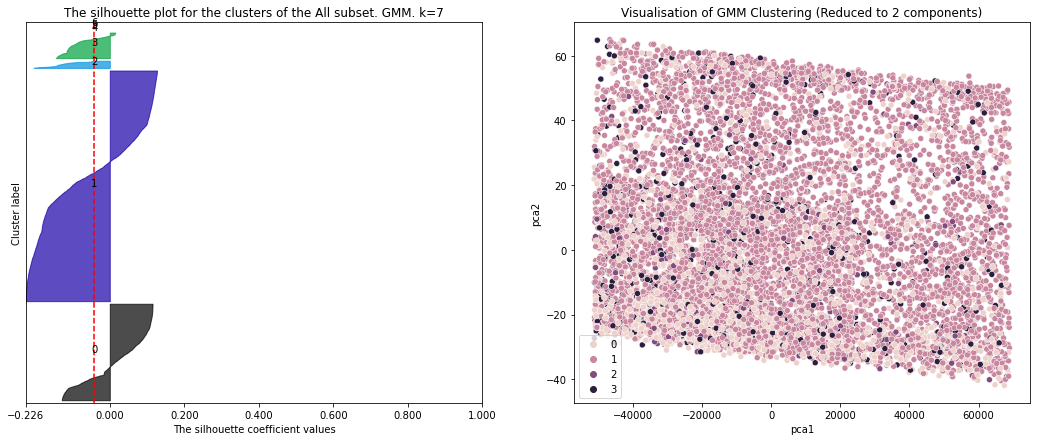

<Figure size 864x432 with 0 Axes>

In [31]:
for i, subset in enumerate(subsets):
    
    clustererName = "GMM"
    inertiaList = []
    silhouetteList = []
    title = titles[i]
    data = df[subset]

    for n_clusters in range_n_clusters:
    
        # Use the same series of options that was used for the K-Means analysis
        # Not strictly the same
        n_components = cluster_options[i]

        # Create a subplot with 1 row and 2 columns

        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.

        clusterer = GaussianMixture(n_components=n_components, random_state=10)
        cluster_labels = clusterer.fit_predict(data)

        # Append inertia attribute

        #inertiaList.append(clusterer.inertia_)

        # The silhouette_score gives the average value for all the samples.
        # This gives a view of the density and separation of the formed
        # clusters

        silhouette_avg = silhouette_score(data, cluster_labels)

        # Append silhouette score

        silhouetteList.append(silhouette_avg)

        # Compute the silhouette scores for each sample

        sample_silhouette_values = silhouette_samples(data, cluster_labels)

        ax1 = plotSilhouetteClusters(n_clusters, cluster_labels, data, sample_silhouette_values, silhouette_avg, ax1, title, clustererName, n_clusters)

        # Second plot showing the actual clusters formed

        # Have multiple dimensions therefore use PCA to reduce the dimensions to 2 
        # and look at the distance between points
        # Run PCA on the data and reduce the dimensions in pca_num_components dimensions

        reduced_data = PCA(n_components=2).fit_transform(data)
        results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

        sns.scatterplot(x="pca1", y="pca2", hue=cluster_labels, data=results)
        plt.title('Visualisation of ' + clustererName + ' Clustering (Reduced to 2 components)')
        plt.savefig((outputDir + '/SILHOUETTE_' + clustererName + '_' + title + '_' + str(n_components) + '.pdf').lower())
        plt.show()

        plt.suptitle(("Silhouette analysis for " + clustererName + " clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

In [32]:
for i, subset in enumerate(subsets):   
    
    #range_n_clusters = cluster_options[i]
    print(range_n_clusters)
    inertiaList = []
    silhouetteList = []
    title = titles[i]
    data = df[subset]
    silhouette_avg = []
    
    print("--- " + title + " Subset ---\n")

    for n_clusters in range_n_clusters:
        
            # Initialize the clusterer with n_clusters value and a random generator
            # seed of 10 for reproducibility.

                clusterer = GaussianMixture(n_components=n_clusters)
                cluster_labels = clusterer.fit_predict(data)

                # Append silhouette score

                silhouetteList.append(silhouette_avg)

                # Compute the silhouette scores for each sample

                sample_silhouette_values = silhouette_samples(data, cluster_labels)


                # The silhouette_score gives the value for all the samples.
                # This gives a view of the density and separation of the formed
                # clusters

                silhouette_avg = silhouette_score(data, cluster_labels)
                print("For n_clusters =", n_clusters,
                      "The average silhouette_score is :", silhouette_avg,"\n")

[4, 5, 6, 7]
--- Demographic Subset ---

For n_clusters = 4 The average silhouette_score is : -0.033128760429003354 

For n_clusters = 5 The average silhouette_score is : -0.060179208593725275 

For n_clusters = 6 The average silhouette_score is : -0.08897202444939258 

For n_clusters = 7 The average silhouette_score is : -0.10903087901707684 

[4, 5, 6, 7]
--- Social Subset ---

For n_clusters = 4 The average silhouette_score is : 0.16502551700061666 

For n_clusters = 5 The average silhouette_score is : 0.24830548211439993 

For n_clusters = 6 The average silhouette_score is : 0.22511662723658268 

For n_clusters = 7 The average silhouette_score is : 0.22524063156397015 

[4, 5, 6, 7]
--- Ethical Subset ---

For n_clusters = 4 The average silhouette_score is : 0.5072840133056457 

For n_clusters = 5 The average silhouette_score is : 0.5145936268398513 

For n_clusters = 6 The average silhouette_score is : 0.5175310126927808 

For n_clusters = 7 The average silhouette_score is : 0.626

---

### Clustering Using DBSCAN

K-means and GMM were previously used to identify clusters. Both methods require the number of clusters (k) to be specified at the start. These methods produce convex clusters, and the data that work best with these methods is linearly separable and free of outliers.

Density-based clustering will help alleviate these constraints. Using a heuristic that arbitrarily generated contiguous regions with high data point density. Datapoints outside of these areas are considered noise and are ignored. Rather than k, the density threshold is set. It searches for areas with a higher data density and assigns labels in those areas to the appropriate cluster.  Any additional observations are assumed to be noise or boundary observations. Density-based clustering does not always assign a label to each datapoint, but when it does, each data point will only have one label.

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is an algorithm for deriving clusters in areas of high density data.

#### Advantages of DBSCAN
* A pre-determined number of clusters is not needed by DBSCAN.
* Instead of classifying outliers into a cluster, DBSCAN classifies them as noise.
* DBSCAN is more versatile than other partitioning approaches, such as K-means, when it comes to cluster size and form. It can distinguish between clusters of varying size and shape, making it more effective in messy real-life situations.

#### DBSCAN Hyperparameters:
* Epsilon (ε), which specifies the maximum distance between two points within a cluster.
* Minimum samples (“MinPts”), which refers to the smallest number of data points available to form a distinct cluster. It is the smallest number of neighbors that a cluster with radius/max length of epsilon can have.

#### Estimating Epsilon and MinPts Value

**Rules of Thumb:**

The value of MinPts should be increased as the size of the data set grows. Choose a greater MinPts value if the data set is noisier. In general, MinPts should be greater than or equal to the data set's dimensionality. Use DBSCAN's default value of MinPts = 4 for 2-dimensional data. If the data has more than two dimensions, use MinPts = 2*dim, where dim refers to the data's dimensions.

--- Demographic ----
Minpts = 28


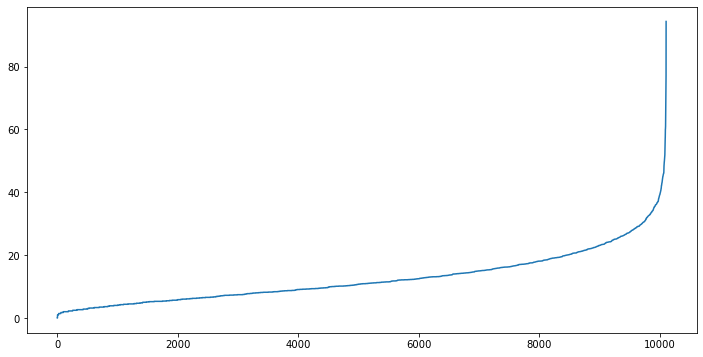

--- Social ----
Minpts = 28


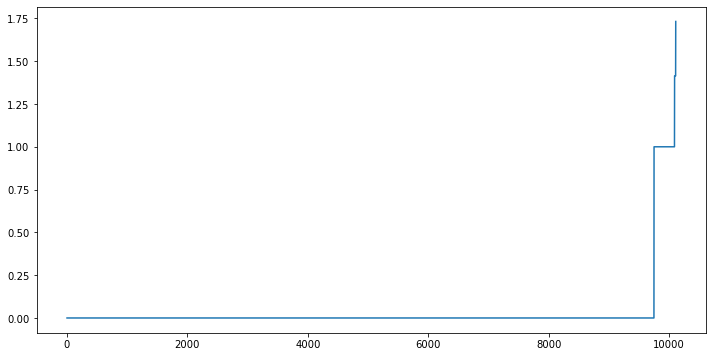

--- Ethical ----
Minpts = 10


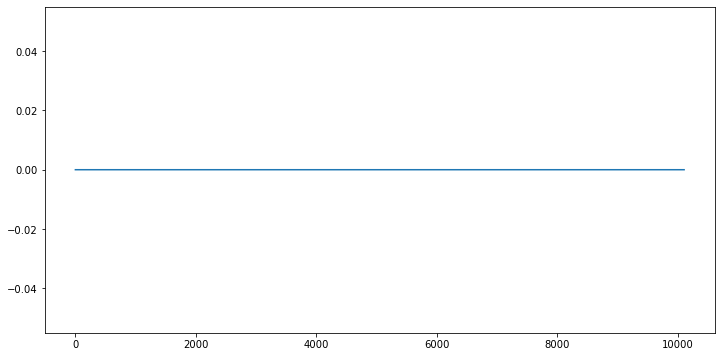

--- Technical ----
Minpts = 10


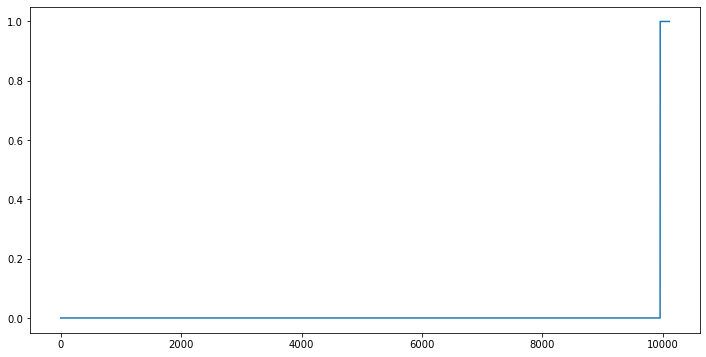

--- All ----
Minpts = 76


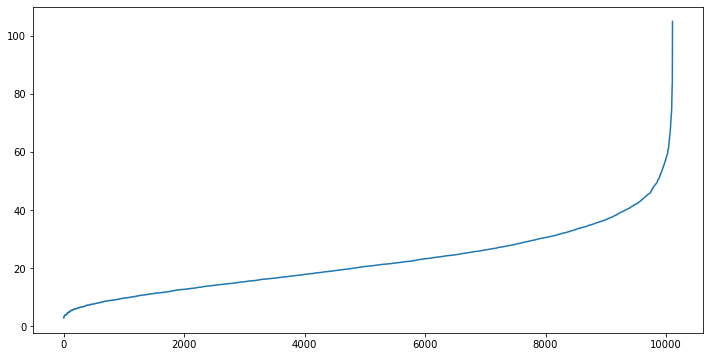

In [33]:
# https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd
# https://medium.com/@tarammullin/dbscan-2788cfce9389
# https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf

for i, subset in enumerate(subsets):
    print("--- " +str(titles[i]) + " ----")
    MinPts = len(subset)*2
    print("Minpts = " + str(MinPts))
    
    # Calculate the average distance between each point in the data set and 
    # its 20 nearest neighbors (the selected MinPts value).

    neighbors = NearestNeighbors(n_neighbors=MinPts)
    neighbors_fit = neighbors.fit(df[subset])
    distances, indices = neighbors_fit.kneighbors(df[subset])

    # Sort distance values by ascending value and plot
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.show()
    
    

The distance value at the "crook of the elbow," or the point of maximum curvature, would be the optimal value for ε. This is the stage at which the extra expense is no longer justified due to diminishing returns.

In [34]:
# Based on the analysis above
# Parameters for Minimum Samples (MinPts) and epsilon (eps)

DBSCAN_settings = [
    [38, 40],
    [28, 1],
    [10, 0],
    [10, 1],
    [76, 40]]

In [35]:
## Note: Some of these DBSCAN_settings gave only 1 cluster for all subsets. 
# For these 3 subset reverting to settings from class labs:

In [36]:
DBSCAN_settings = [
    [38, 40],
    [0.38, 10],
    [0.38, 10],
    [0.38, 10],
    [76, 40]]

In [37]:
for i, subset in enumerate(subsets):
    X = df[subset].copy()

    settings = DBSCAN_settings[i]
    
    eps = settings[0]
    min_samples = settings[1]

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clustering_labels = dbscan.fit_predict(X)
    X['labels'] = clustering_labels
    
    print("--- " + titles[i] + " ---")
    
    num = X['labels'].nunique()

    if num == 1:
        print("The values for subset " + str(titles[i]) + "are producing only 1 cluster! Reject?\n")
    elif num > 0:
        print("The values for subset " + str(titles[i]) + " are producing " + str(num) + " clusters.\n")
        
        print("Silhouette Coefficient score: " + str(silhouette_score(X, X['labels'])) + "\n")
    else:
        print("The values for subset " + str(titles[i]) + "are producing 0 or negative clusters! Reject?\n")

--- Demographic ---
The values for subset Demographicare producing only 1 cluster! Reject?

--- Social ---
The values for subset Social are producing 133 clusters.

Silhouette Coefficient score: 0.8585663864023547

--- Ethical ---
The values for subset Ethical are producing 12 clusters.

Silhouette Coefficient score: 1.0

--- Technical ---
The values for subset Technical are producing 325 clusters.

Silhouette Coefficient score: 0.3353670815042907

--- All ---
The values for subset Allare producing only 1 cluster! Reject?



---

## Comments Regarding the Clustering Findings

Looking at the silhouette scores of the most promising cluster suggestions from the three clustering algorithms, the following stood out:


| Algorithm   | Subset      | Clusters   |Silhouette Coefficien|
| ----------- | ----------- |----------- |-------------------- |
| K-Means     | Demographic |4           |0.57                 |
| K-means     | Social      |9           |0.29                 |
| K-means     | Ethical     |4           |0.51                 |
| K-means     | Technical   |2           |0.64                 |
| K-means     | All         |4           |0.57                 |
| GMM         | Social      |9           |0.28                 |
| GMM         | Ethical     |4           |0.51                 |
| GMM         | Technical   |4           |0.58                 |
| DBScan      | Social      |133         |0.85                 |
| DBScan      | Ethical     |12          |1.00                  |
| DBScan      | Technical   |325         |0.33                 |


##### Demographics
For this subset, K-means appears to be a very powerful clustering algorithm. K-means noticed four clusters with a silhouette coefficient of about 0.57. K-means clustering would be appropriate. For this subset, GMM and DBScan were unable to find appropriate clusterings. K-means is the way to go.

The demographics subset consists of these features:
* Age
* Disability
* isSingle
* Household_Income
* Major_Occupation

Given that only four clusters have been identified, a human analyst will have no trouble categorizing and labeling the four clusters. Age, Household Income, and Major Occupation are possibly the most important fields in this subset, and they could be easily classified using LSM. The clusters would most likely fit with the LSM model's top four bands.

The Living Standards Measure has become the most widely used marketing research tool in Southern Africa. It divides the population into ten LSM groups, with the highest being ten and the lowest being one (lowest). LSM is a unique method of segmenting the South African industry. For the US or the global market, a similar classification scheme could be found.

##### Social
K-means and GMM provided the same results in the Social subset (9 clusters @ 0.29). There were 133 clusters with a very high coefficient of about 0.85, according to DBScan, which did not need an initial k value.  This is going to be a difficult subset to cluster. There are approximately 133 clusters visible.

The fields included in this subset are:
* Community
* Community_Membership
* Who_Pays_for_Access

These aren't well-defined dimensions, and to GMM and K-Means, they're probably all noise. DBScan was able to find a large number of clusters with a high silhouette coefficient.  This, I believe, reflects the large social diversity of internet users, even at that time when the Internet was in its infancy. This is not, in my opinion, an insignificant result. I believe that more precise social features will need to be gathered in order to find the wider social clusterings.

##### Ethical
In terms of the Ethical subset (4 clusters @ 0.51), K-means and GMM generated the same results. DBScan provided a collection of 12 clear clusters with a perfect silhouette score of 1.0.

The features of this subset are:
* Opinion_1_Pro
* hasFalsified
* Concerns

This subset may arguably include "Registered to Vote", but it was left out. In that case, we could end up with more clusters.

I believe these fields are groupable by internal vs. external strain on moral choice.  This is a fascinating discovery made by the clustering algorithms in my opinion. The algorithms indicate that the structure would be grid-like. I believe the grid it is identifying would align with something from the management or psychology fields. I believe that a model could be developed in which people fit into a grid based on the these internal / external attitudes to moral decisions. I'm not going to go too much into this. The ethical dilemma grid, for example, classifies ethical behavior along an axis of Personal Benefit vs. External Pressure. An analyst might find a grid-like pattern and use it to create a clustering scheme of four or more groupings. It's fascinating to see how the algorithms interpret these patterns based on people's responses to the survey.

![Ethics Grid](./img/ethics-grid.png)


##### Technical
With the Technical subset, K-Means performed admirably, returning two clusters with a silhouette coefficient of 0.64. This should be sufficient, but it does mean that some of the data points are clustering in the "grey" region. GMM produced a similar result, with four clusters and a silhouette coefficient of 0.58.  DBScan on the otherhand went wild and found 325 clusters with only a 0.33 silhoutte coeffient.

The fields of this subset are:
* isTechnical
* isMSUser
* Months_on_Internet
* Adoption
* Education_Attainment

Arguable "Education Attainment" could be moved to Demographics.

I believe that people in the grey area are considered noise by k-means because they should be either technical or not. GMM did a decent job of spotting another two clusters between Technical and Non-Technical, and it's probably the best clustering for an analyst to deal with. The analyst might create a four-category continuum ranging from technical to non-technical, with labels for Technical Proficiency like "High", "Intermediary", "Noob" and "None". The DBScan algorithm found far too many groupings in this subset, making it fairly useless in this case.

##### All
The All subset includes all of the dataset's fields. With a silhoutte coefficient of 0.57, K-means did an excellent job of identifying four clusters. For this complex subset, the other two clustering algorithms produced no significant results.  

It's worth remembering that the K-means findings are consistent with the Demographics subset. This may indicate that K-means has effectively clustered this entire dataset using Demographics as the primary means of clustering. This makes sense since the demographic dataset contains the most useful information for categorizing individuals.

## Conclusion

This Clustering exercise demonstrates how a large volume of seemingly random data can be used to uncover meaningful patterns and generalizations. The data had no discernible structure at first, but as different subsections of the data were passed through the data mining algorithms, a structure started to appear.  Finally, an experienced analyst may begin to see and interpret patterns based on the clustering results. To either dig deeper or change the input configuration. Finding value in a meaningless block of raw data is a fascinating journey of discovery.

# Classification

Classification is a form of supervised learning in the context of machine learning. The data fed to the algorithm is already labelled, with the important features/attributes divided into distinct categories before it is fed to the algorithm. Classification is a predictive modeling problem in machine learning where a class label is predicted for a given point of input data.

---

### Initial

In [64]:
# Load the python libraries

# Core
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

# Sklearn
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

# Linear Support Vector Classification
# Gaussian Naive Bayes
# K Nearest Neighbors
# Random Forest (Bagging)
# Boosting

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


# Utilities
import time
import pickle
import sys
import warnings
import os


In [65]:
# Configuration Variables

data_FOLDER = './data'

SEED = 42

In [66]:
df = pickle.load( open( data_FOLDER+"/pre-processed.pickle", "rb" ) )

In [67]:
# Look at the loaded data

df.head()

Education_Attainment  Major_Occupation-0  Major_Occupation-1  \
who                                                                   
93819                     0                   0                   0   
95708                     2                   0                   1   
97218                     1                   1                   0   
91627                     1                   0                   0   
49906                     3                   0                   1   

       Major_Occupation-2  Major_Occupation-3  Major_Occupation-4   Age  \
who                                                                       
93819                   0                   0                   1  41.0   
95708                   0                   0                   0  28.0   
97218                   0                   0                   0  25.0   
91627                   0                   0                   1  28.0   
49906                   0                   0                   0  17.0   

       Household_Income  Months_on_Internet  Community_Membership_Family  ...  \
who                                                                       ...   
93819          103648.0                20.0                            0  ...   
95708             409.0                 1.0                            0  ...   
97218          109012.0                30.0                            1  ...   
91627           58024.0                28.0                            0  ...   
49906            3657.0                27.0                            0  ...   

       Who_Pays_for_Access_Self  Who_Pays_for_Access_Work  hasFalsified  \
who                                                                       
93819                         1                         0             0   
95708                         1                         0             1   
97218                         1                         1             1   
91627                         1                         0             1   
49906                         1                         0             1   

       isSingle  isTechnical  isMSUser  Adoption  Concerns-0  Concerns-1  \
who                                                                        
93819         0            1         0         1           0           1   
95708         1            0         1         2           0           0   
97218         0            1         1         1           0           0   
91627         0            1         1         1           0           1   
49906         1            1         1         1           0           0   

       Concerns-2  
who                
93819           0  
95708           1  
97218           1  
91627           0  
49906           1  

[5 rows x 38 columns]

---

## Choose the Classification Model

Used the following diagram to choose the learners to try:

![ML Map](./img/ml_map.png)
    
* Scikitlearn Estimator Cheat Sheet
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html     
 

---

```>50 samples : YES (10108)```

There are more than 50 rows (samples) because there are 10108 rows.

In [68]:
df.shape

(10108, 38)

---

```Predicting a category : YES```

During pre-processing, certain categorical features were converted to numerical features. I'm going to keep these as numerical attributes because it'll make the classification algorithms better.

In [69]:
# These are categorical

TargetsF = ['Education_Attainment', 'Major_Occupation-0', 'Major_Occupation-1', 'Major_Occupation-2', 'Major_Occupation-3', 'Major_Occupation-4']

---

```Do you have labelled data : YES```

For the classifier algorithm, the targets are labels.

In [70]:
Targets = ["Education_Attainment", "Major_Occupation"]

for i in TargetsF:
    print(df[i].unique())

[0 2 1 3]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]


---

```<100K Samples : YES (10108)```

The dataframe contains 10108 rows.

---

## Process to Follow:

These are the steps I'll take in this investigation.

* Representation
* Evaluation
* Optimization
* Testing and Validating

I'm going to try the following classifiers on this problem based on the classification map above.  I expect some of the classifiers to be unsuitable, but I'd like to see how they do as an experiment.  I'm looking forward to the best from the last three on the list.
    
* Linear Support Vector Classification
* Naive Bayes

* K Nearest Neighbors
* SVC
* Ensemble

---

## Representation

### Numeric Fields

In classification, the name should be distinct. I generated three numeric fields as part of the EDA data by "guessing" values.  Although the numeric fields are useful in this format, I've decided that categorical fields will be easier for my classification models. The original divisions were not equally distributed. I'll use the ordinal encoder and the binning feature engineering technique before feeding the features into the models.

* Age
* Household_Income
* Months_on_Internet

```
KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
```

In [71]:
Numeric = ['Age', 'Household_Income', 'Months_on_Internet']

In [72]:
df[Numeric]

Age  Household_Income  Months_on_Internet
who                                              
93819  41.0          103648.0                20.0
95708  28.0             409.0                 1.0
97218  25.0          109012.0                30.0
91627  28.0           58024.0                28.0
49906  17.0            3657.0                27.0
...     ...               ...                 ...
97004  19.0          106524.0                36.0
96381  39.0           23241.0                69.0
94762  51.0           24654.0                33.0
97062  34.0           80706.0                63.0
92223  27.0           33587.0                86.0

[10108 rows x 3 columns]

In [73]:
%%time

binMe = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
binMe.fit(df[Numeric])
Xt = binMe.transform(df[Numeric])
Xt = Xt.transpose()

df['Age'] = Xt[0]
df['Household_Income'] = Xt[1]
df['Months_on_Internet'] = Xt[2]

df[Numeric]

Age  Household_Income  Months_on_Internet
who                                             
93819  2.0               5.0                 1.0
95708  1.0               0.0                 0.0
97218  1.0               5.0                 1.0
91627  1.0               2.0                 1.0
49906  0.0               0.0                 1.0
...    ...               ...                 ...
97004  1.0               5.0                 2.0
96381  2.0               1.0                 4.0
94762  3.0               1.0                 2.0
97062  2.0               4.0                 4.0
92223  1.0               1.0                 5.0

[10108 rows x 3 columns]

---

### Binary Fields

Certain binary fields are encoded with True or False. Many machine learning algorithms can't deal with boolean data directly. Both input and output variables must be numeric. These would have to be converted.

---

### Categorical Targets

Initially for this analysis, I will not convert the categorical target fields ("Education Attainment," "Major Occupation") into categorical. This converts the fields to strings, which are incompatible with classification algorithms.

---

## Evaluation

### Fit Model and Predict

For an unbiased evaluation of prediction results, you must split your dataset. In most cases, dividing the dataset into three subsets at random is sufficient. The training set is used to prepare your model for modeling. During hyperparameter tuning, the validation collection is used for unbiased model evaluation. The test set is needed for a fair assessment of the final model.

In [75]:
Features = [x for x in df.columns if x not in TargetsF]

y = df[TargetsF].values
X = df[Features].values

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=SEED)

---

### First Pass Through a Pipeline of Various Classifiers

The data is passed through the classifiers using a sequence of pipelines in the code below. This is for a preliminary assessment of the classifiers' performance. At this time, the hyperparameters have not been optimized; they were chosen based on examples in documentation.

**Note:** We need the multioutclassifier because we are forecasting four factors in one sweep: educational attainment, major occupation (multivalue column). It's possible that the two targets are associated and should not be predicted independently. It would be fair to believe that household income is linked to educational attainment because higher levels of education should result in higher earnings. This was not found in the EDA due to the categorical nature of these fields, but it is logical deduction.

**Note:** The Gaussian Naive Bayes algorithm is a type of NB algorithm that is special. When the features have continuous values, it's used explicitly. It is often assumed that all of the features have a gaussian distribution, or a regular distribution.  It proved more robust with the data than the other variants.  Later on in the study, I standardize the data. Surprisingly, it worked reasonably well in the first attempt.

In [77]:
%%time

lsvc = LinearSVC(random_state=0, tol=1e-5)
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=10)
boost = AdaBoostClassifier(n_estimators=100)

classifiers = [lsvc, gnb, knn, rfc, boost]
pipelines = []

for classifier in classifiers:
    pipelines.append(Pipeline([('clss',MultiOutputClassifier(classifier, n_jobs=-1))]))

# Dictionary of pipelines and classifier types
pipe_dict = {0: 'Linear SVC', 1: 'Guassian NB', 2: 'K Neighbors', 3: 'Random Forest', 4: 'Ada Boost'}
    

for i, pipe in enumerate(pipelines):
    scores = cross_val_score(pipe, X=X_train, y=y_train, cv=20)
    
    print(pipe_dict[i])
    print('\nCV accuracy scores: %s' % scores)
    print(f'\nCV estimate of accuracy is: {scores.mean():.2%} +/- {scores.std()*2/len(scores):.2%}')
    print('\n---\n')

Linear SVC

CV accuracy scores: [0.10837438 0.12315271 0.14285714 0.1980198  0.17326733 0.14851485
 0.12376238 0.13366337 0.15841584 0.16336634 0.19306931 0.13366337
 0.16336634 0.15841584 0.16336634 0.15346535 0.22277228 0.10891089
 0.14356436 0.12376238]

CV estimate of accuracy is: 15.19% +/- 0.29%

---

Guassian NB

CV accuracy scores: [0.06403941 0.05418719 0.10344828 0.12376238 0.08415842 0.0990099
 0.06435644 0.10891089 0.07920792 0.0990099  0.08910891 0.07920792
 0.07425743 0.06930693 0.07425743 0.08910891 0.1039604  0.06930693
 0.06435644 0.04455446]

CV estimate of accuracy is: 8.19% +/- 0.20%

---

K Neighbors

CV accuracy scores: [0.12315271 0.11330049 0.14778325 0.18811881 0.14356436 0.15841584
 0.11386139 0.13366337 0.17326733 0.11386139 0.13861386 0.15346535
 0.12871287 0.15346535 0.14356436 0.12871287 0.15841584 0.08415842
 0.11881188 0.12376238]

CV estimate of accuracy is: 13.70% +/- 0.23%

---

Random Forest

CV accuracy scores: [0.12315271 0.1182266  0.11330049 0.17

---

### Multiclass-Multioutput Classification

From this point on, I'm having trouble using MultiOutputClassifier in my pipeline. It appears that the classifier won't work well in conjunction with the other steps I need to complete. With many hours of work, experimentation, and research, I attempted to resolve the problem.

The scikit documentation describe the classification activity that labels each sample with a set of non-binary properties is known as multiclass-multioutput classification (also known as multitask classification). The number of properties and groups per property are also greater than two. As a result, a single estimator can perform several joint classification tasks.  The documentation has a warning: "**Warning:** At present, no metric in sklearn.metrics supports the multiclass-multioutput classification task."

I might use a variety of tactics to get around this, such as treating the targets across various pipelines. Instead, I consider the assignment's task to be testing the performance of the chosen classifiers rather than achieving a prediction.  As a result, I've decided to take the next step. I placed the two targets together in a new target column. The integer value in the target column represents the other two groups that the observation belongs to. The value of the original two target values could be discovered by reverse engineering the integer.

Is this going to work? Can the classification alogrithms result in the creation of new classes, i.e. integers between the existing ones? That is, it has viewed the classes as numbers rather than seeing them as class numbers. At the end of this, I'll take a look and report back on my conclusions.

In [78]:
%%time

# Education attainment as ordinality
# Major Occupation does not have ordinality

# Convert the two target columns into an integer that retains the information
# of the orginal two columns

df['Major_Occupation-0'].astype('int32').dtypes
df['Major_Occupation-1'].astype('int32').dtypes
df['Major_Occupation-2'].astype('int32').dtypes
df['Major_Occupation-3'].astype('int32').dtypes
df['Major_Occupation-4'].astype('int32').dtypes


def target (row):
    MO = ""
    if (row['Major_Occupation-0']==1):
        MO=str(row['Education_Attainment']+1).strip(".0")+'0'
    if (row['Major_Occupation-1']==1):
        MO=str(row['Education_Attainment']+1).strip(".0")+'1'
    if (row['Major_Occupation-2']==1):
        MO=str(row['Education_Attainment']+1).strip(".0")+'2'
    if (row['Major_Occupation-3']==1):
        MO=str(row['Education_Attainment']+1).strip(".0")+'3'
    if (row['Major_Occupation-4']==1):
        MO=str(row['Education_Attainment']+1).strip(".0")+'4'
    return MO

df['TARGET'] = df.apply (lambda row: target(row), axis=1)

# Assigns an integer as to a category for each class

# Turn that into a real
df['TARGET'].astype('int32').dtypes

# Take a look....
df['TARGET']

# It retained its value

who
93819    14
95708    31
97218    20
91627    24
49906    41
         ..
97004    41
96381    30
94762    42
97062    20
92223    13
Name: TARGET, Length: 10108, dtype: object

In [79]:
df.TARGET.value_counts()

33    920
31    905
20    831
43    788
24    747
14    651
30    600
41    572
34    473
23    470
11    462
21    400
10    398
32    393
22    369
44    292
12    258
40    256
42    162
13    161
Name: TARGET, dtype: int64

In [80]:
# Drop the orginal target columns
df.drop(TargetsF, inplace=True, axis=1)

In [81]:
# Can I reverse engineer the new TARGET to the old columns?

# Yes this will not be difficult

In [82]:
#Features = [x for x in df.columns if x not in TargetsF]

y = df['TARGET'].values
X = df[Features].values

---

### Rerun the Previous Pipelines (without the Multi Output Classifier)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=SEED)

In [84]:
%%time

lsvc = LinearSVC(random_state=0, tol=1e-5)
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=10)
boost = AdaBoostClassifier(n_estimators=100)

classifiers = [lsvc, gnb, knn, rfc, boost]
pipelines = []

for classifier in classifiers:
    #pipelines.append(Pipeline([('clss',MultiOutputClassifier(classifier, n_jobs=-1))]))
    pipelines.append(Pipeline([('clss',classifier)]))

# Dictionary of pipelines and classifier types
pipe_dict = {0: 'Linear SVC', 1: 'Guassian NB', 2: 'K Neighbors', 3: 'Random Forest', 4: 'Ada Boost'}
    

for i, pipe in enumerate(pipelines):
    scores = cross_val_score(pipe, X=X_train, y=y_train, cv=20)
    
    print(pipe_dict[i])
    print('\nCV accuracy scores: %s' % scores)
    print(f'\nCV estimate of accuracy is: {scores.mean():.2%} +/- {scores.std()*2/len(scores):.2%}')
    print('\n---\n')

/Users/wazby/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/wazby/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/wazby/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/wazby/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/wazby/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Lib

Linear SVC

CV accuracy scores: [0.2364532  0.24630542 0.27586207 0.28712871 0.25742574 0.23762376
 0.27227723 0.22772277 0.25742574 0.27227723 0.30693069 0.26237624
 0.25247525 0.24752475 0.21782178 0.28712871 0.24752475 0.23762376
 0.24752475 0.26237624]

CV estimate of accuracy is: 25.70% +/- 0.21%

---

Guassian NB

CV accuracy scores: [0.06896552 0.05418719 0.09852217 0.08415842 0.06930693 0.07920792
 0.06435644 0.07425743 0.05445545 0.11386139 0.05445545 0.05445545
 0.07920792 0.05445545 0.0990099  0.06930693 0.08415842 0.09405941
 0.05445545 0.05940594]

CV estimate of accuracy is: 7.32% +/- 0.18%

---

K Neighbors

CV accuracy scores: [0.17241379 0.14778325 0.18226601 0.22772277 0.14851485 0.12871287
 0.14356436 0.18316832 0.11386139 0.14356436 0.11881188 0.13861386
 0.16831683 0.13861386 0.12376238 0.11881188 0.12376238 0.14356436
 0.13861386 0.16831683]

CV estimate of accuracy is: 14.86% +/- 0.27%

---

Random Forest

CV accuracy scores: [0.11330049 0.21674877 0.1773399  0.2

**Where are we:**
I merged the target columns into a single target column. At this time, no hyperparameter tuning has been done. I'm just using the defaults found in documentation and class notes as examples.

**Comparison:**
The accuracy performance between first run and second run:
    
| Classifier    | Accuracy 1    | Accuracy 2  |
| ------------- |:-------------:| -----------:|
| Linear SVC    | 15.19         | 25.7        |
| Guassian NB   | 8.19          | 7.32        |
| K Neighbors   | 13.7          | 14.86       |
| Random Forest | 13.18         | 18.5        |
| Ada Boost     | 16.7          | 15.16       |


**Observations:**
* Warnings of convergence began to emerge.
* The accuracy of Linear SVC increased dramatically from 15 to 25%. However, it appears LSVC is the classifier issuing the alerts.
* GNB's accuracy decreased by 1%
* KNN's accuracy increased slightly 
* Random Forest's accuracy increased by around 5%
* Ada Boost increased by less than 1%.

---

## Optimisation

### Hyperparameter Tuning with GridSearchCV

In almost every Machine Learning project, we train various models on the dataset and then choose the one that performs the best. However, since we cannot be certain that this model is the best for the problem at hand, there is almost always space for improvement. As a result, our goal is to improve the model in whatever way we can.  The hyperparameters of these models are an essential factor in their performance; once we set acceptable values for these hyperparameters, the performance of a model will dramatically improve. In this section, I'll use GridSearchCV to find the best values for a model's hyperparameters.

Hyperparameter tuning is the method of determining the best values for a model's hyperparameters. There is no way to know ahead of time what the best values for hyperparameters are, so we should try all possible values to find the best ones. Since manually tuning hyperparameters will take a significant amount of time and resources, we use GridSearchCV to automate the process.

**Note:** GridSearchCV took a very long time to process.  I have commented out that section of code below and rather use RandomisedSearchCV method.  The results were very similar.

#### Make a List of All Hyperparams

I was getting errors regarding invalid parameter errors like this : "ValueError: Invalid parameter dual for estimator Pipeline..."  Decided to evalute the names of the parameters for the param_grid list.

In [88]:
print(LinearSVC().get_params())
print("---\n")

print(GaussianNB().get_params())
print("---\n")

print(KNeighborsClassifier().get_params())
print("---\n")

print(RandomForestClassifier().get_params())
print("---\n")

print(AdaBoostClassifier().get_params())
print("---\n")

{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
---

{'priors': None, 'var_smoothing': 1e-09}
---

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
---

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
---

{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}
---



#### Define the Hyperparameters to Test

#### Note:

When I tried to test the hyperparameters for LinearSVC, I ran into some issues. I'm guessing the algorithm can't handle the kind of data it's being served.  The error messages I received included: 

* Estimator fit failed. The score on this train-test
* Unsupported set of arguments: The combination of penalty='l2' and loss='squared_hinge' are not supported when dual=False, Parameters: penalty='l2', loss='squared_hinge', dual='False'

The task requires the use of three different classifiers. Since I have five, I decided to leave LinearSVC out of this hyperparameter test, keeping in mind the task at hand and the time constraints. The code below has been modified to reflect this decision.

**Note:** 
I had the best results with Linear SVC up until this stage, with an accuracy of around 25%. This is something to keep in mind in the end. If the other classifiers don't change dramatically, it may be worth trying to get Linear SVC to function.

In [93]:
# define the list
param_grid = []
param_grid.append(0)
param_grid.append(1)
param_grid.append(2)
param_grid.append(3)


#LinearSVC 
#param_grid[0] = { 
#        'clf__penalty': ['l1', 'l2'],
#        'clf__loss' : ['hinge', 'squared_hinge'],
#        'clf__dual' : ['True','False'],
#    }


# Gaussian NB
param_grid[0] = [
    {  
        'clf__var_smoothing': np.logspace(0,-9, num=100)
    }
]

# KNN
param_grid[1] = [
    {   
        'clf__n_neighbors': range(1, 21, 2),
        'clf__weights': ['uniform', 'distance'],
        'clf__metric': ['euclidean', 'manhattan', 'minkowski']
    }
]

# Random Forest
param_grid[2] = [
    {    
        'clf__n_estimators' : [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
        'clf__max_features' : ['auto', 'sqrt']  
    }
]

# Ada Boost
param_grid[3] = [
    {
        'clf__n_estimators' : [10, 50, 100, 500, 1000, 5000]  
    }
]

#### Define the Pipelines

In [95]:
#lscv = Pipeline([
#    ('scl', StandardScaler()),
#    ('clf', LinearSVC())
#    ])

In [96]:
gnb = Pipeline([
    ('scl', StandardScaler()),
    ('clf', GaussianNB())
    ])

In [97]:
knn = Pipeline([
    ('scl', StandardScaler()),
    ('clf', KNeighborsClassifier())
    ])

In [98]:
rfc = Pipeline([
    ('scl', StandardScaler()),
    ('clf', RandomForestClassifier())
    ])

In [99]:
boost = Pipeline([
    ('scl', StandardScaler()),
    ('clf', AdaBoostClassifier())
    ])

#### Build Lists for Iteration

In [100]:
# Rebuild piplelines list
#pipelines = [lscv, gnb, knn, rfc, boost]
#
#pipe_dict = {0: 'Linear SVC', 1: 'Guassian NB', 2: 'K Neighbors', 3: 'Random Forest', 4: 'Ada Boost'}

In [101]:
# Rebuild piplelines list
pipelines = [gnb, knn, rfc, boost]

pipe_dict = {0: 'Guassian NB', 1: 'K Neighbors', 2: 'Random Forest', 3: 'Ada Boost'}

#### Run the Pipelines with Hyperparameters

In [102]:
##%%time

## As noted above:  The hyperparameter search took an immense time to process and I have chosen rather to use the 
## RandomizedSearchCV method

#for i, pipeline in enumerate(pipelines):
    
    
#    print("----------------------------")
#    print(pipe_dict[i])
#    print(param_grid[i])

#    gs = GridSearchCV(estimator=pipeline, return_train_score=True, param_grid=param_grid[i], scoring='accuracy')
    
#    gs = gs.fit(X_train, y_train)
#    print('\n')
#    print('Results:')
#    print(gs.best_score_)
#    print(gs.best_params_)
    
    # summarize results
#    print("\n")
#    means = gs.cv_results_['mean_test_score']
#    stds = gs.cv_results_['std_test_score']
#    params = grid_result.cv_results_['params']
    
#    for mean, stdev, param in zip(means, stds, params):
#        print("%f (%f) with: %r" % (mean, stdev, param))

#    print("\n\n")

#### RandomizedSearchCV

The GridSearch above took a very long time to execute.  I run RanomizedSearchCV below to see if I get quicker results.

In GridSearchCV (above), we identify the combinations and train the model, while in RandomizedSearchCV, the model chooses the combinations at random. Both are very useful methods for increasing the model's generalizability by tuning the parameters.

In [137]:
%%time

for i, pipeline in enumerate(pipelines):
    
    
    print("----------------------------")
    print(pipe_dict[i])
    print(param_grid[i])

    rs = RandomizedSearchCV(estimator=pipeline, return_train_score=True, param_distributions=param_grid[i], scoring='accuracy')

    rs = gs.fit(X_train, y_train)
    print('\n')
    print('Results:')
    print(rs.best_score_)
    print(rs.best_params_)
    
    # summarize results
    print("\n")
    means = rs.cv_results_['mean_test_score']
    stds = rs.cv_results_['std_test_score']
    params = rs.cv_results_['params']

    print(params)
    
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
        
    print("\n\n")
    
    #df_rs = pd.DataFrame(np.transpose([
    #rs.cv_results_["mean_test_score"],
    #rs.cv_results_["param_clf__C"].data,
    #rs.cv_results_["param_clf__gamma"].data]),
    #columns=['score', 'C', ' gamma'])


    #df_rs.plot(subplots=True,figsize=(12, 8))
    #plt.savefig("rs__example_1.pdf", bbox_inches="tight")
    #plt.show()
    

----------------------------
Guassian NB
[{'clf__var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
       1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
       6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
       2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
       1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
       5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
       2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
       1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
       4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
       1.873

**Where are we:**
RandomizedSearchCV was used to choose hyperparameters for the classifiers and to calculate the accuracy scores. Because it was giving convergence alerts, I dropped LinearSVC, which had previously had the highest accuracy ranking.

**Comparison:**
The accuracy performance percentage between first, second and third run:
    
| Classifier    | Accuracy 1    | Accuracy 2  | Accuaracy 3  |
| ------------- |:-------------:| -----------:|:------------:|
| Linear SVC    | 15.19         | 25.7        |-             |
| Guassian NB   | 8.19          | 7.32        |20            |
| K Neighbors   | 13.7          | 14.86       |21            |
| Random Forest | 13.18         | 18.5        |22            |
| Ada Boost     | 16.7          | 15.16       |25            |


**Observations:**
* Warnings were given by RandomForest. It is basically saying that in order to get the most accurate results the GridSearch method should be used.  I have already opted not to use GridSearch as it was very time and processor heavy.
* UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
    

* All the Classifiers had a dramatic improvement.
* GNB up by 13%
* KNN up by about 7%
* RandomForest up by about 3.5%
* Ada Boost up by about 10%

As a result, the Hyperparameter tuning has significantly improved. It's worth noting that Ada Boost is essentially claiming that if it's used with the GridSeachCV, it'll get better results; this is may be true with all the classifiers.  I test GridSearchCV below...

**NOTE**  The code block below takes a very long time to run.  I have changed the code so that it will not run unless run is set to True below.

In [108]:
run = False

In [109]:
%%time

if run:

    for i, pipeline in enumerate(pipelines):


        print("----------------------------")
        print(pipe_dict[i])
        print(param_grid[i])

        gs = GridSearchCV(estimator=pipeline, return_train_score=True, param_grid=param_grid[i], scoring='accuracy')

        gs = gs.fit(X_train, y_train)
        print('\n')
        print('Results:')
        print(gs.best_score_)
        print(gs.best_params_)

        # summarize results
        print("\n")
        means = gs.cv_results_['mean_test_score']
        stds = gs.cv_results_['std_test_score']
        params = gs.cv_results_['params']

        for mean, stdev, param in zip(means, stds, params):
            print("%f (%f) with: %r" % (mean, stdev, param))

        print("\n\n")

**Where are we:**
Because Ada Boost was giving a warning in the previous run.  I decided to run hyperparameter tuning through GridSearchCV to see the difference between RandomSearchCv and GridSearchCV.

**Comparison:**
The accuracy performance percentage between first, second, third and fourth run.  For this review, I went back to decimal percentages:
    
| Classifier    | Accuracy 1    | Accuracy 2  | Accuaracy 3  | Accuracy 4  |
| ------------- |:-------------:| -----------:|:------------:|:------------|
| Linear SVC    | 0.1519         | 0.257        |-             |-            |
| Guassian NB   | 0.819          | 0.732        |0.20083436341161928            |0.20083436341161928           |
| K Neighbors   | 0.137          | 0.1486       |0.2141936628767945            |0.21493746098960945           |
| Random Forest | 0.1318         | 0.185        |0.2243388121259592           |0.22508199831107958           |
| Ada Boost     | 0.167          | 0.1516       |0.25154389357353535            |0.25154389357353535           |


**Observations:**
* No warnings were received this time
    

* There was no significant improvement in any of the classifiers.
* Tiny improvements in accuracy were seen.

As a consequence, the accuracy gain from Hyperparameter tuning with GridSearchCV was minuscule, if at all. There were a few new hyperparameters discovered. These are adopted in the following sections.

I believe it is safe to say that the difference in accuracy between RandomSearchCV and GridSearchCV does not justify the GridSearchCV's increased time and processing requirements.

#### Hyperparameters From RandomizedSearchCV and GridSearchCV

The GridSearchCV hyperparameters in the code block below override the RandomisedSearchCV hyperparameters. Even though the accuracy gain is minor, it is preferable to use the GridSearchCV hyperparameters if they differ from the RandomisedSearchCV hyperparameters and the accuracy was higher.

In [145]:
# Guassian NB
#params[0] = {'clf__var_smoothing': 1.0}
params[0] = dict(clf__var_smoothing = 1.0)

# K Neighbors
params[1] = {'clf__weights': 'clf__uniform', 'clf__n_neighbors': 19, 'clf__metric': 'euclidean'}

# Grid Search Params...
params[1] = {'clf__metric': 'clf__manhattan', 'clf__n_neighbors': 17, 'clf__weights': 'distance'}

# Random Forest
params[2] = {'clf__estimators': 1800, 'clf__max_features': 'sqrt'}

# Grid Search Params...
params[2] = {'clf__max_features': 'auto', 'clf__n_estimators': 1000}

# Ada Boost
params[3] = {'clf__estimators': 10}

## Evaluate

#### Test / Evaluate Model

In [164]:
gnb = Pipeline([
    ('scl', StandardScaler()),
    ('clf', GaussianNB(var_smoothing = 1.0))
    ])

In [165]:
knn = Pipeline([
    ('scl', StandardScaler()),
    ('clf', KNeighborsClassifier(weights='distance', n_neighbors=17, metric='manhattan'))
    ])

In [166]:
rfc = Pipeline([
    ('scl', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=1000, max_features='auto'))
    ])

In [167]:
boost = Pipeline([
    ('scl', StandardScaler()),
    ('clf', AdaBoostClassifier(n_estimators=10))
    ])

In [168]:
%%time

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=SEED)

pipelines = [gnb, knn, rfc, boost]

# Dictionary of pipelines and classifier types
pipe_dict = {0: 'Guassian NB', 1: 'K Neighbors', 2: 'Random Forest', 3: 'Ada Boost'}
    
for i, pipeline in enumerate(pipelines):
    
    print(pipe_dict[i])
    print("----------------")
    
    scores = cross_val_score(pipeline, X=X_train, y=y_train, cv=10)
    
    print('CV accuracy scores: %s' % scores)
    print("\n--- Accuracy ---")
    print('CV accuracy: %.3f +/− %.3f' % (np.mean(scores),np.std(scores)))
    print("\n")

Guassian NB
----------------
CV accuracy scores: [0.23723229 0.184514   0.19769357 0.20428336 0.20627063 0.19306931
 0.20957096 0.16831683 0.22277228 0.17491749]

--- Accuracy ---
CV accuracy: 0.200 +/− 0.020


K Neighbors
----------------
CV accuracy scores: [0.19769357 0.1878089  0.20428336 0.21581549 0.22772277 0.19966997
 0.20627063 0.18316832 0.21122112 0.21947195]

--- Accuracy ---
CV accuracy: 0.205 +/− 0.013


Random Forest
----------------
CV accuracy scores: [0.22405272 0.21911038 0.22240527 0.21416804 0.24092409 0.2029703
 0.21782178 0.19636964 0.23762376 0.23267327]

--- Accuracy ---
CV accuracy: 0.221 +/− 0.013


Ada Boost
----------------
CV accuracy scores: [0.24711697 0.24382208 0.26359143 0.23558484 0.26237624 0.22772277
 0.25742574 0.24917492 0.26072607 0.24257426]

--- Accuracy ---
CV accuracy: 0.249 +/− 0.011




## Introduce PCA into the Pipeline

I've added a PCA stage to the pipelines to see what the anaylsis outcome will be. 

I chose a keepRatio of 0.9 earlier in this assignment, leaving 27 components. With these variables, I'll resume the PCA analysis for this task.

In [177]:
gnb = Pipeline([
    ('pca', PCA(n_components=27)),
    ('scl', StandardScaler()),
    ('clf', GaussianNB(var_smoothing=1.0))
    ])

In [178]:
knn = Pipeline([
    ('pca', PCA(n_components=27)),
    ('scl', StandardScaler()),
    ('clf', KNeighborsClassifier(weights='uniform', n_neighbors=19, metric='euclidean'))
    ])

In [179]:
rfc = Pipeline([
    ('pca', PCA(n_components=27)),
    ('scl', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=1800, max_features='sqrt'))
    ])

In [180]:
boost = Pipeline([
    ('pca', PCA(n_components=27)),
    ('scl', StandardScaler()),
    ('clf', AdaBoostClassifier(n_estimators=10))
    ])

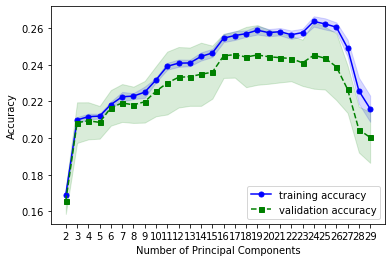

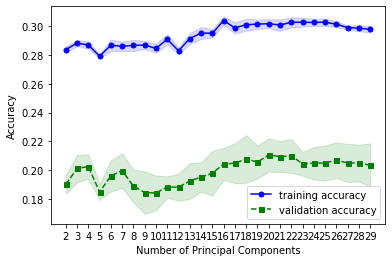

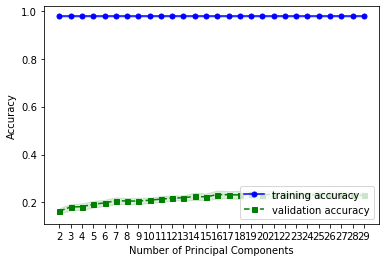

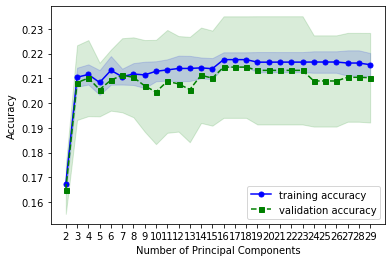

In [196]:
%%time

pipelines = [gnb, knn, rfc, boost]

# Dictionary of pipelines and classifier types
pipe_dict = {0: 'Guassian NB', 1: 'K Neighbors', 2: 'Random Forest', 3: 'Ada Boost'}
    
for i, pipeline in enumerate(pipelines):

    param_range = range(2,30)

    train_scores, test_scores = validation_curve(
                                                estimator=pipeline, X=X_train, y=y_train, cv=10,
                                                param_name='pca__n_components', param_range=param_range , n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    
    plt.plot(param_range, test_mean, color='green', marker='s', markersize=5, linestyle='--', label='validation accuracy')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Accuracy')
    plt.xticks(range(2,30))
    plt.legend(loc='lower right')
    #plt.ylim(0.8, 1.0)
    plt.savefig("VC__pca__n_components.pdf", bbox_inches="tight")
    plt.show()



In [212]:
%%time

# Setting ignore warnings because warning is diplayed when a category is not predicted
warnings.filterwarnings('ignore')

for i, pipeline in enumerate(pipelines):
    
    print(pipe_dict[i])
    
    y_pred = cross_val_predict(pipeline, X=X_train, y=y_train, cv=10)
    
    print("--- Accuracy ---")
    print(f"Test accuracy is {accuracy_score(y_train, y_pred):.2%}")
    print("\n")
    
    # Classification Report
    print("--- Classification Report ---")
    print(classification_report(y_train, y_pred))
    print("\n")
    
    # Confusion Matrix
    print("--- Confusion Matrix ---")
    cm = confusion_matrix(y_train,y_pred)
    print(cm)
    print("\n")
    
    



Guassian NB
--- Accuracy ---
Test accuracy is 22.66%


--- Classification Report ---


/Users/wazby/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          10       0.17      0.00      0.01       241
          11       0.47      0.08      0.13       288
          12       0.00      0.00      0.00       150
          13       0.00      0.00      0.00        82
          14       0.18      0.09      0.12       391
          20       0.22      0.68      0.34       513
          21       0.22      0.18      0.20       236
          22       0.00      0.00      0.00       221
          23       0.06      0.00      0.01       271
          24       0.11      0.14      0.12       427
          30       0.16      0.01      0.02       361
          31       0.46      0.48      0.47       531
          32       0.08      0.28      0.12       239
          33       0.24      0.34      0.28       556
          34       0.14      0.18      0.15       298
          40       0.00      0.00      0.00       141
          41       0.53      0.53      0.53       360
          42       0.00    

--- Accuracy ---
Test accuracy is 21.04%


--- Classification Report ---


/Users/wazby/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          10       0.50      0.00      0.01       241
          11       0.12      0.08      0.09       288
          12       0.07      0.01      0.01       150
          13       0.00      0.00      0.00        82
          14       0.11      0.21      0.15       391
          20       0.17      0.59      0.26       513
          21       0.21      0.07      0.11       236
          22       0.00      0.00      0.00       221
          23       0.00      0.00      0.00       271
          24       0.08      0.00      0.01       427
          30       0.03      0.00      0.01       361
          31       0.30      0.54      0.39       531
          32       0.00      0.00      0.00       239
          33       0.20      0.55      0.29       556
          34       0.29      0.01      0.03       298
          40       0.00      0.00      0.00       141
          41       0.53      0.49      0.51       360
          42       0.00    

## The Combined Target Column

In the following section, I examine and comment on my decision to merge my two targets into a single column for the classifiers to use.

In [ ]:
y_pred

In [214]:
%%time

(unique, counts) = np.unique(y_pred, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[['10' 2]
 ['11' 200]
 ['12' 15]
 ['14' 730]
 ['20' 1761]
 ['21' 81]
 ['24' 24]
 ['30' 30]
 ['31' 955]
 ['33' 1542]
 ['34' 14]
 ['41' 338]
 ['42' 11]
 ['43' 361]]
CPU times: user 7.82 ms, sys: 3.96 ms, total: 11.8 ms
Wall time: 30.6 ms


The algorithms appears to have treated the combined target column as a string (dtype=object) field. When I examine the set of values in this column, they do not form a continuous numeric integer or float set. The integers are divided into the following "reversible" categorical labels: 10-14, 20-24, 30-34, and 40-44.

Since this is just a test sample, some of those categories are absent in this subset. Initially, the missing numbers of 10, 22, 34, 40, and 42 had low counts. As a result, they will either not occur in the sample or they have a lower chance of being in the set.

Orginal Set

* 33    920
* 31    905
* 20    831
* 43    788
* 24    747
* 14    651
* 30    600
* 41    572
* **34    473**
* 23    470
* 11    462
* 21    400
* **10    398**
* 32    393
* **22    369**
* 44    292
* 12    258
* **40    256**
* **42    162**
* 13    161

This, I believe, proves that merging the targets into a single field was a valid method of handling them. In addition, any of these numbers could be given a term. We could come up with a label for each value in the target column since the numerical value in this column is a combination of Major Occupation and Education Attainment, and both of these have values associated with their numbers.  As a consequence, we will be able to come up with useful categorical labels for human interpretation that will give us more information about the dataset. We might, for example, assign words to all of these numbers.

So from these categories:

Education Attainment:
* Speciality
* College
* Some_College
* School

Major Occupation:
* Education
* Other
* Professional
* Computer
* Management

We could derive:
* Speciality-Education
* Speciality-Management
* School-Management

This will enable us to extract additional information from the data collection, such as the likelihood of a specialist-trained individual advancing to a management position or a school trained person advancing to a management position. We may also be able to analyze some of the conditions in which this happens, such as a high degree of technological proficiency or an adopter mentality, given the context provided by the rest of the dataset.  As a result, I believe that combining targets is a good way to handle this data.

# Sources

In [69]:
# This script opens up the data/histor.csv and generates a sources list
# History.csv was generated from Chrome history from the period of the assignment

import pandas as pd

df = pd.read_csv (r'./data/history.csv')
df.columns = ["id","order","date","time","title","url","visitCount","typedCount","transition"]
df.set_index("id")
df.head()

id   order       date      time  \
0   8645  265351  3/29/2021   9:12:16   
1   9384  265079  3/27/2021  17:15:30   
2   9573  265017  3/27/2021  12:36:21   
3   9574  265017  3/27/2021  12:36:19   
4  10239  264818  3/25/2021  12:19:30   

                                               title  \
0  (Tutorial) Handling Categorical Data in Python...   
1  (Tutorial) Handling Categorical Data in Python...   
2  (Tutorial) Handling Categorical Data in Python...   
3  (Tutorial) Handling Categorical Data in Python...   
4  (Tutorial) Handling Categorical Data in Python...   

                                                 url visitCount typedCount  \
0  https://www.datacamp.com/community/tutorials/c...          1          0   
1  https://www.datacamp.com/community/tutorials/c...          1          0   
2  https://www.datacamp.com/community/tutorials/c...          2          0   
3  https://www.datacamp.com/community/tutorials/c...          2          0   
4  https://www.datacamp.com/community/tutorials/c...          1          0   

  transition  
0       link  
1       link  
2       link  
3       link  
4       link

In [70]:
# There are 1822!! 
df.shape

(1822, 9)

In [71]:
df = df.drop_duplicates(subset=["url"], keep='first')
df = df.drop_duplicates(subset=["title"], keep='first')

In [72]:
df.shape

(1183, 9)

In [73]:
df.head()

id   order       date      time  \
0    8645  265351  3/29/2021   9:12:16   
6    8092  265550  3/30/2021  13:53:58   
7    9223  265170  3/27/2021  19:54:41   
9   13502  263841  3/19/2021  14:05:57   
11    713  268515  4/14/2021  15:25:57   

                                                title  \
0   (Tutorial) Handling Categorical Data in Python...   
6   (Tutorial) Jupyter Notebook: The Definitive Gu...   
7                  (Tutorial) Pandas Apply - DataCamp   
9                               @jupyterlab/toc - npm   
11  %%script false at top of cell doesn't work · I...   

                                                  url visitCount typedCount  \
0   https://www.datacamp.com/community/tutorials/c...          1          0   
6   https://www.datacamp.com/community/tutorials/t...          1          0   
7   https://www.datacamp.com/community/tutorials/p...          2          0   
9       https://www.npmjs.com/package/@jupyterlab/toc          2          0   
11  https://github.com/Microsoft/AzureNotebooks/is...          3          0   

   transition  
0        link  
6        link  
7        link  
9        link  
11       link

In [104]:
from IPython.core.display import display, HTML
from datetime import datetime
from urllib.parse import urlparse


for index, row in df.iterrows():
    link = "[Available at: <a href='" + str(row['url']) + "'>" + str(row['url']) + "]"
    
    accessDate = datetime.strptime(row['date'], '%m/%d/%Y')
    
    source = urlparse(row['url']).netloc
    
    title = "<b>" + row['title'] +"</b><br>"
    

    display(HTML("<b>" + title + "</b>"))
    display(HTML("<i>" + source + "</i>"))
    display(HTML(link))
    display(HTML("<p>" + row["date"] + "</p><br><br>"))

ValueError: time data 'date' does not match format '%m/%d/%Y'